# Data-Driven Insights for GTM, and Product

## Objective:
- Analyze the provided dataset: Customer Churn.
- Develop actionable insights and recommendations for CX.

#### Customer Churn Data: Contains customer information and churn status.
CustomerID: Unique customer ID

Churn: Churn Flag

Tenure: Tenure of customer in organization, suppose use month as unit

PreferredLoginDevice: Preferred login device of customer

CityTier: City tier

WarehouseToHome: Distance in between warehouse to home of customer

PreferredPaymentMode: Preferred payment method of customer

Gender: Gender of customer

HourSpendOnApp: Number of hours spend on mobile application or website

NumberOfDeviceRegistered: Total number of deceives is registered on particular customer

PreferedOrderCat: Preferred order category of customer in last month

SatisfactionScore: Satisfactory score of customer on service

MaritalStatus: Marital status of customer

NumberOfAddress: Total number of added added on particular customer

Complain: Any complaint has been raised in last month

OrderAmountHikeFromlastYear: Percentage increases in order from last year

CouponUsed: Total number of coupon has been used in last month

OrderCount: Total number of orders has been places in last month

DaySinceLastOrder: Day Since last order by customer

CashbackAmount: Average cashback in last month

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, RobustScaler

from xgboost import XGBClassifier

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
dfs = pd.read_excel("churn_data_2025.xlsx", sheet_name="E Comm")

In [3]:
dfs.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1             30.0   
2       50003      1     0.0                Phone         3             15.0   
3       50004      1     0.0                Phone         1             12.0   
4       50005      1     0.0             Computer         1             22.0   

  PaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0  Debit Card  Female             3.0                         3   
1  Debit Card    Male             2.0                         4   
2  Debit Card    Male             2.0                         4   
3          CC    Male             NaN                         3   
4  Debit Card  Female             3.0                         5   

             OrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                6   
2  Laptop & Accessory                  5        Single                8   
3              Mobile                  5        Single                3   
4        Mobile Phone                  5        Single                2   

   Complain  OrderAmountHikeFromlastQuarter  CouponUsed  OrderCount  \
0         1                            11.0         1.0         1.0   
1         1                            14.0         0.0         1.0   
2         0                            23.0         0.0         1.0   
3         0                            11.0         1.0         1.0   
4         1                            22.0         4.0         6.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                3.0          120.28  
2                3.0          134.07  
3                3.0          129.60  
4                7.0          139.19

In [4]:
dfs.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5203.000000  5203.000000  4964.000000  5203.000000      4965.000000   
mean   52602.000000     0.167980    10.276793     1.663463        15.658006   
std     1502.121056     0.373884     8.630337     0.928605         8.598265   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51301.500000     0.000000     2.000000     1.000000         9.000000   
50%    52602.000000     0.000000     9.000000     1.000000        14.000000   
75%    53902.500000     0.000000    16.000000     3.000000        21.000000   
max    55203.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     4974.000000               5203.000000        5203.000000   
mean         2.936269                  3.686911           3.063041   
std          0.722341                  1.021019           1.377535   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastQuarter  \
count      5203.000000  5203.000000                     4966.000000   
mean          4.210263     0.282337                       15.697543   
std           2.584444     0.450180                        3.666503   
min           1.000000     0.000000                       11.000000   
25%           2.000000     0.000000                       13.000000   
50%           3.000000     0.000000                       15.000000   
75%           6.000000     1.000000                       18.000000   
max          22.000000     1.000000                       26.000000   

        CouponUsed   OrderCount  DaySinceLastOrder  CashbackAmount  
count  4966.000000  4952.000000        4911.000000     5203.000000  
mean      1.753121     3.045234           4.565669      177.467278  
std       1.910765     2.986196           3.676938       49.114460  
min       0.000000     1.000000           0.000000        0.000000  
25%       1.000000     1.000000           2.000000      145.890000  
50%       1.000000     2.000000           3.000000      163.800000  
75%       2.000000     3.000000           7.000000      197.470000  
max      16.000000    16.000000          46.000000      324.990000

In [5]:
dfs.describe(include=[object])

PreferredLoginDevice PaymentMode Gender            OrderCat  \
count                  5203        5203   5203                5203   
unique                    3           6      2                   6   
top            Mobile Phone  Debit Card   Male  Laptop & Accessory   
freq                   2584        2307   3096                1891   

       MaritalStatus  
count           5203  
unique             3  
top          Married  
freq            2730

In [6]:
list(dfs.columns)

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'OrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastQuarter',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [7]:
# check missing values
dfs.isnull().sum()

CustomerID                          0
Churn                               0
Tenure                            239
PreferredLoginDevice                0
CityTier                            0
WarehouseToHome                   238
PaymentMode                         0
Gender                              0
HourSpendOnApp                    229
NumberOfDeviceRegistered            0
OrderCat                            0
SatisfactionScore                   0
MaritalStatus                       0
NumberOfAddress                     0
Complain                            0
OrderAmountHikeFromlastQuarter    237
CouponUsed                        237
OrderCount                        251
DaySinceLastOrder                 292
CashbackAmount                      0
dtype: int64

In [8]:
dfs.shape

(5203, 20)

In [9]:
dfs_valid = dfs.dropna()
dfs_valid.shape

(3480, 20)

In [10]:
len(dfs.CustomerID.unique())==len(dfs.CustomerID.tolist())

True

In [11]:
dfs.dtypes

CustomerID                          int64
Churn                               int64
Tenure                            float64
PreferredLoginDevice               object
CityTier                            int64
WarehouseToHome                   float64
PaymentMode                        object
Gender                             object
HourSpendOnApp                    float64
NumberOfDeviceRegistered            int64
OrderCat                           object
SatisfactionScore                   int64
MaritalStatus                      object
NumberOfAddress                     int64
Complain                            int64
OrderAmountHikeFromlastQuarter    float64
CouponUsed                        float64
OrderCount                        float64
DaySinceLastOrder                 float64
CashbackAmount                    float64
dtype: object

## 1. Exploratory Data Analysis (EDA)

#### 1.1 Tenure Distribution vs Churn Rate Analysis

In [12]:
tenure_stats = dfs["Tenure"].describe()
print("Tenure Statistics:")
print(tenure_stats)

Tenure Statistics:
count    4964.000000
mean       10.276793
std         8.630337
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64


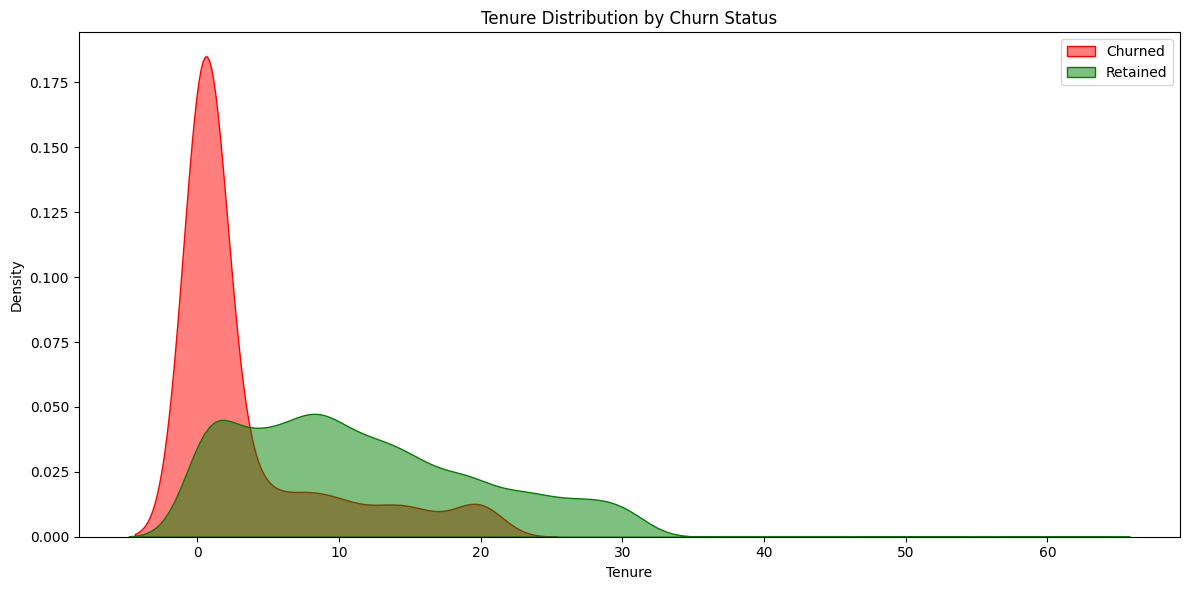

In [13]:
# Visualize Tenure distribution for churned vs retained customers
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dfs, x='Tenure', hue='Churn', common_norm=False,
            palette=['green', 'red'],
            fill=True, alpha=0.5)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend(labels=['Churned', 'Retained'])
plt.tight_layout()
plt.show()

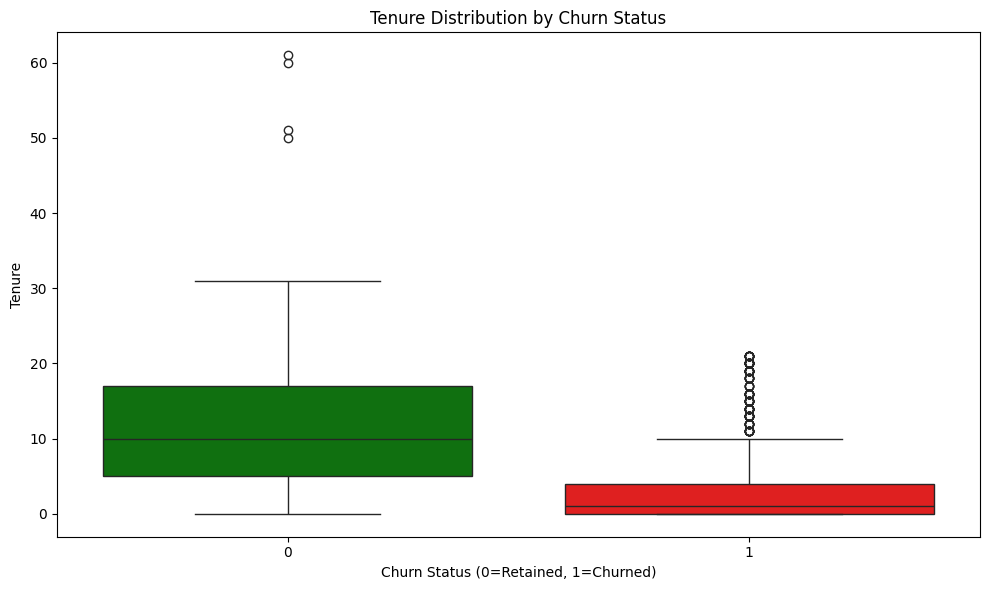

In [15]:
# Box plot of Tenure by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=dfs, palette=['green', 'red'])
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Tenure')
plt.tight_layout()
plt.show()

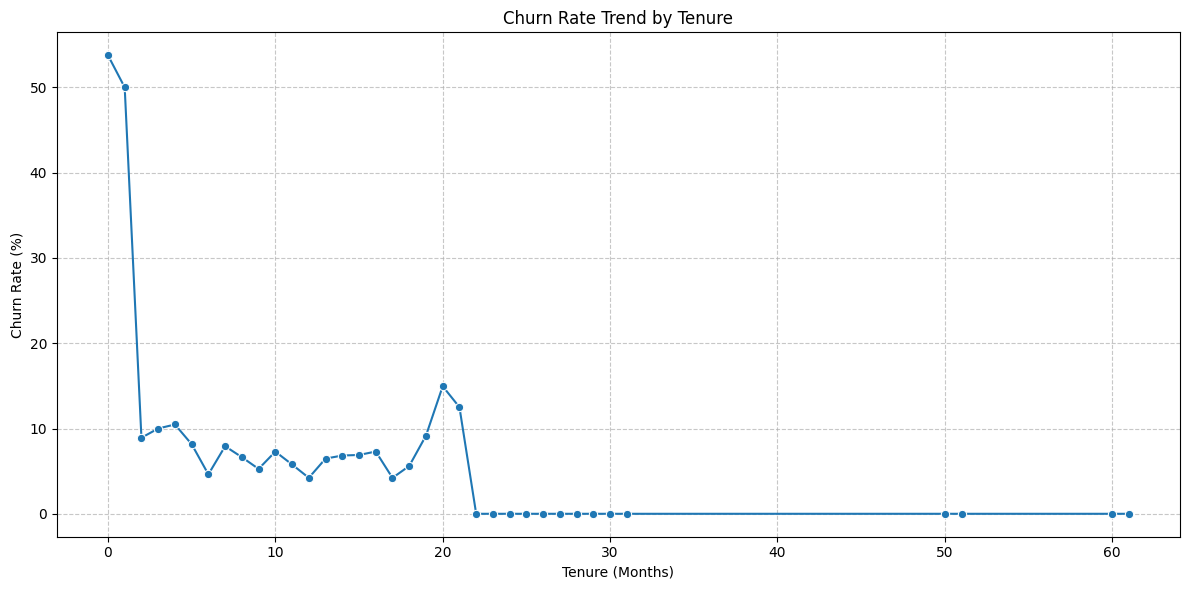

In [16]:
# Calculate churn rate for each tenure month (continuous)
tenure_monthly_churn = dfs.groupby('Tenure')['Churn'].mean().reset_index()
tenure_monthly_churn['Churn_Rate'] = tenure_monthly_churn['Churn'] * 100

# Line plot of churn rate by tenure month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tenure', y='Churn_Rate', data=tenure_monthly_churn, marker='o')
plt.title('Churn Rate Trend by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

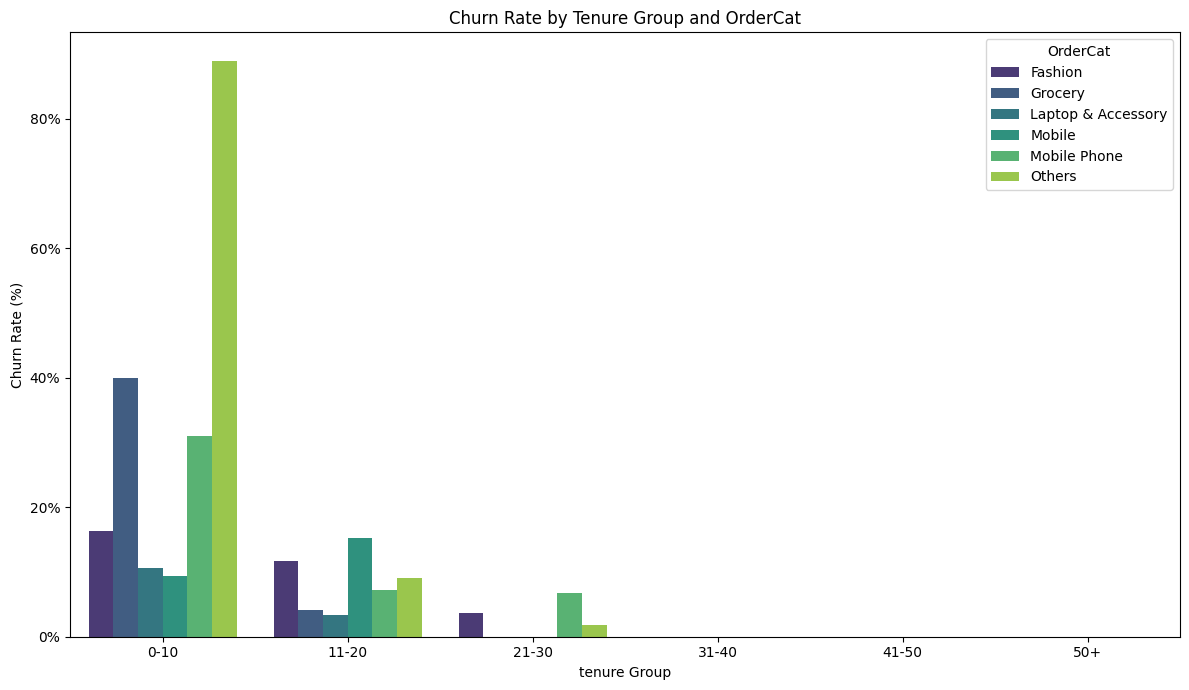

In [17]:
# Tenure groups for analysis
dfs['Tenure_Group'] = pd.cut(dfs['Tenure'],
                        bins=[0, 10, 20, 30, 40, 50, 61],
                        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])

# Calculate churn rate by tenure group
tenure_churn = dfs.groupby('Tenure_Group')['Churn'].mean().reset_index()
tenure_churn['Churn_Rate'] = tenure_churn['Churn'] * 100

# Churn rate by tenure group and OrderCat
tenure_sub_churn = dfs.groupby(['Tenure_Group', 'OrderCat'])['Churn'].mean().reset_index()
tenure_sub_churn['Churn_Rate'] = tenure_sub_churn['Churn'] * 100

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Tenure_Group', y='Churn_Rate', hue='OrderCat', data=tenure_sub_churn, palette='viridis')
plt.title('Churn Rate by Tenure Group and OrderCat')
plt.xlabel('tenure Group')
plt.ylabel('Churn Rate (%)')
plt.legend(title='OrderCat')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

In [130]:
# Statistical summary
tenure_order_stats = dfs.groupby(['Tenure_Group', 'OrderCat']).agg(
    Customer_Count=('Churn', 'count'),
    Churn_Rate=('Churn', 'mean')
).reset_index()

tenure_order_stats['Churn_Rate'] = tenure_order_stats['Churn_Rate'] * 100
print("Churn Statistics by Tenure Group and OrderCat:")
print(tenure_order_stats)

Churn Statistics by Tenure Group and OrderCat:
   Tenure_Group            OrderCat  Customer_Count  Churn_Rate
0          0-10             Fashion             330   16.363636
1          0-10             Grocery              35   40.000000
2          0-10  Laptop & Accessory            1006   10.536779
3          0-10              Mobile             215    9.302326
4          0-10        Mobile Phone             793   31.021438
5          0-10              Others               9   88.888889
6         11-20             Fashion             292   11.643836
7         11-20             Grocery             144    4.166667
8         11-20  Laptop & Accessory             559    3.398927
9         11-20              Mobile              92   15.217391
10        11-20        Mobile Phone             195    7.179487
11        11-20              Others             110    9.090909
12        21-30             Fashion             109    3.669725
13        21-30             Grocery             200    0.

<function matplotlib.pyplot.show(close=None, block=None)>

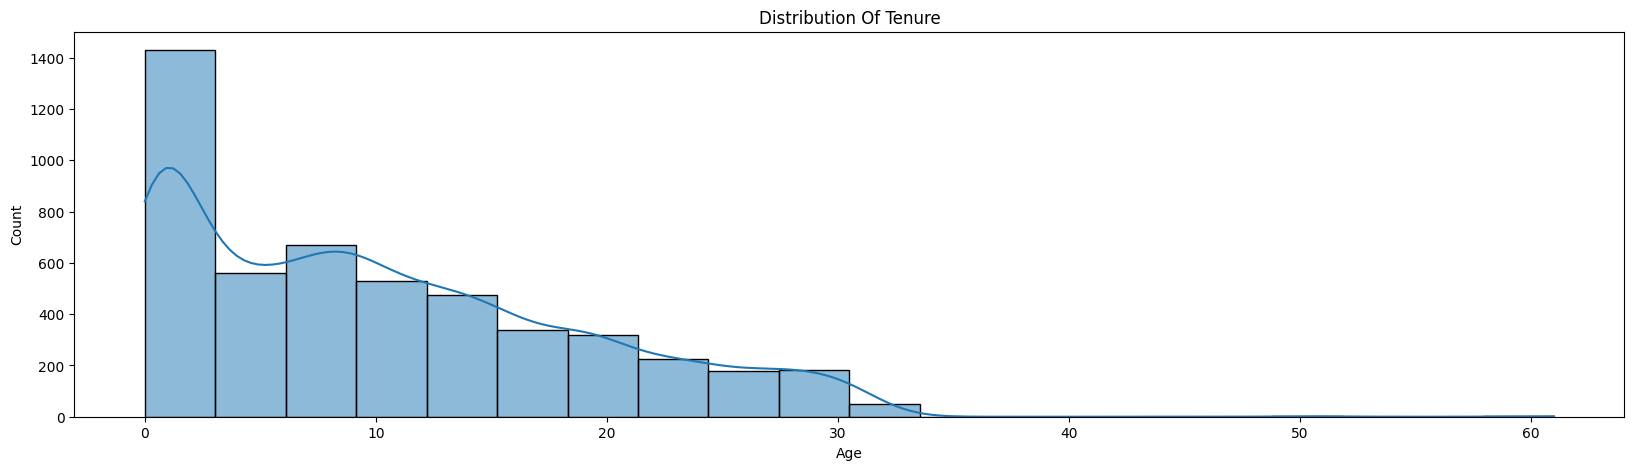

In [19]:
plt.figure(figsize=(20,5))
sns.histplot(dfs['Tenure'], bins=20 ,kde=True)
plt.title('Distribution Of Tenure')
plt.xlabel('Tenure')
plt.show

In [20]:
# Tenure statistics
tenure_stats = dfs['Tenure'].describe()
print("Tenure Statistics (months):")
print(tenure_stats)

Tenure Statistics (months):
count    4964.000000
mean       10.276793
std         8.630337
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64


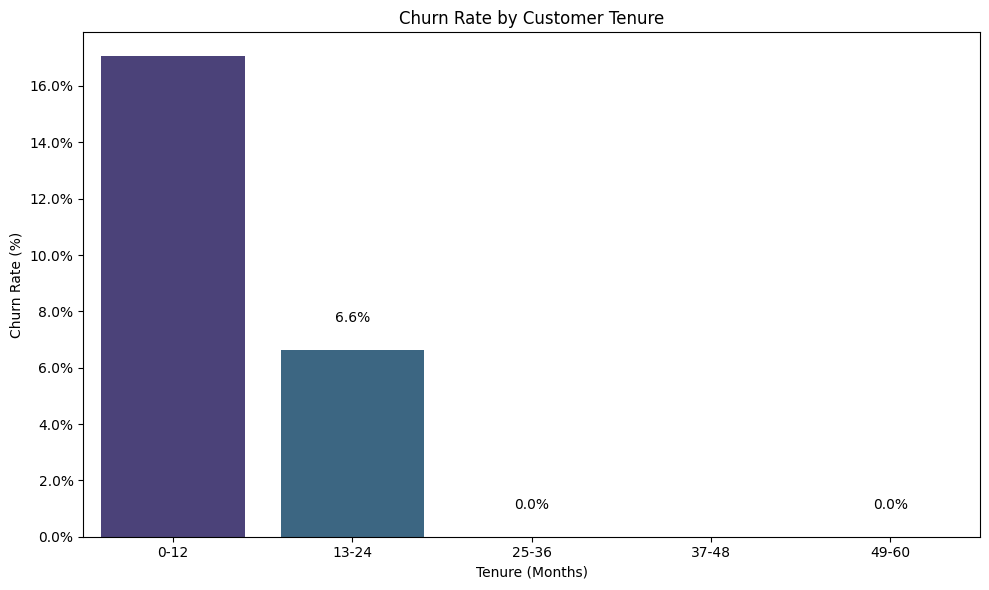

In [21]:
# Create tenure groups for analysis
dfst = dfs.copy()
dfst['Tenure_Group'] = pd.cut(dfst['Tenure'],
                          bins=[0, 12, 24, 36, 48, 60],
                          labels=['0-12', '13-24', '25-36', '37-48', '49-60'])

# Calculate churn rate by tenure group
tenure_churn = dfst.groupby('Tenure_Group')['Churn'].mean().reset_index()
tenure_churn['Churn_Rate'] = tenure_churn['Churn'] * 100

# Bar plot of churn rate by tenure group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tenure_Group', y='Churn_Rate', data=tenure_churn, palette='viridis')
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')

# Add percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

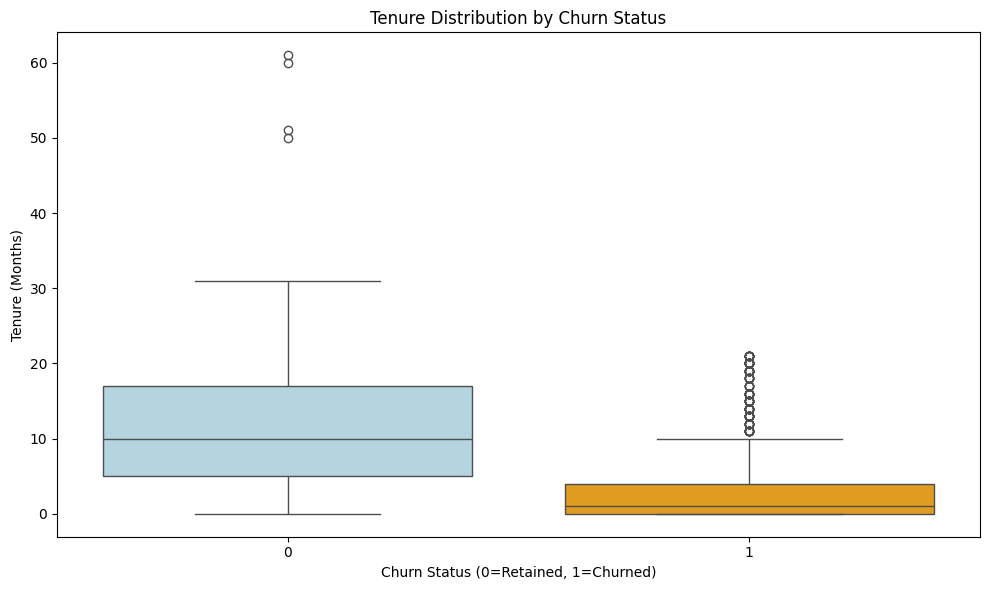

In [22]:
# Box plot of tenure by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=dfst, palette=['lightblue', 'orange'])
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()

In [23]:
def plot_numeric(numeric_col, target_col, df):
    # Calculate churn rate for each numerical_col (continuous)
    df = df.dropna(subset=[numeric_col])
    numerical_col_churn = None
    numerical_col_churn = df.groupby(numeric_col)[target_col].mean().reset_index()
    numerical_col_churn[target_col] = tenure_monthly_churn[target_col] * 100
    
    # Line plot of churn rate by tenure month
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=numeric_col, y=target_col, data=numerical_col_churn, marker='o')
    plt.title(f'{target_col} Trend by {numeric_col}')
    plt.xlabel(f'{numeric_col}')
    plt.ylabel(f'{target_col}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

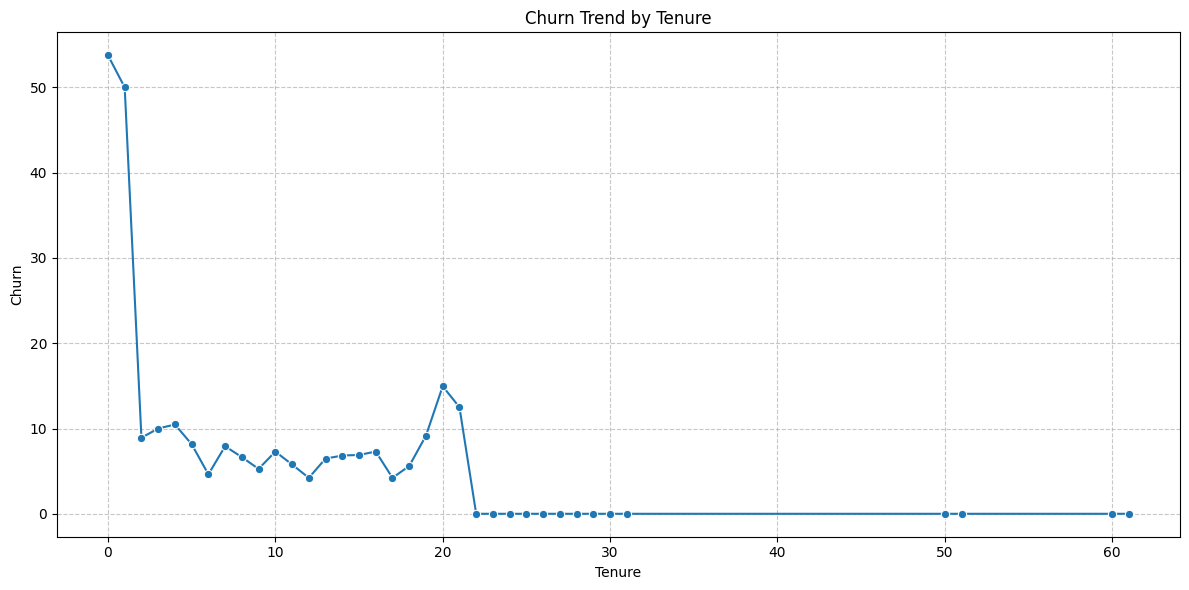

In [24]:
plot_numeric('Tenure', 'Churn', dfst)

#### Plot churn trend for all numeric features

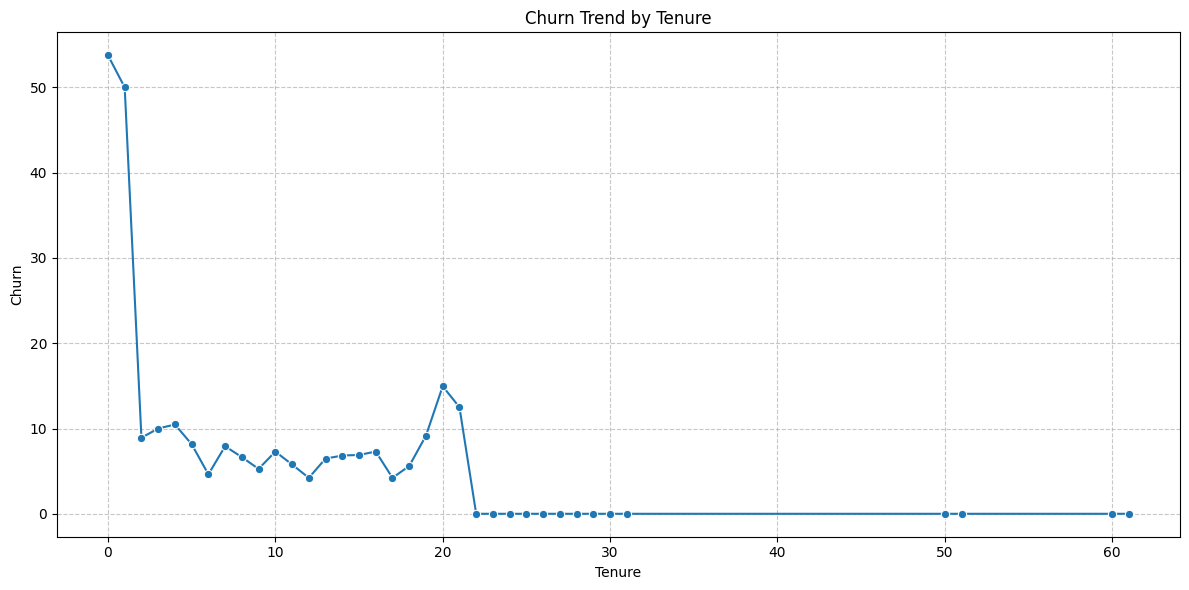

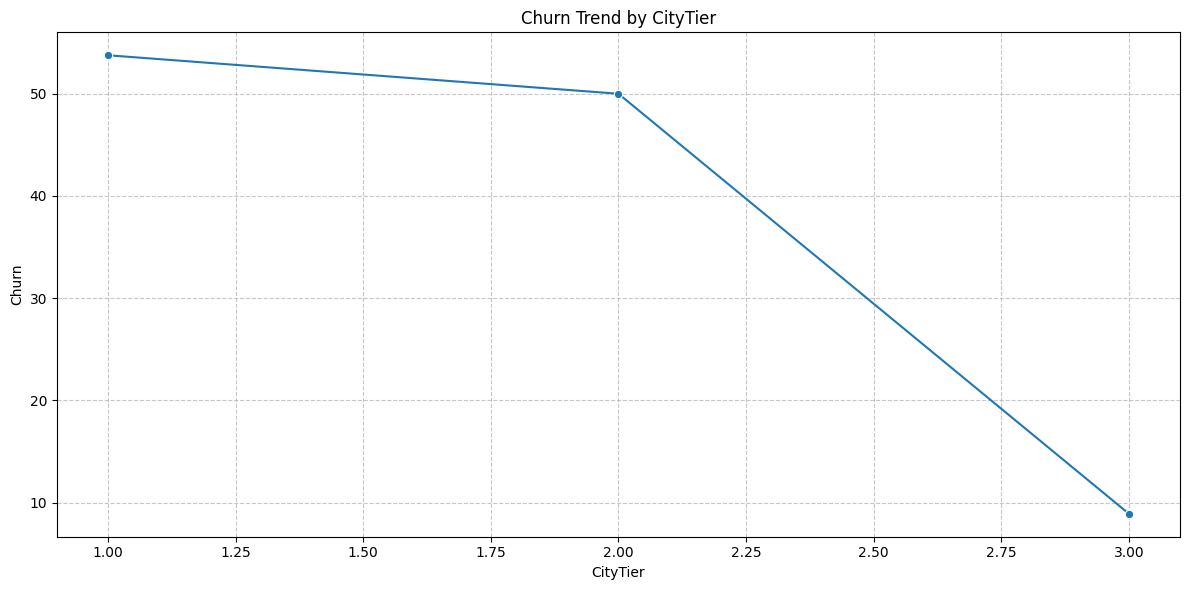

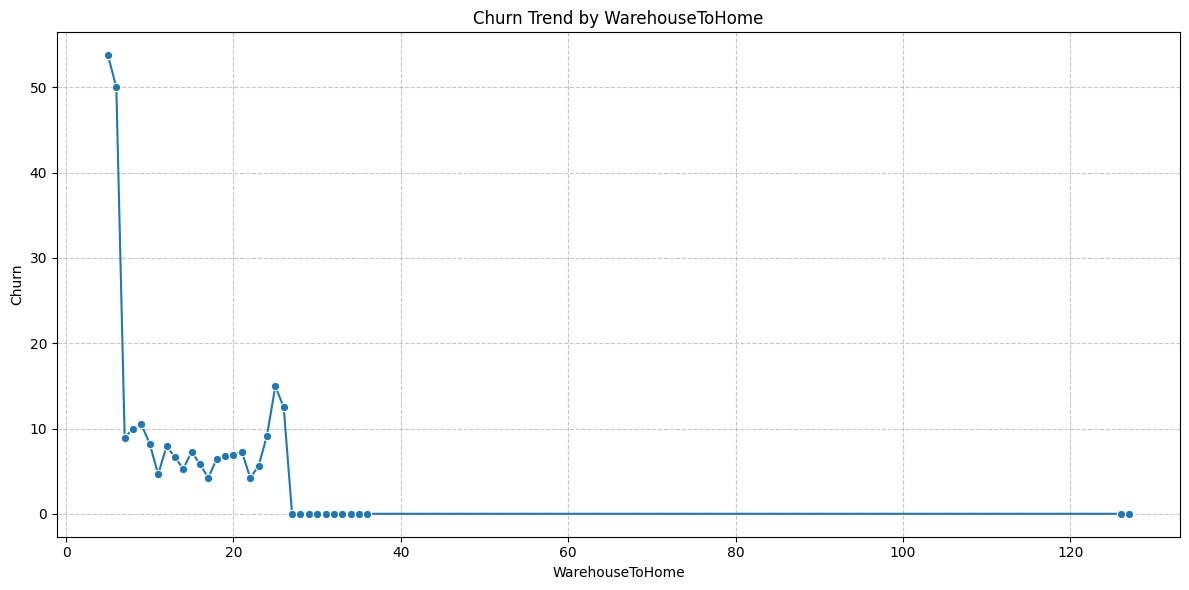

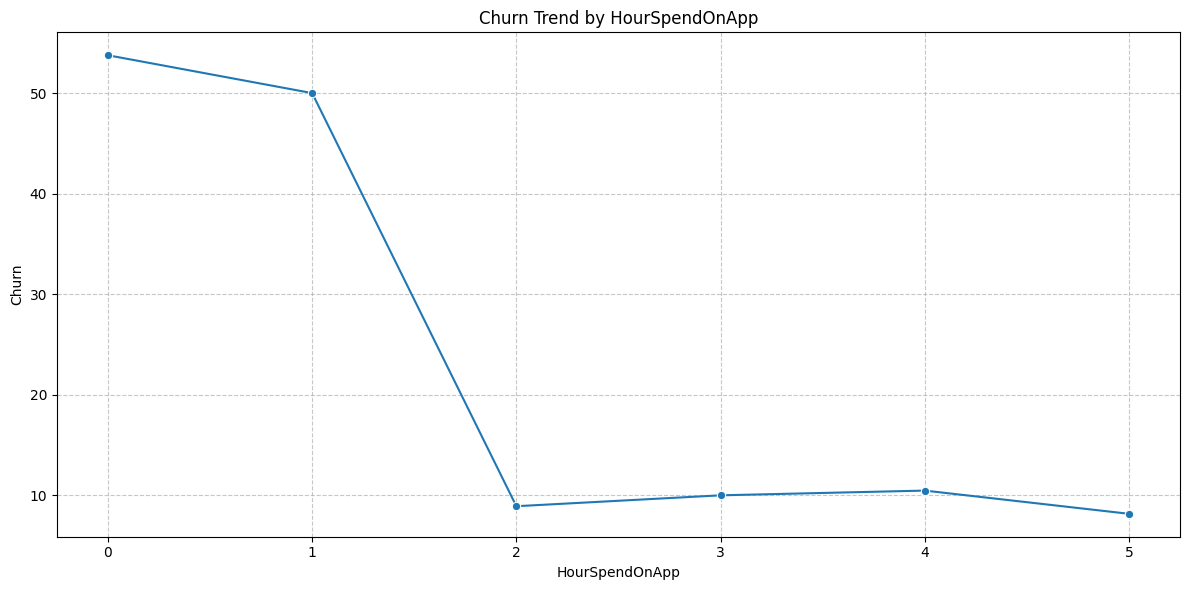

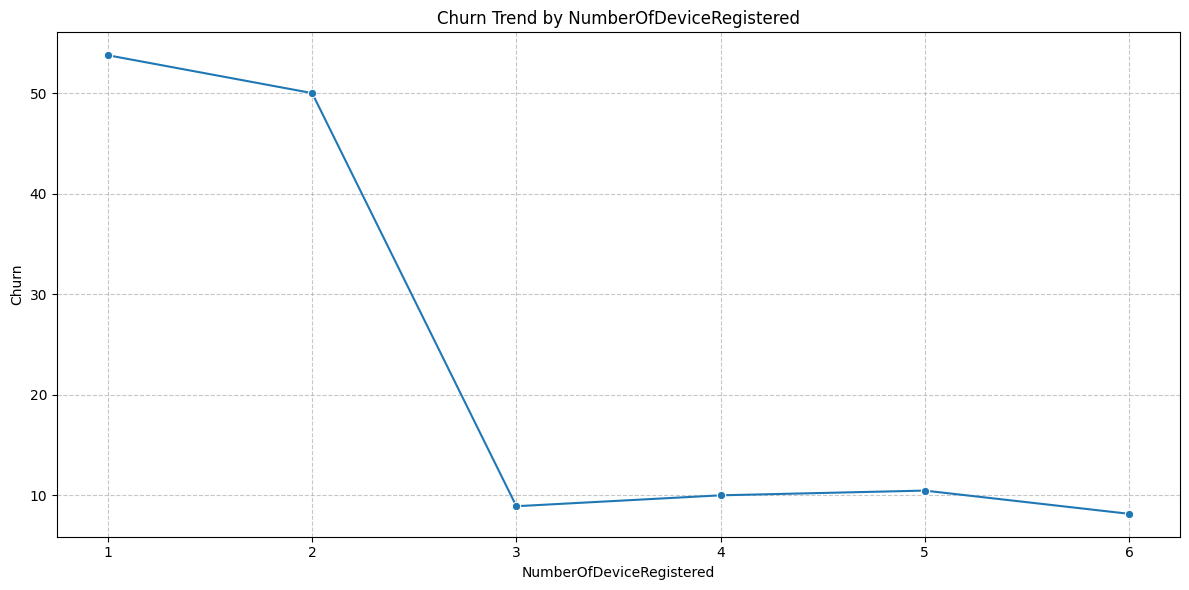

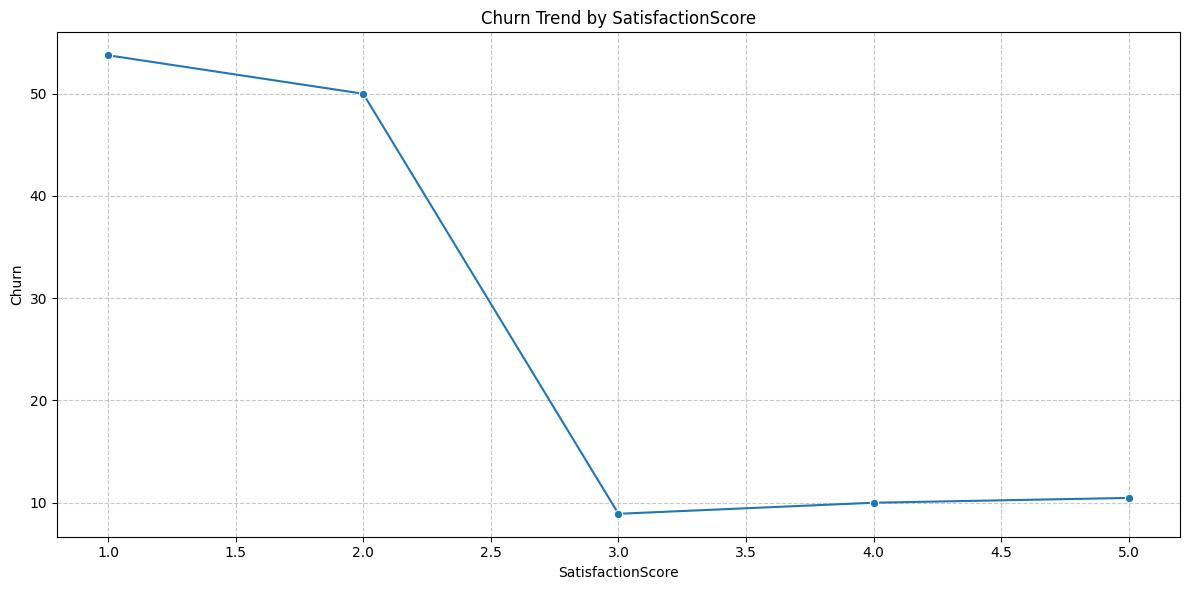

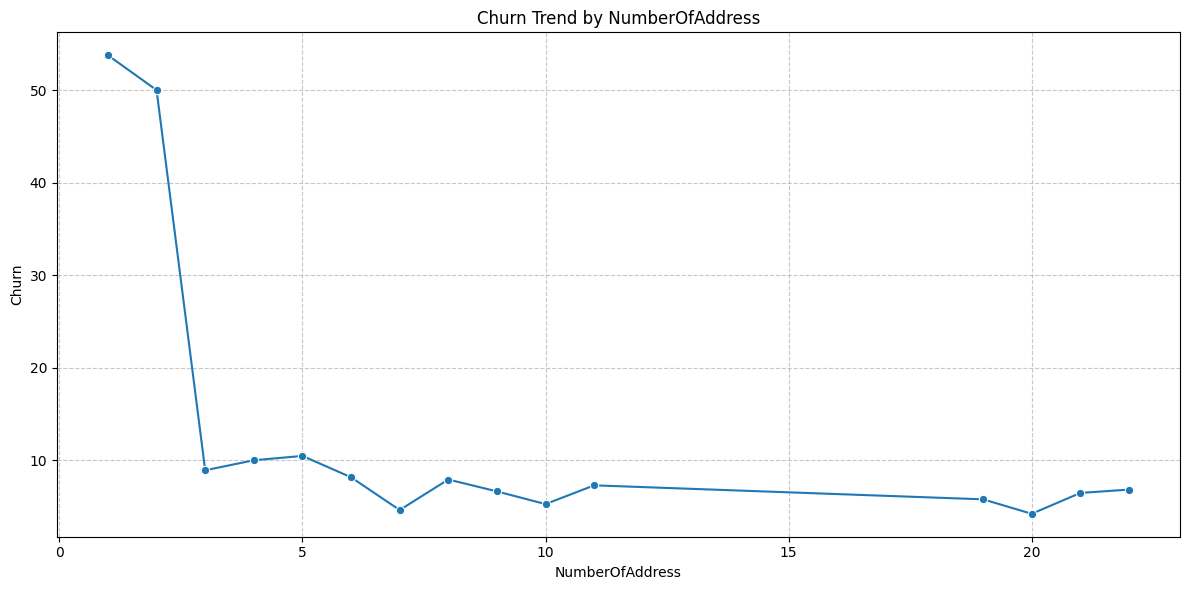

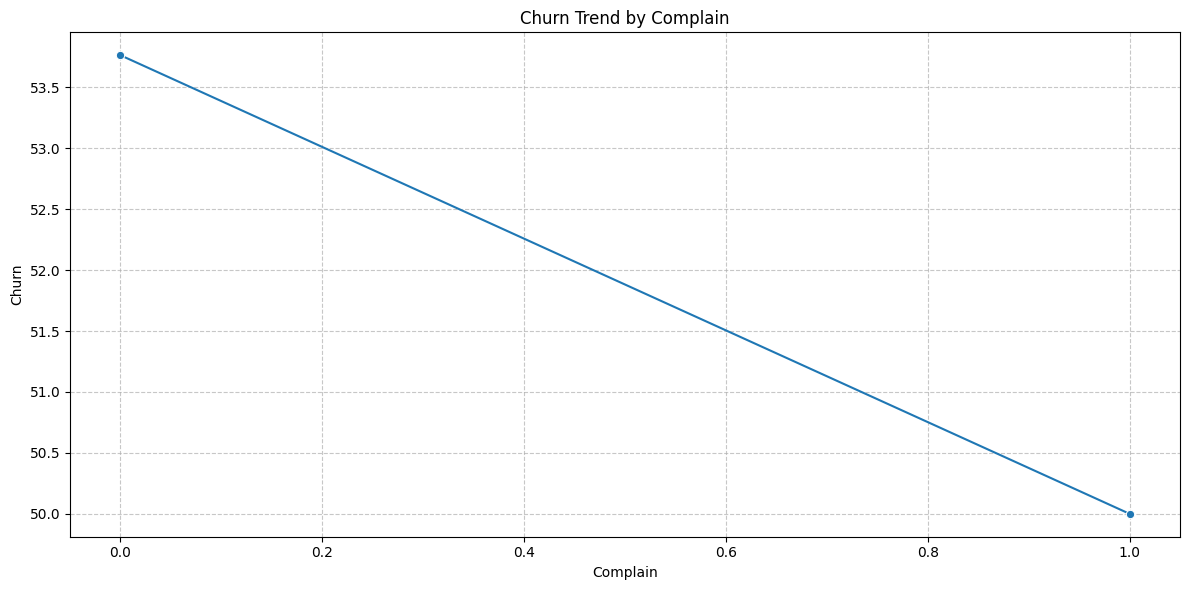

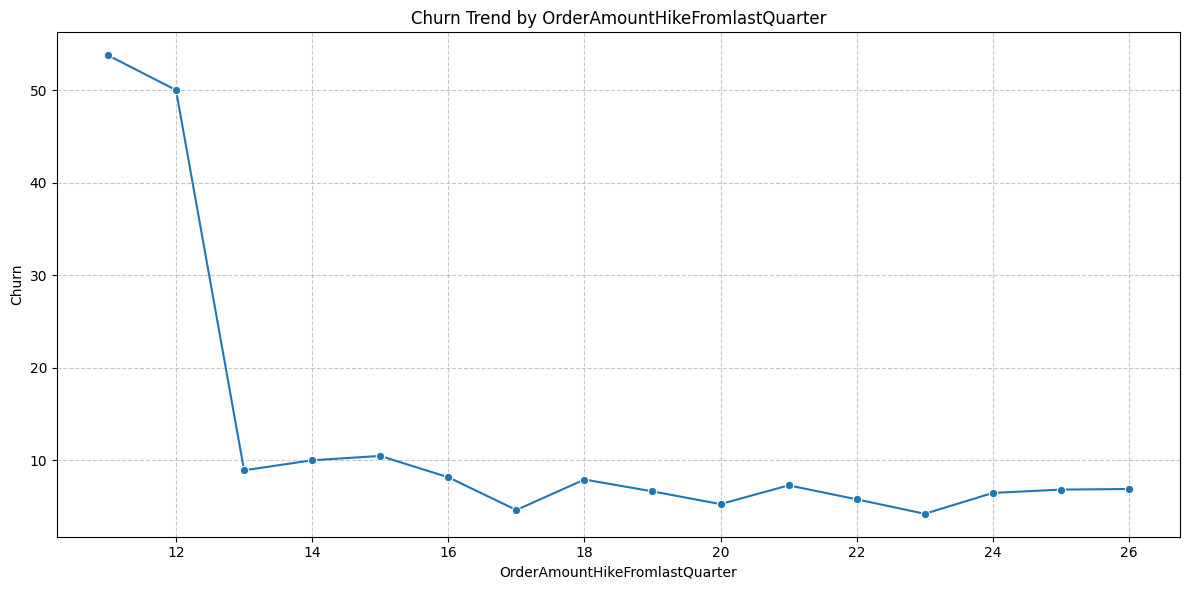

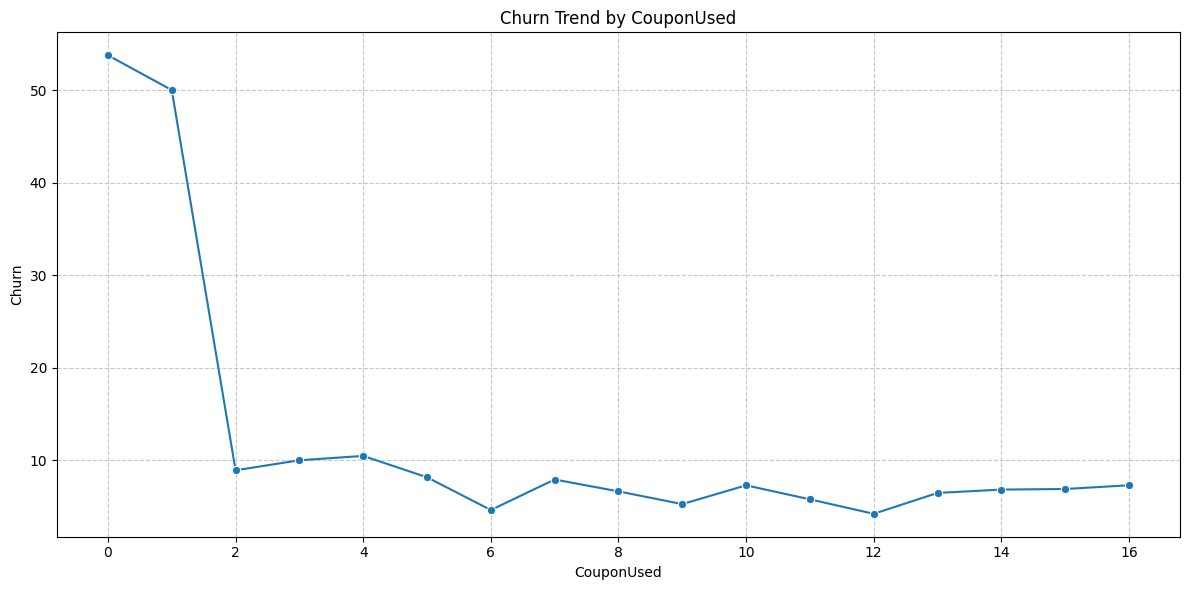

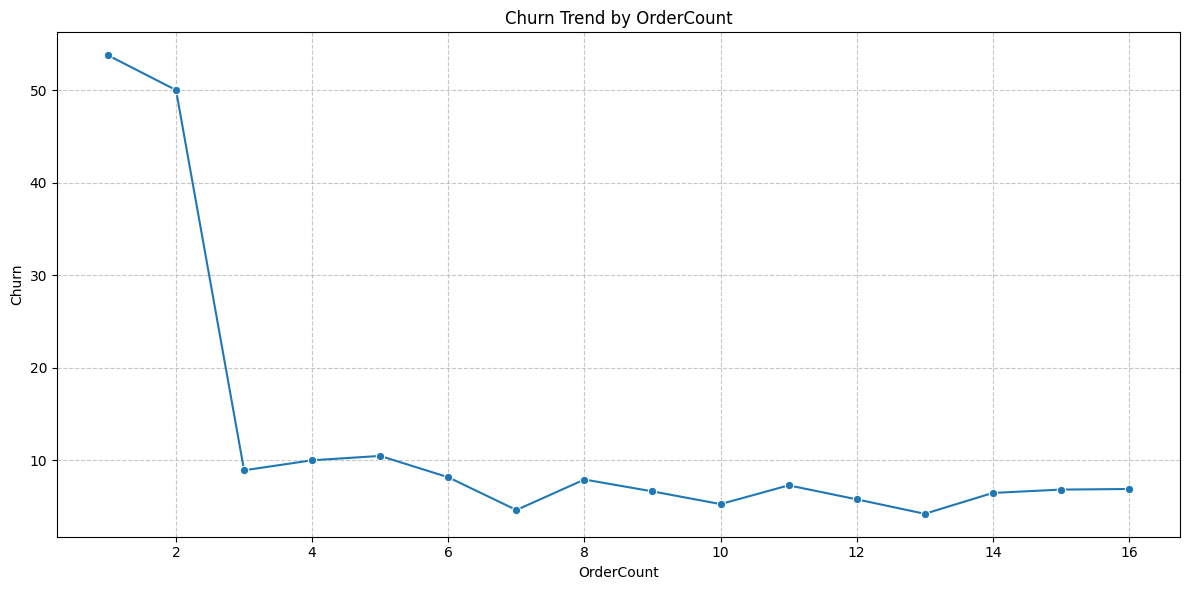

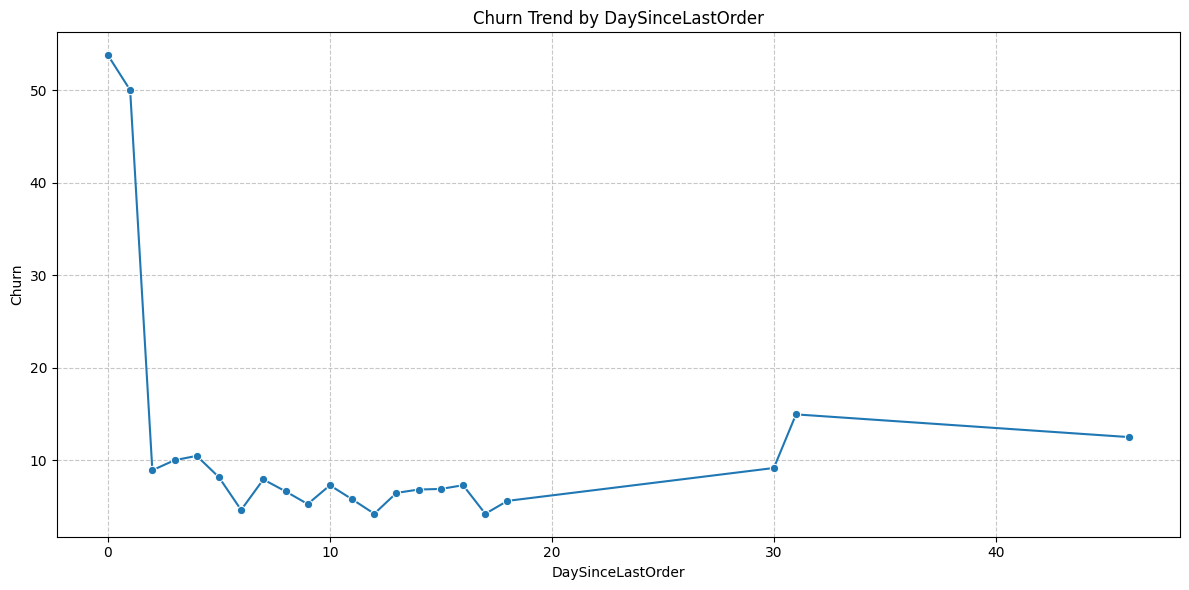

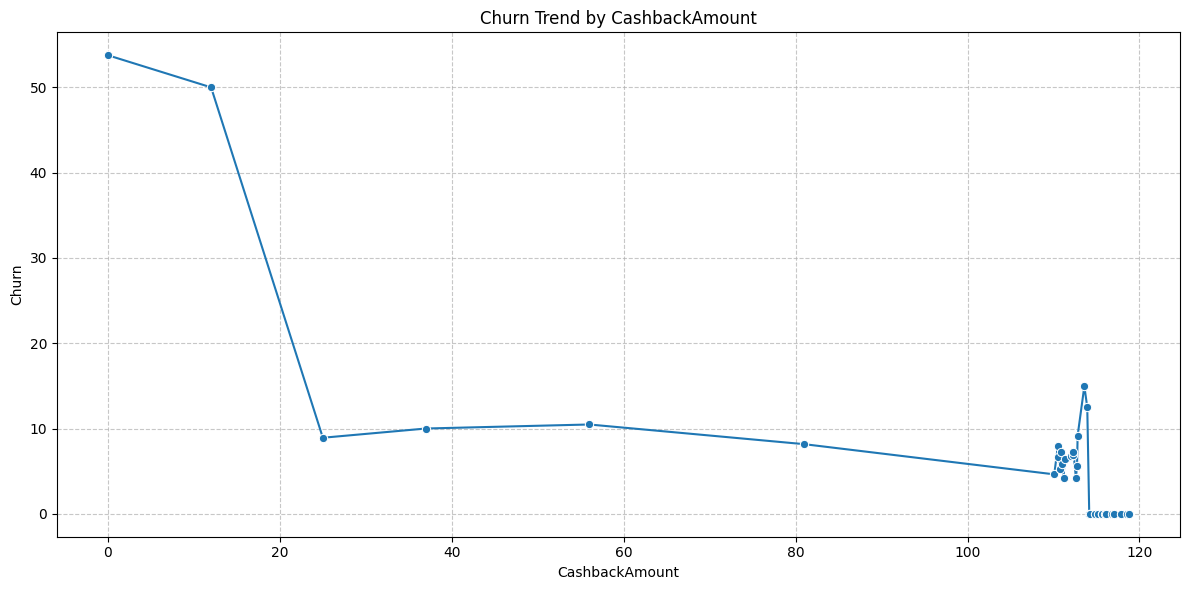

In [25]:
numeric_columns = dfst.drop(columns=['CustomerID']).select_dtypes(include=[np.number]).columns.tolist()
for num_col in numeric_columns:
    if num_col!='Churn': 
        # print(num_col)
        plot_numeric(num_col, 'Churn', dfst)

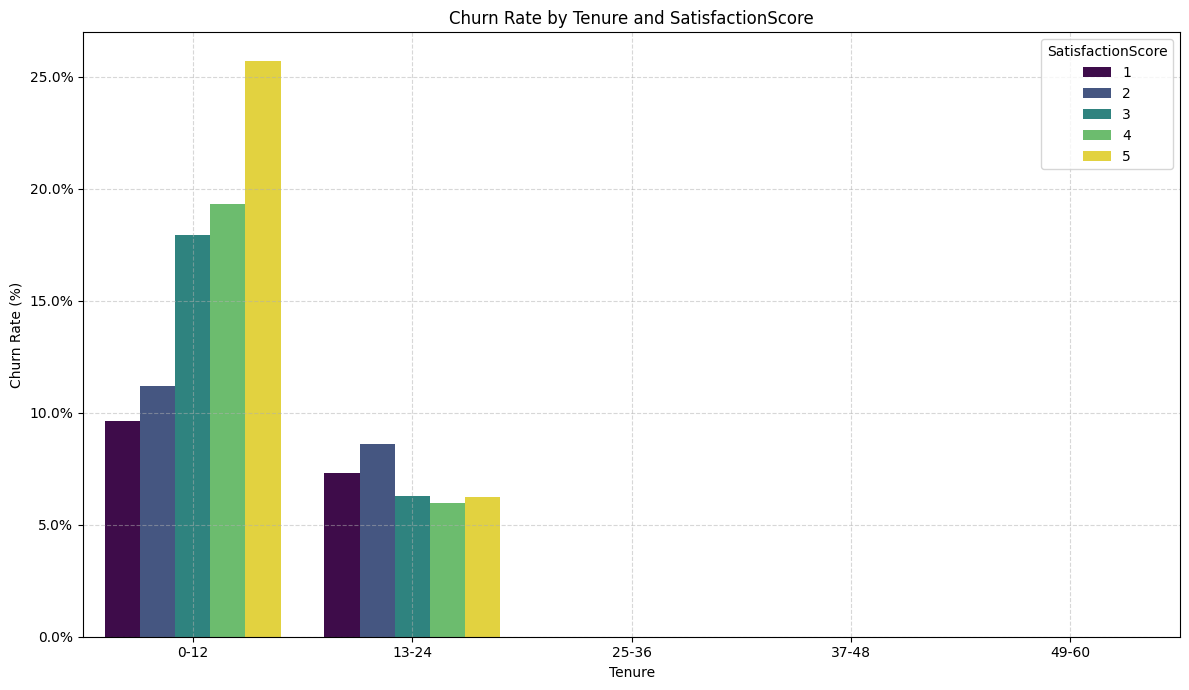

In [26]:
# Churn rate by tenure group and SatisfactionScore
tenure_satis_churn = dfst.groupby(['Tenure_Group', 'SatisfactionScore'])['Churn'].mean().reset_index()
tenure_satis_churn['Churn_Rate'] = tenure_satis_churn['Churn'] * 100

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Tenure_Group', y='Churn_Rate', hue='SatisfactionScore', data=tenure_satis_churn, palette='viridis')
plt.title('Churn Rate by Tenure and SatisfactionScore')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.legend(title='SatisfactionScore')
plt.grid(True, linestyle='--', alpha=0.5)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

In [27]:
# Statistical summary
tenure_satis_stats = dfst.groupby(['Tenure_Group', 'SatisfactionScore']).agg(
    Customer_Count=('Churn', 'count'),
    Churn_Rate=('Churn', 'mean')
).reset_index()

tenure_satis_stats['Churn_Rate'] = tenure_satis_stats['Churn_Rate'] * 100
print("Churn Statistics by Tenure Group and SatisfactionScore:")
print(tenure_satis_stats)

Churn Statistics by Tenure Group and SatisfactionScore:
   Tenure_Group  SatisfactionScore  Customer_Count  Churn_Rate
0          0-12                  1             602    9.634551
1          0-12                  2             304   11.184211
2          0-12                  3             808   17.945545
3          0-12                  4             507   19.329389
4          0-12                  5             506   25.691700
5         13-24                  1             260    7.307692
6         13-24                  2             128    8.593750
7         13-24                  3             429    6.293706
8         13-24                  4             269    5.947955
9         13-24                  5             272    6.250000
10        25-36                  1              85    0.000000
11        25-36                  2              47    0.000000
12        25-36                  3             121    0.000000
13        25-36                  4              74    0.000000

#### 2.2 Complain vs Churn Analysis

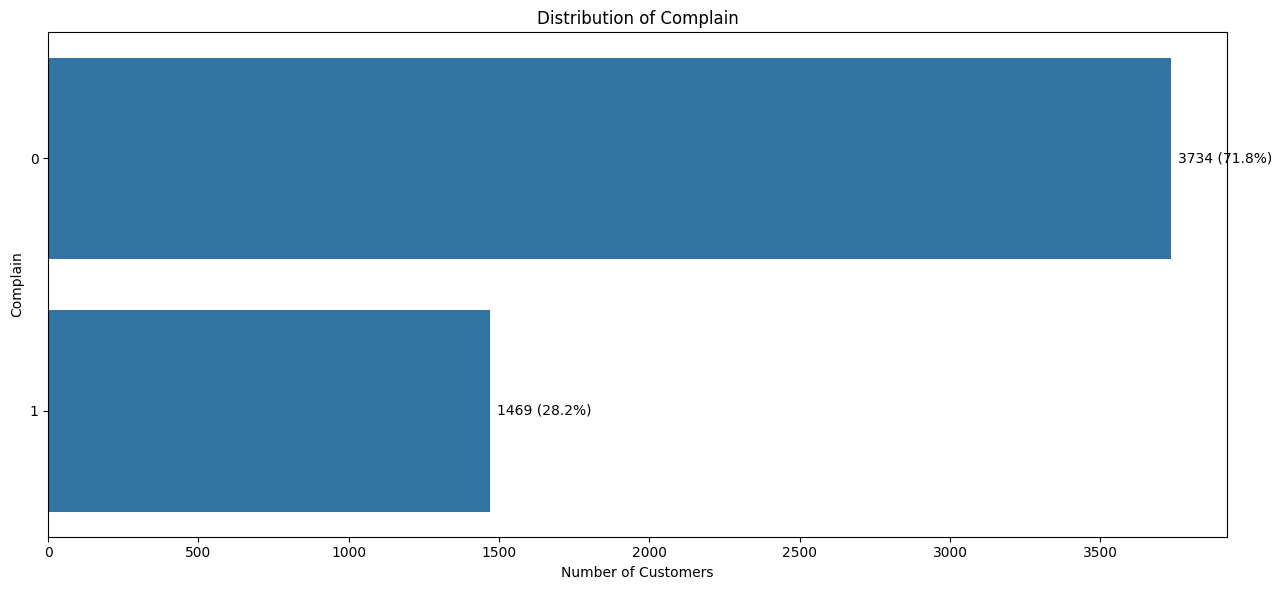

In [28]:
# Complain distribution
plt.figure(figsize=(13, 6))
complain_counts = dfs['Complain'].value_counts()
ax = sns.countplot(y='Complain', data=dfs, order=complain_counts.index)
plt.title('Distribution of Complain')
plt.xlabel('Number of Customers')
plt.ylabel('Complain')

# Add count and percentage labels
total = len(dfs)
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_width() / total
    label = f'{int(p.get_width())} ({percentage:.1f}%)'
    ax.annotate(label, (p.get_width(), p.get_y() + p.get_height()/2),
                va='center', ha='left', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [29]:
# Statistics by Complain
complain_stats = dfs.groupby('Complain').agg(
    Customer_Count=('CustomerID', 'count'),
    Percentage=('CustomerID', lambda x: len(x) / total * 100),
    Average_OrderCount=('OrderCount', 'mean'),
    Average_Tenure=('Tenure', 'mean')
).reset_index()

print("Complain Statistics:")
print(complain_stats)

Complain Statistics:
   Complain  Customer_Count  Percentage  Average_OrderCount  Average_Tenure
0         0            3734   71.766289            3.073929       10.364838
1         1            1469   28.233711            2.971035       10.054649


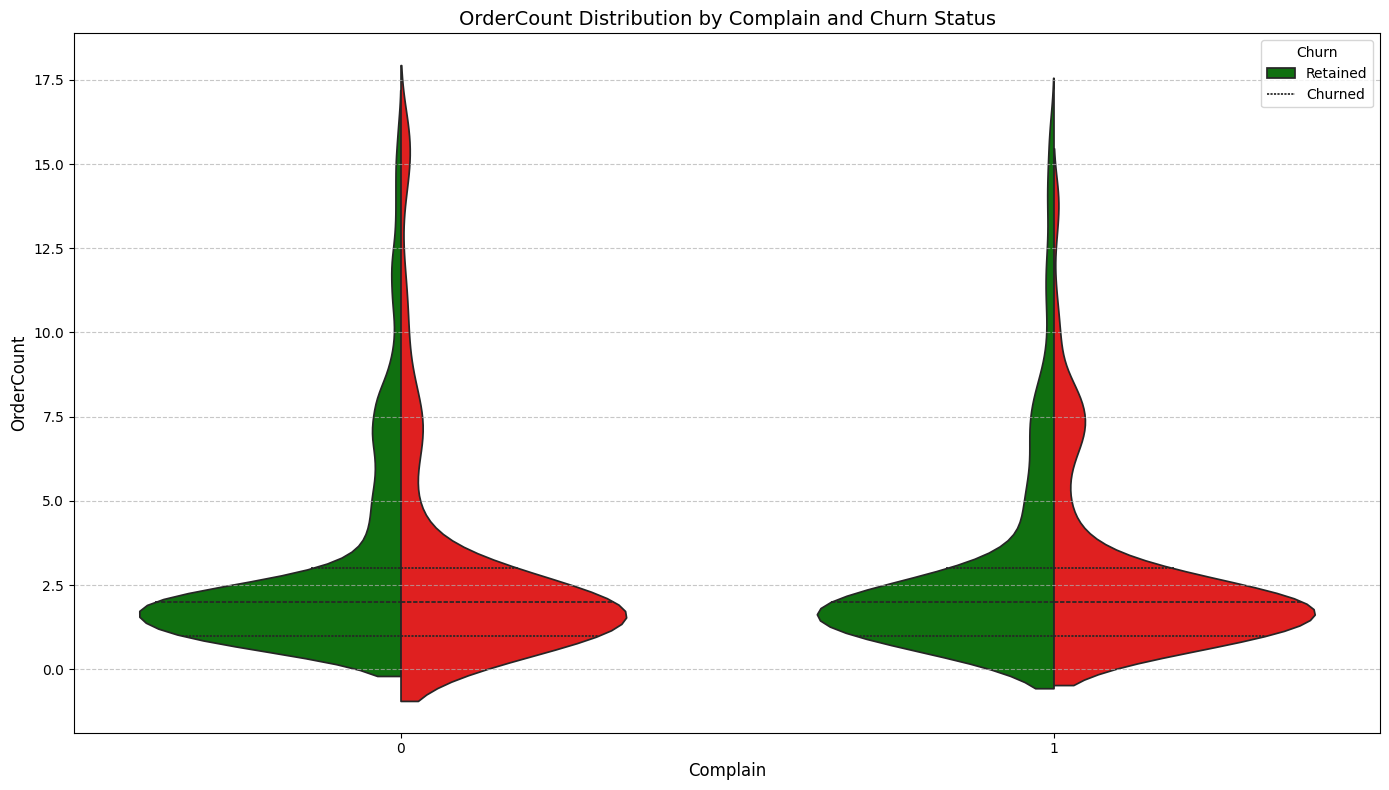

In [30]:
# A Violin Plot to shows the OrderCount distribution by Complain and Churn
plt.figure(figsize=(14, 8))
sns.violinplot(x='Complain', y='OrderCount', hue='Churn', data=dfs,
               palette=['green', 'red'], split=True, inner='quart')
plt.title('OrderCount Distribution by Complain and Churn Status', fontsize=14)
plt.xlabel('Complain', fontsize=12)
plt.ylabel('OrderCount', fontsize=12)
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# Statistical summary
complain_ordercount_stats = dfs.groupby(['Complain', 'OrderCount']).agg(
    Customer_Count=('Churn', 'count'),
    Churn_Rate=('Churn', 'mean')
).reset_index()

complain_ordercount_stats['Churn_Rate'] = complain_ordercount_stats['Churn_Rate'] * 100
print("Churn Statistics by Complain and OrderCount:")
print(complain_ordercount_stats)

Churn Statistics by Complain and OrderCount:
    Complain  OrderCount  Customer_Count  Churn_Rate
0          0         1.0            1161   12.403101
1          0         2.0            1328   11.972892
2          0         3.0             233   10.300429
3          0         4.0             139   10.071942
4          0         5.0             125    4.800000
5          0         6.0              99    6.060606
6          0         7.0             137   11.678832
7          0         8.0             113    8.849558
8          0         9.0              45    8.888889
9          0        10.0              24   16.666667
10         0        11.0              39   10.256410
11         0        12.0              42    4.761905
12         0        13.0              20    0.000000
13         0        14.0              22    9.090909
14         0        15.0              27   22.222222
15         0        16.0              17   35.294118
16         1         1.0             443   32.505643
1

#### 2.3 CashbackAmount vs Churn Analysis

In [32]:
# CashbackAmount statistics
cashback_stats = dfs['CashbackAmount'].describe()
print("CashbackAmount  Statistics ($):")
print(cashback_stats)

CashbackAmount  Statistics ($):
count    5203.000000
mean      177.467278
std        49.114460
min         0.000000
25%       145.890000
50%       163.800000
75%       197.470000
max       324.990000
Name: CashbackAmount, dtype: float64


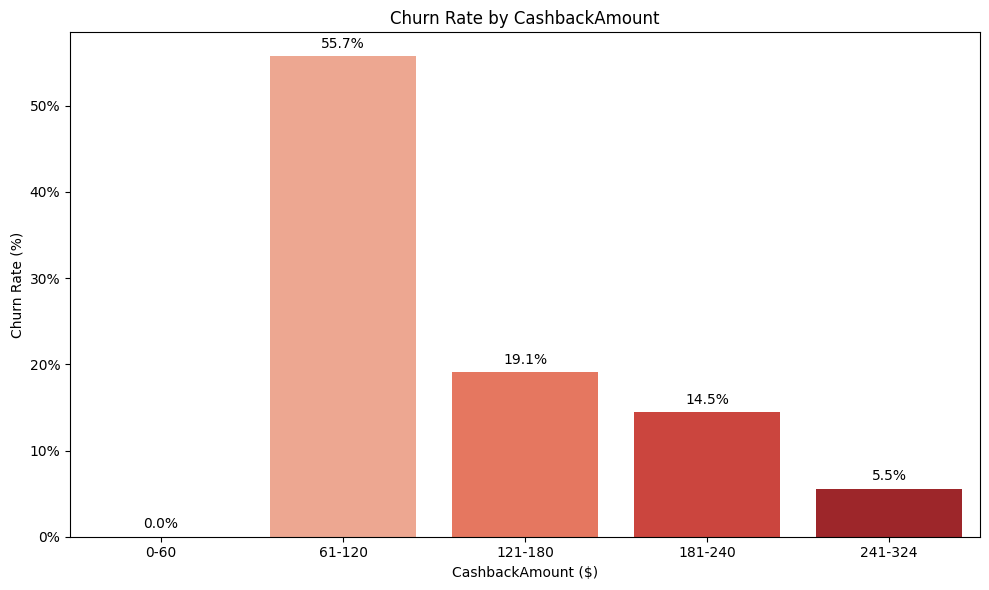

In [33]:
# Create CashbackAmount groups for analysis
dfs['CashbackAmount_Group'] = pd.cut(dfs['CashbackAmount'],
                         bins=[0, 60, 120, 180, 240, 324],
                         labels=['0-60', '61-120', '121-180', '181-240', '241-324'])

# Calculate churn rate by CashbackAmount group
cashback_churn = dfs.groupby('CashbackAmount_Group')['Churn'].mean().reset_index()
cashback_churn['Churn_Rate'] = cashback_churn['Churn'] * 100

# Bar plot of churn rate by CashbackAmount group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CashbackAmount_Group', y='Churn_Rate', data=cashback_churn, palette='Reds')
plt.title('Churn Rate by CashbackAmount')
plt.xlabel('CashbackAmount ($)')
plt.ylabel('Churn Rate (%)')

# Add percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

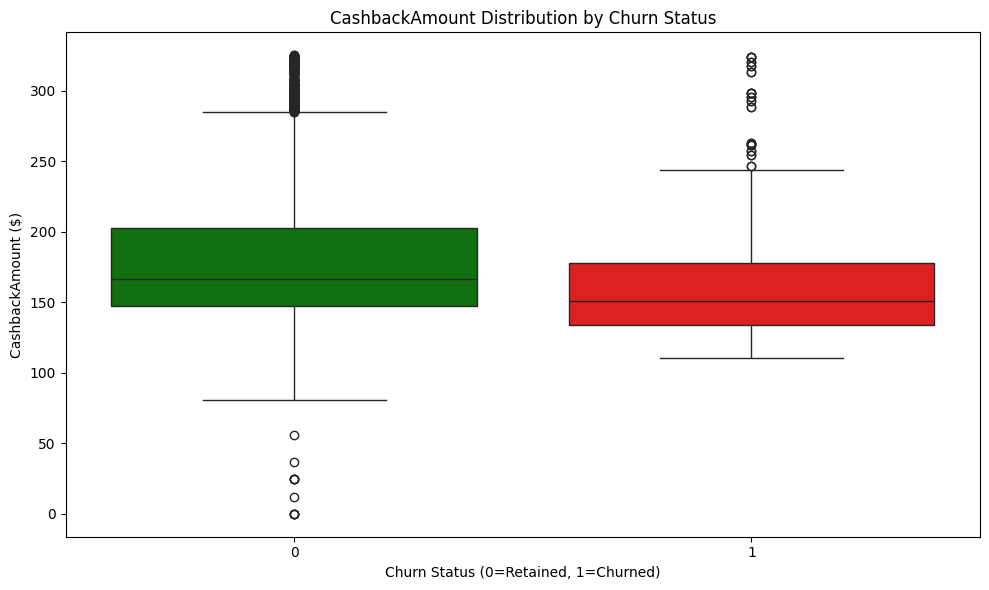

In [34]:
# Box plot comparing CashbackAmount for churned vs non-churned customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CashbackAmount', data=dfs, palette=['green', 'red'])
plt.title('CashbackAmount Distribution by Churn Status')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('CashbackAmount ($)')
plt.tight_layout()
plt.show()

In [35]:
# Statistical summary by CashbackAmount group
cashback_group_stats = dfs.groupby('CashbackAmount_Group').agg(
    Customer_Count=('Churn', 'count'),
    Churn_Rate=('Churn', 'mean'),
    Average_Tenure=('Tenure', 'mean'),
    Average_OrderCount=('OrderCount', 'mean')
).reset_index()

cashback_group_stats['Churn_Rate'] = cashback_group_stats['Churn_Rate'] * 100
print("Statistics by CashbackAmount Group:")
print(cashback_group_stats)

Statistics by CashbackAmount Group:
  CashbackAmount_Group  Customer_Count  Churn_Rate  Average_Tenure  \
0                 0-60               7    0.000000        9.428571   
1               61-120              61   55.737705        0.611111   
2              121-180            3341   19.066148        7.986963   
3              181-240            1169   14.456801       11.605646   
4              241-324             613    5.546493       19.595432   

   Average_OrderCount  
0            6.142857  
1            1.016393  
2            2.430111  
3            3.881844  
4            5.587755  


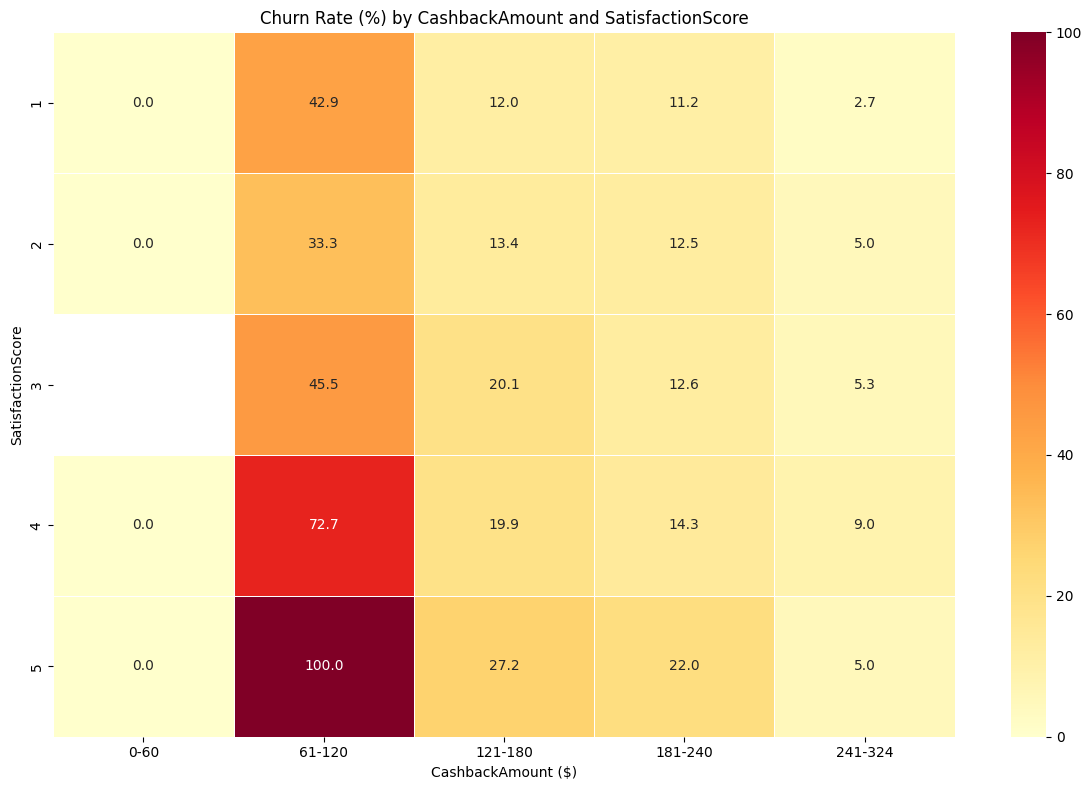

In [36]:
# Churn rate by payment CashbackAmount group and SatisfactionScore
cashback_satis_churn = dfs.groupby(['CashbackAmount_Group', 'SatisfactionScore'])['Churn'].mean().reset_index()
cashback_satis_churn['Churn_Rate'] = cashback_satis_churn['Churn'] * 100

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap_data = cashback_satis_churn.pivot(index='SatisfactionScore', columns='CashbackAmount_Group', values='Churn_Rate')
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)
plt.title('Churn Rate (%) by CashbackAmount and SatisfactionScore')
plt.xlabel('CashbackAmount ($)')
plt.ylabel('SatisfactionScore')
plt.tight_layout()
plt.show()

In [37]:
# Statistical summary
cashback_satis_stats = dfs.groupby(['CashbackAmount_Group', 'SatisfactionScore']).agg(
    Customer_Count=('Churn', 'count'),
    Churn_Rate=('Churn', 'mean')
).reset_index()

cashback_satis_stats['Churn_Rate'] = cashback_satis_stats['Churn_Rate'] * 100
print("Churn Statistics by CashbackAmount_Group and SatisfactionScore:")
print(cashback_satis_stats)

Churn Statistics by CashbackAmount_Group and SatisfactionScore:
   CashbackAmount_Group  SatisfactionScore  Customer_Count  Churn_Rate
0                  0-60                  1               3    0.000000
1                  0-60                  2               1    0.000000
2                  0-60                  3               0         NaN
3                  0-60                  4               1    0.000000
4                  0-60                  5               2    0.000000
5                61-120                  1              14   42.857143
6                61-120                  2               6   33.333333
7                61-120                  3              22   45.454545
8                61-120                  4              11   72.727273
9                61-120                  5               8  100.000000
10              121-180                  1             692   11.994220
11              121-180                  2             352   13.352273
12           

#### 2.4 CouponUsed vs Churn Analysis

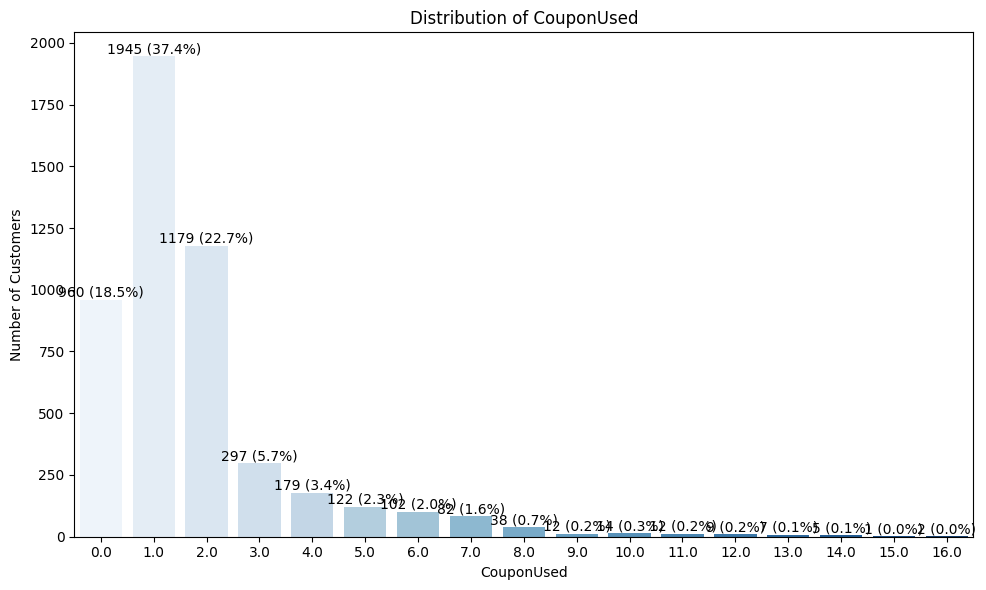

In [38]:
# CouponUsed distribution
plt.figure(figsize=(10, 6))
coupon_counts = dfs['CouponUsed'].value_counts().sort_index()
ax = sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='Blues')
plt.title('Distribution of CouponUsed')
plt.xlabel('CouponUsed')
plt.ylabel('Number of Customers')

# Add count and percentage labels
total = len(dfs)
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    label = f'{int(p.get_height())} ({percentage:.1f}%)'
    ax.annotate(label, (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Feature Engineering, add a new feature CouponUsed_per_Order 

In [39]:
# CouponUsed statistics, need to check Coupon Used per Order

dfs['CouponUsed_per_Order'] = dfs['CouponUsed']*1.0/dfs['OrderCount']
coupon_stats = dfs.groupby('CouponUsed').agg(
    Customer_Count=('CustomerID', 'count'),
    Percentage=('CustomerID', lambda x: len(x) / total * 100),
    Average_OrderCount=('OrderCount', 'mean'),
    Average_CouponUsed_per_Order=('CouponUsed_per_Order', 'mean'),
    Average_Tenure=('Tenure', 'mean')
).reset_index()

print("CouponUsed Statistics:")
print(coupon_stats)

CouponUsed Statistics:
    CouponUsed  Customer_Count  Percentage  Average_OrderCount  \
0          0.0             960   18.450894            1.460954   
1          1.0            1945   37.382279            1.986624   
2          2.0            1179   22.660004            2.720249   
3          3.0             297    5.708245            5.115242   
4          4.0             179    3.440323            6.786164   
5          5.0             122    2.344801            7.414414   
6          6.0             102    1.960407            8.375000   
7          7.0              82    1.576014            8.770270   
8          8.0              38    0.730348            9.527778   
9          9.0              12    0.230636           11.666667   
10        10.0              14    0.269076           12.692308   
11        11.0              12    0.230636           14.125000   
12        12.0               9    0.172977           13.125000   
13        13.0               7    0.134538           

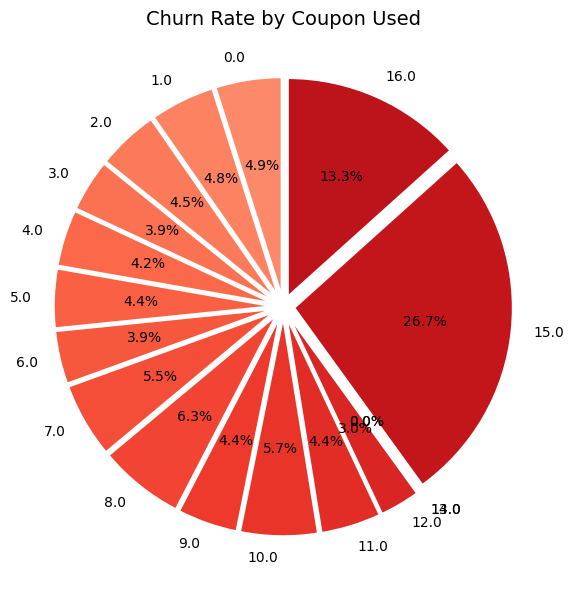

In [40]:
# Pie Chart - Churn rate comparison by CouponUsed
plt.figure(figsize=(12, 6))
coupon_churn = dfs.groupby('CouponUsed')['Churn'].mean() * 100
colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(coupon_churn)))

plt.pie(coupon_churn, labels=coupon_churn.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=[0.05]*len(coupon_churn),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.title('Churn Rate by Coupon Used', fontsize=14)
plt.tight_layout()
plt.show()

## Analysis from CX perspectives
#### Identify factors contributing to customer churn

#### 2.5 EDA Statistical Correlation Analysis

In [41]:
# Remove 'CustomerID', 'CashbackAmount_Group', 'Tenure_Group' from the list of numeric columns. No longer needed.
dfsn = dfs.drop(columns=['CustomerID', 'CashbackAmount_Group', 'Tenure_Group'])

# Select only numeric columns for correlation analysis
numeric_columns = dfsn.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations between numeric features and churn
pearson_corr = dfsn[numeric_columns].corr(method='pearson')['Churn'].sort_values(ascending=False)
spearman_corr = dfsn[numeric_columns].corr(method='spearman')['Churn'].sort_values(ascending=False)
kendall_corr = dfsn[numeric_columns].corr(method='kendall')['Churn'].sort_values(ascending=False)

# Compare different correlation methods
correlation_comparison = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Kendall': kendall_corr
})
print(correlation_comparison)

                                 Pearson  Spearman   Kendall
CashbackAmount                 -0.148098 -0.166152 -0.135695
Churn                           1.000000  1.000000  1.000000
CityTier                        0.078697  0.078061  0.077195
Complain                        0.246966  0.246966  0.246966
CouponUsed                     -0.009778 -0.018719 -0.016958
CouponUsed_per_Order           -0.002919 -0.000366 -0.000330
DaySinceLastOrder              -0.156071 -0.180102 -0.154269
HourSpendOnApp                  0.019103  0.016913  0.016018
NumberOfAddress                 0.040630  0.026106  0.022772
NumberOfDeviceRegistered        0.112618  0.105080  0.096873
OrderAmountHikeFromlastQuarter -0.009274 -0.018709 -0.015950
OrderCount                     -0.029462 -0.027682 -0.025045
SatisfactionScore               0.110816  0.110313  0.099287
Tenure                         -0.344895 -0.399514 -0.333893
WarehouseToHome                 0.066850  0.070943  0.059330


In [42]:
cat_columns = list(set(dfsn.columns) - set(numeric_columns))

for col in cat_columns:
    print(f"Unique values for {col}: {dfsn[col].unique()}") 

Unique values for MaritalStatus: ['Single' 'Divorced' 'Married']
Unique values for PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values for Gender: ['Female' 'Male']
Unique values for OrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values for PaymentMode: ['Debit Card' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


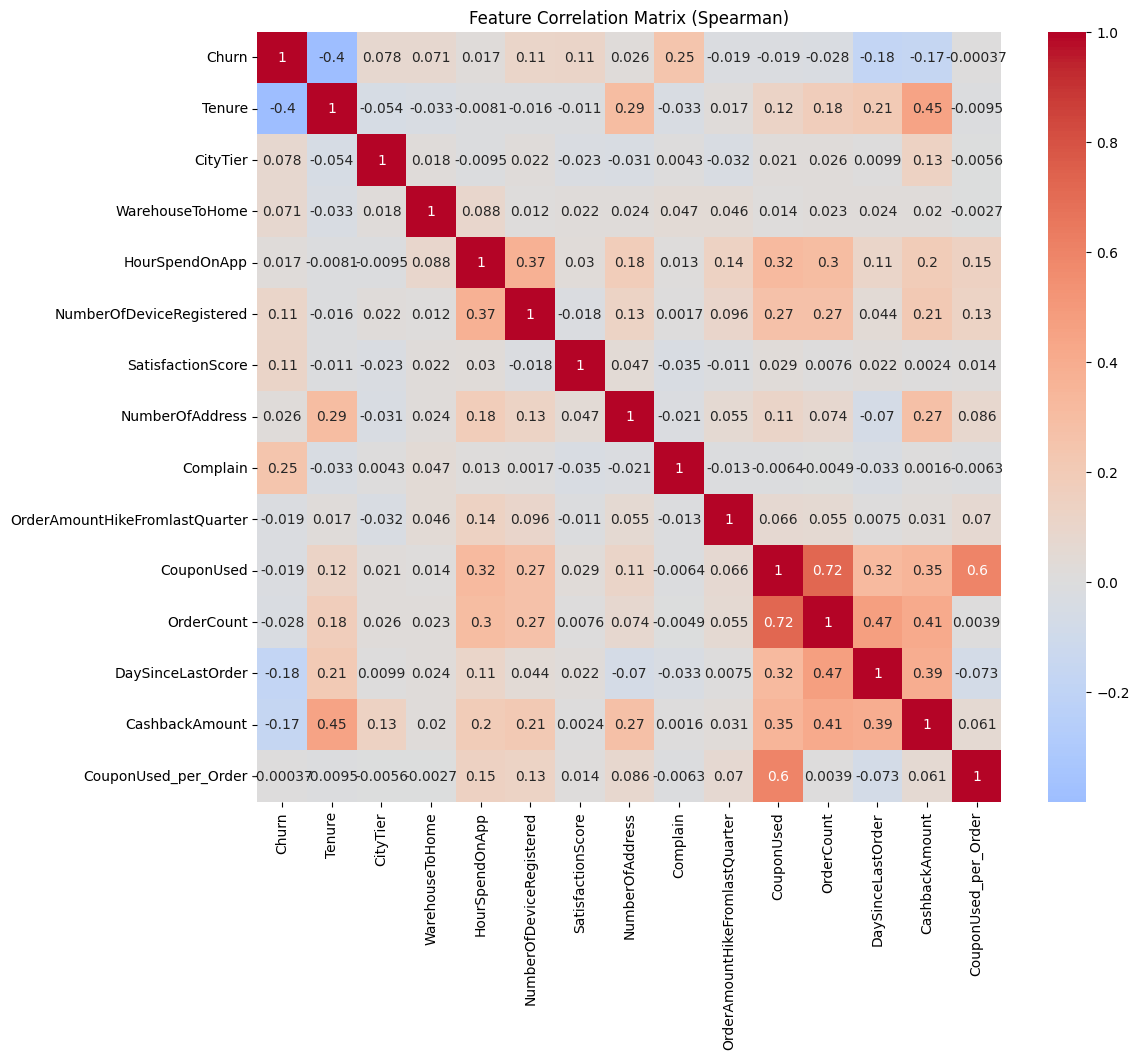

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn[numeric_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

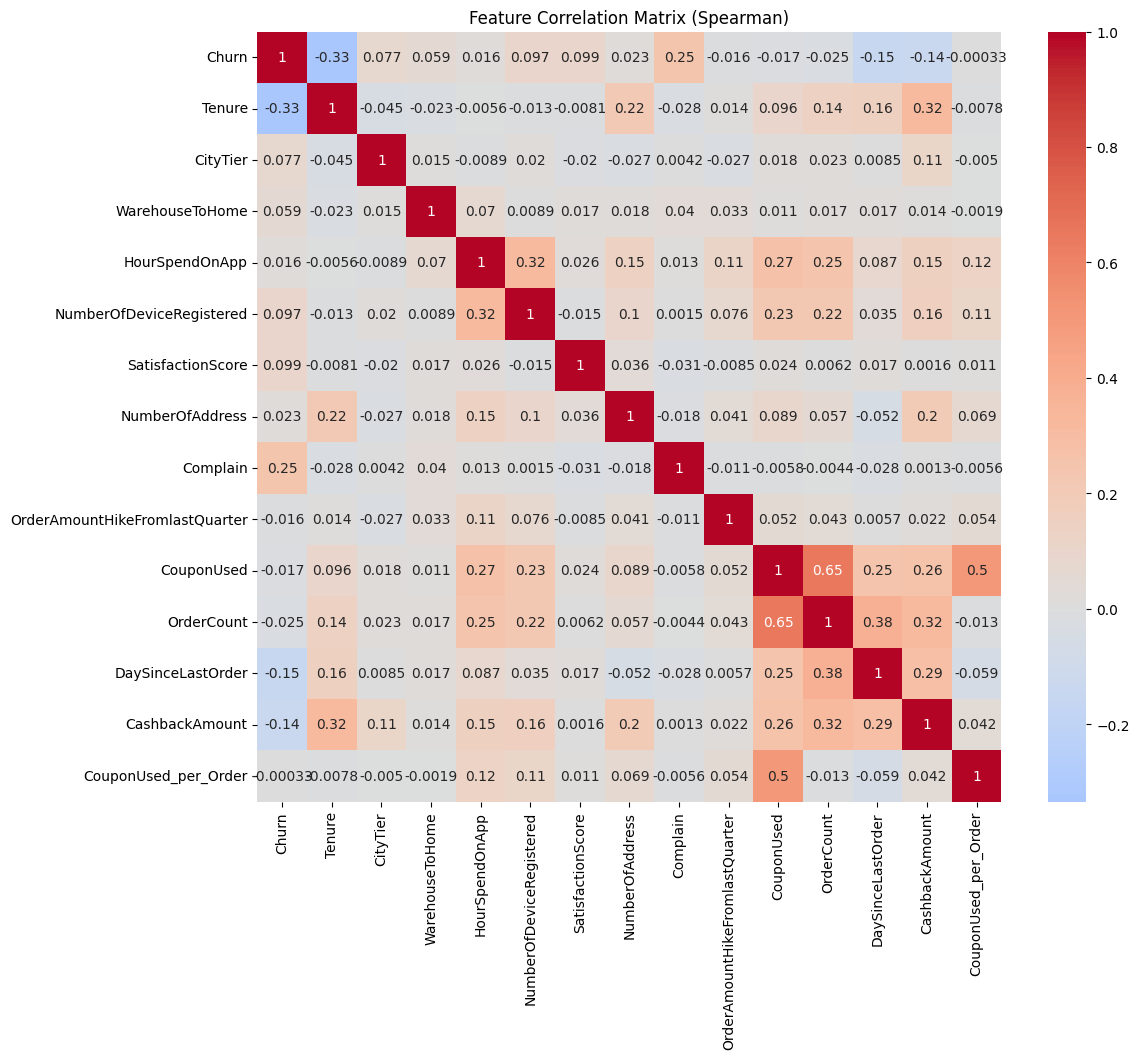

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn[numeric_columns].corr(method='kendall'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

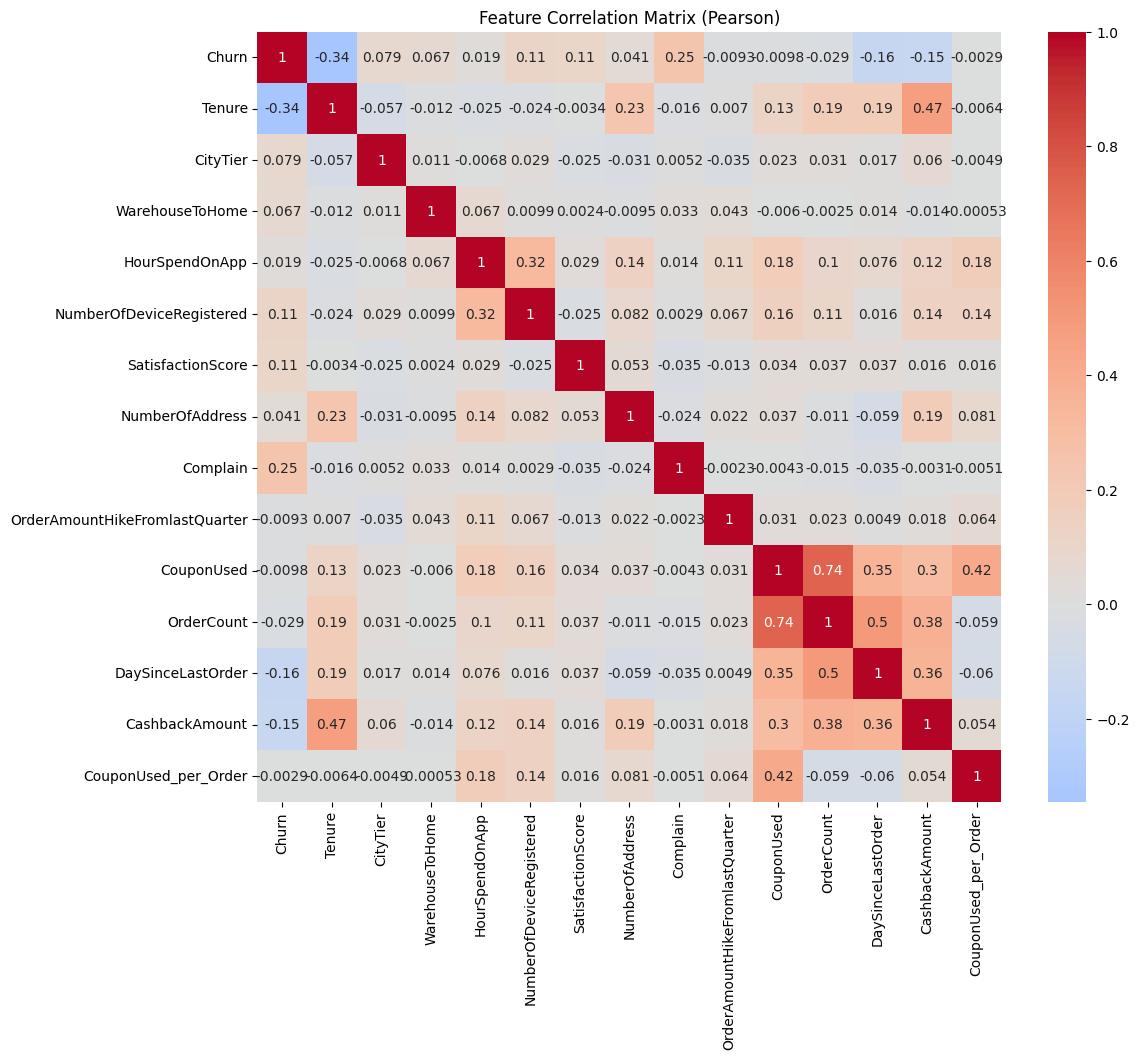

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn[numeric_columns].corr(method='pearson'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Pearson)')
plt.show()

## 3. Probability Analysis & Risk Assessment

In [46]:
cat_columns = list(set(dfsn.columns) - set(numeric_columns))

for col in cat_columns:
    print(f"Unique values for {col}: {dfsn[col].unique()}") 

print(cat_columns)
print(numeric_columns)

Unique values for MaritalStatus: ['Single' 'Divorced' 'Married']
Unique values for PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values for Gender: ['Female' 'Male']
Unique values for OrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values for PaymentMode: ['Debit Card' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
['MaritalStatus', 'PreferredLoginDevice', 'Gender', 'OrderCat', 'PaymentMode']
['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastQuarter', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CouponUsed_per_Order']


#### 3.1 Confidence Interval for Overall Churn Rate

In [47]:
# Calculate churn rate statistics
churned = dfsn[dfsn['Churn'] == 1]
n_churned = len(churned)
n_total = len(dfsn)
p_churn = n_churned / n_total

# Calculate 95% CI for proportion
confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level)/2)
se = np.sqrt(p_churn * (1 - p_churn) / n_total)

ci_lower = p_churn - z_critical * se
ci_upper = p_churn + z_critical * se

print(f"Churn Rate: {p_churn:.2%}")
print(f"95% Confidence Interval: ({ci_lower:.2%}, {ci_upper:.2%})")

Churn Rate: 16.80%
95% Confidence Interval: (15.78%, 17.81%)


##### 3.2.1 Visualization: Churn Rate with CI

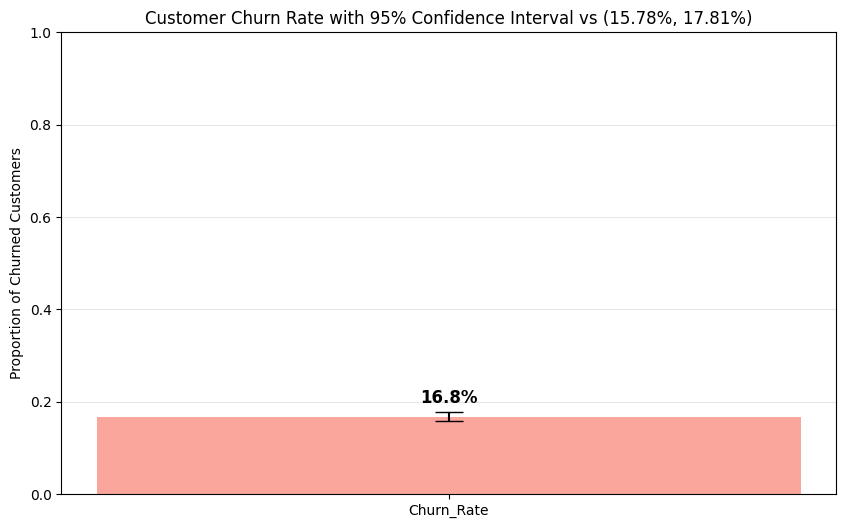

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(['Churn_Rate'], [p_churn], yerr=[[p_churn - ci_lower], [ci_upper - p_churn]],
               capsize=10, color='salmon', alpha=0.7)

# Add percentage text on top of the bar
plt.text(bars[0].get_x() + bars[0].get_width()/2, 
         ci_upper + 0.01,
         f'{p_churn*100:.1f}%', 
         ha='center', 
         va='bottom', 
         fontsize=12, 
         fontweight='bold')

plt.title(f'Customer Churn Rate with 95% Confidence Interval vs ({ci_lower:.2%}, {ci_upper:.2%})')
plt.ylim(0, 1)
plt.ylabel('Proportion of Churned Customers')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 3.2.2 Confidence Interval for Complain

In [49]:
# Function to calculate confidence interval
def calculate_ci(group_data):
    n = len(group_data)
    mean = group_data.mean()
    se = stats.sem(group_data)
    ci = stats.t.interval(0.95, n-1, loc=mean, scale=se)
    return mean, ci[0], ci[1]

In [50]:
def plot_ci(cat_col, target_col, df, ci_lower, ci_upper):
    # OrderCat Confidence Intervals
    cat_ci_data = dfsn.groupby(cat_col)[target_col].apply(calculate_ci).apply(pd.Series)
    cat_ci_data.columns = ['mean', 'ci_lower', 'ci_upper']
    cat_ci_data['yerr'] = cat_ci_data['mean'] - cat_ci_data['ci_lower']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(cat_ci_data)), cat_ci_data['mean'], yerr=cat_ci_data['yerr'], 
                   capsize=10, alpha=0.7, color='skyblue')
    plt.xticks(range(len(cat_ci_data)), cat_ci_data.index)
    plt.ylabel(f'{target_col} Rate')
    plt.title(f'{target_col} Rate by {cat_col} with 95% CI vs ({ci_lower:.2%}, {ci_upper:.2%})')
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + cat_ci_data['yerr'].iloc[i] + 0.01, 
                 f'{cat_ci_data["mean"].iloc[i]:.3f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

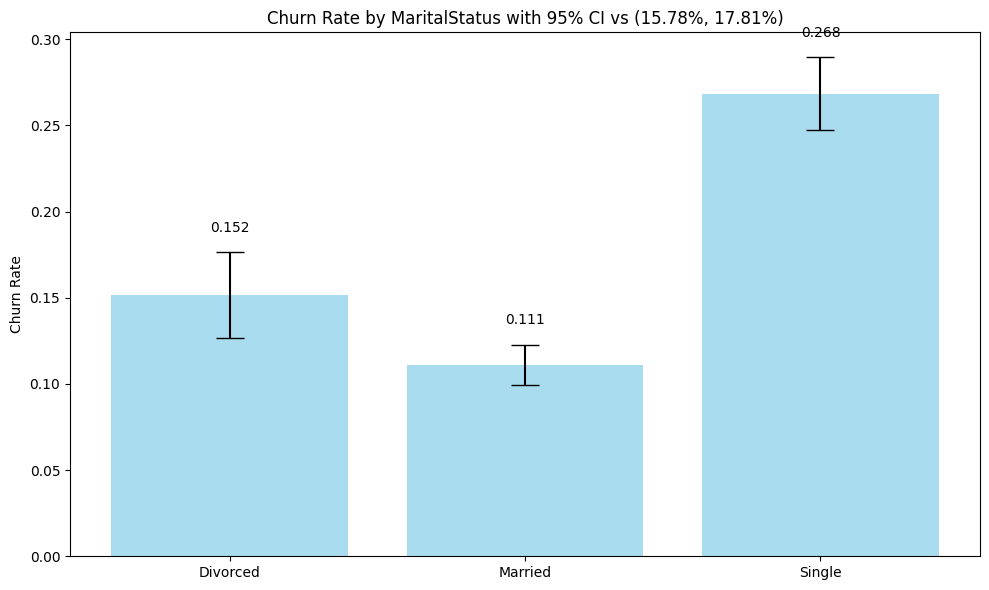

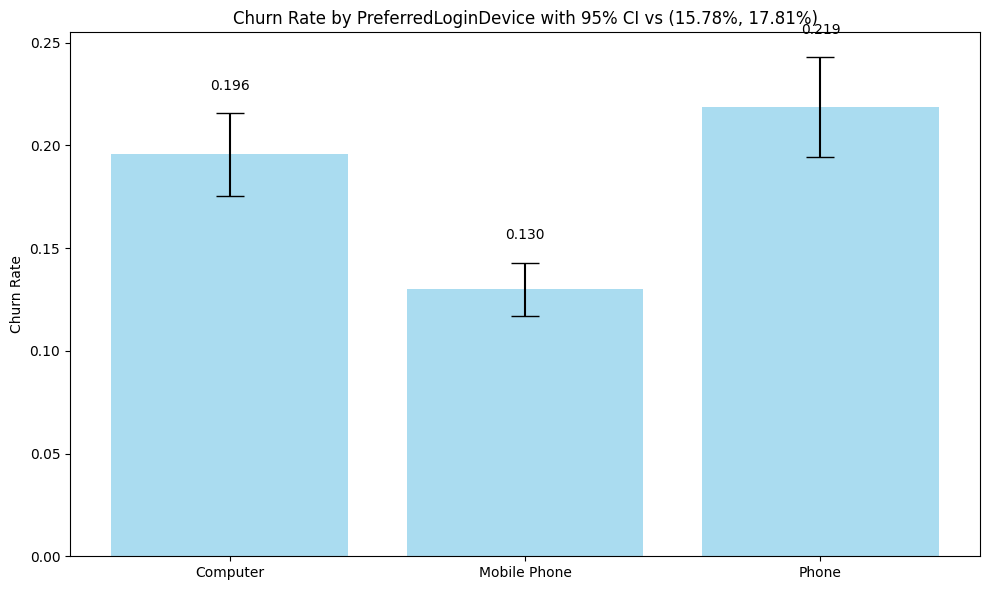

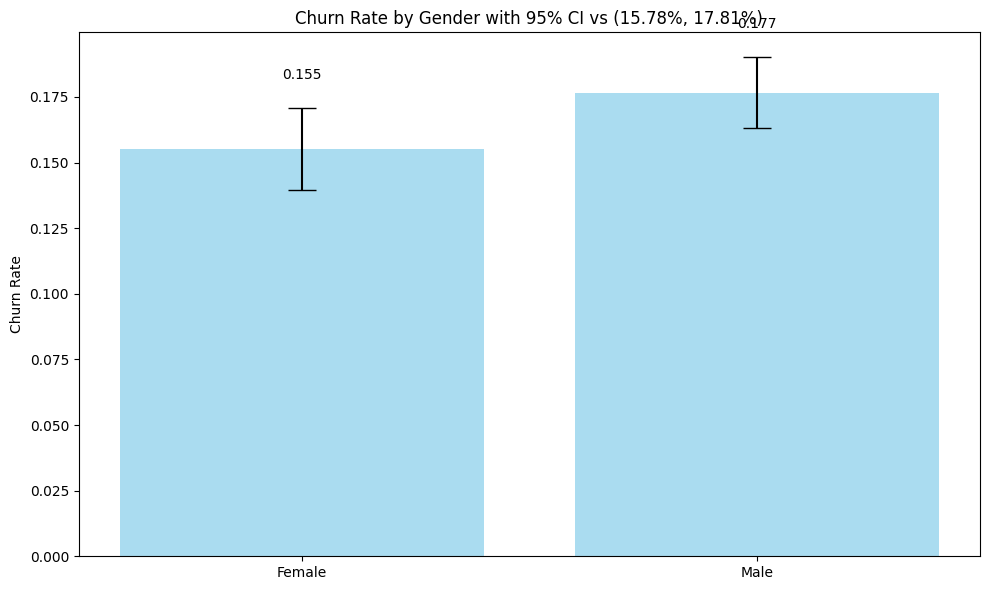

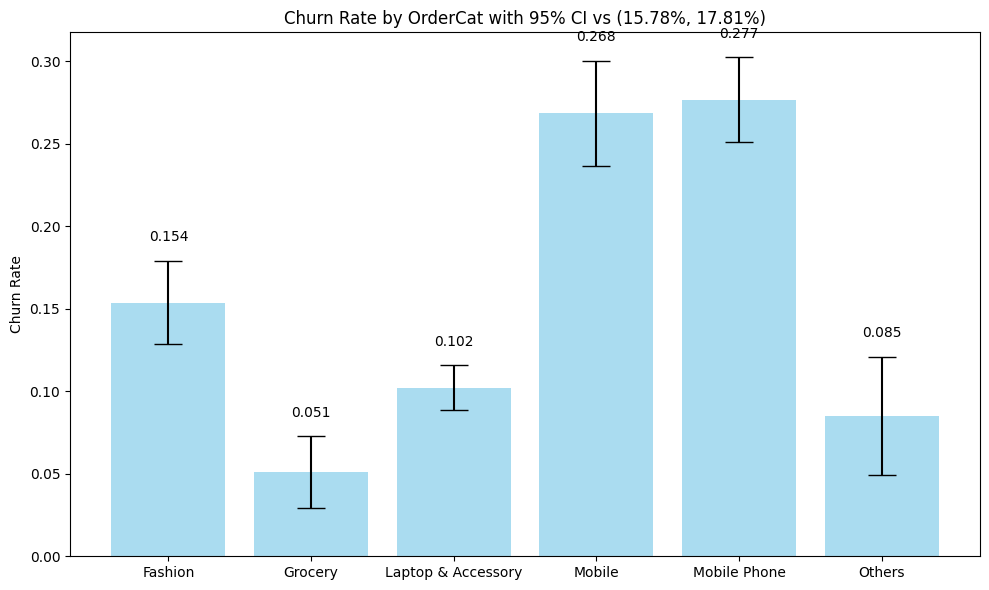

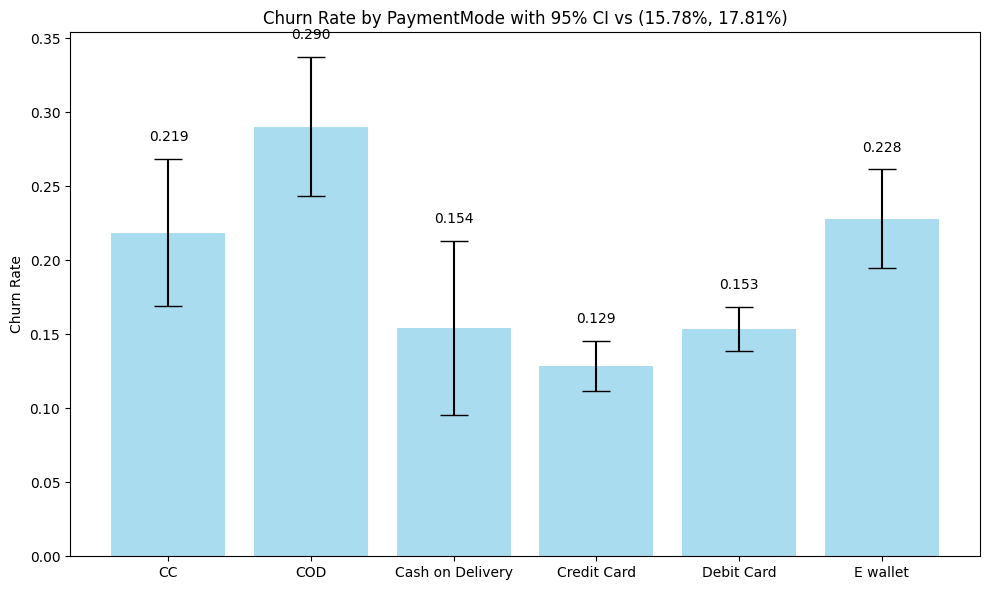

In [51]:
for cat_col in cat_columns :
    plot_ci(cat_col, 'Churn', dfsn, ci_lower, ci_upper)

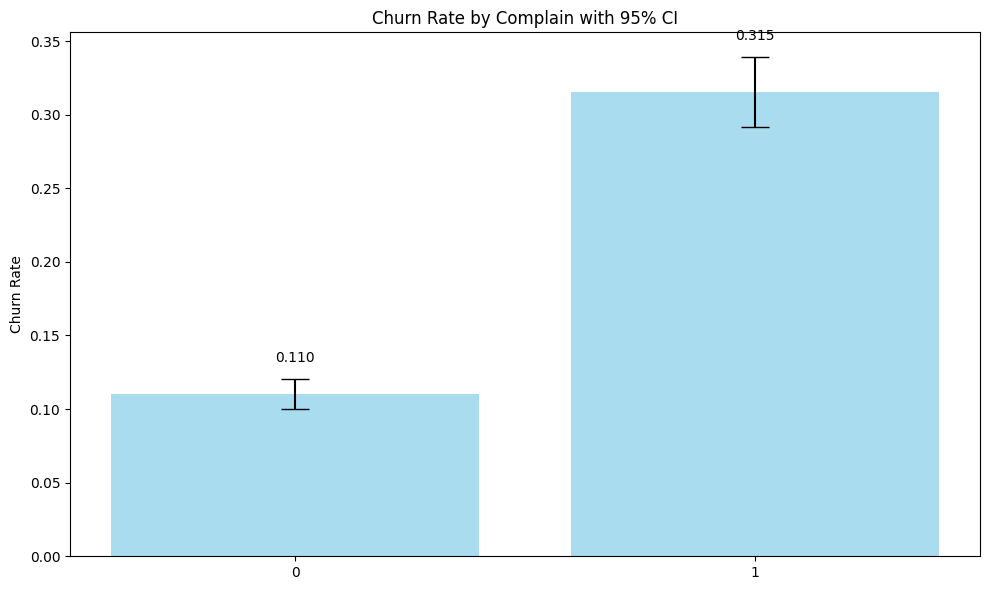

In [52]:
# Complain Confidence Intervals
complain_ci_data = dfsn.groupby('Complain')['Churn'].apply(calculate_ci).apply(pd.Series)
complain_ci_data.columns = ['mean', 'ci_lower', 'ci_upper']
complain_ci_data['yerr'] = complain_ci_data['mean'] - complain_ci_data['ci_lower']

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(complain_ci_data)), complain_ci_data['mean'], yerr=complain_ci_data['yerr'], 
               capsize=10, alpha=0.7, color='skyblue')
plt.xticks(range(len(complain_ci_data)), complain_ci_data.index)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complain with 95% CI')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + complain_ci_data['yerr'].iloc[i] + 0.01, 
             f'{complain_ci_data["mean"].iloc[i]:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Hypothesis Testing & Statistical Inference

In [53]:
def plot_split(source_col, target_col, df):
    # Split data
    churned = df[df[target_col] == 1][source_col]
    retained = df[df[target_col] == 0][source_col]
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.distplot(churned, label='Churned', color='red')
    sns.distplot(retained, label='Retained', color='green')
    plt.title(f'{source_col} Distribution by Churn Status')
    plt.xlabel(source_col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Perform Welch's t-test (doesn't assume equal variances)
    t_stat, p_value = stats.ttest_ind(churned, retained, equal_var=False)
    print(f"T-test Results:\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.4f}")
    

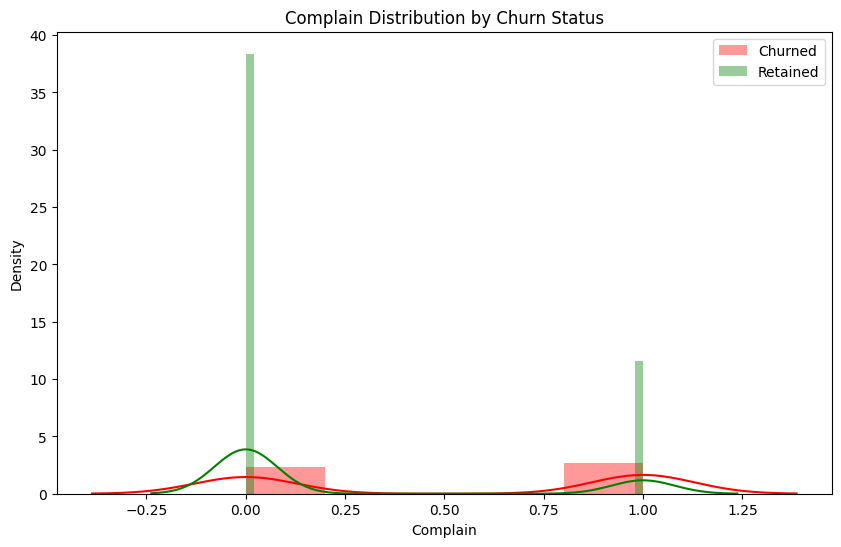

T-test Results:
T-statistic: 16.45
P-value: 0.0000


In [54]:
plot_split('Complain', 'Churn', dfsn)

In [55]:
def plot_chi_square(source_col, target_col, df):
    # Chi-Square Test: Subscription Type vs Churn
    # **Hypothesis**:
    # - H₀: Churn is independent of subscription type
    # - H₁: Association exists between subscription type and churn
    
    # Create contingency table
    contingency_table = pd.crosstab(df[source_col], df[target_col])
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=source_col, y=target_col, data=df, ci=None)
    plt.title(f'{target_col} Rates by {source_col}')
    plt.ylabel('Churn Probability')
    plt.show()

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square Results:\nChi2-stat: {chi2:.2f}\nP-value: {p:.4f}")

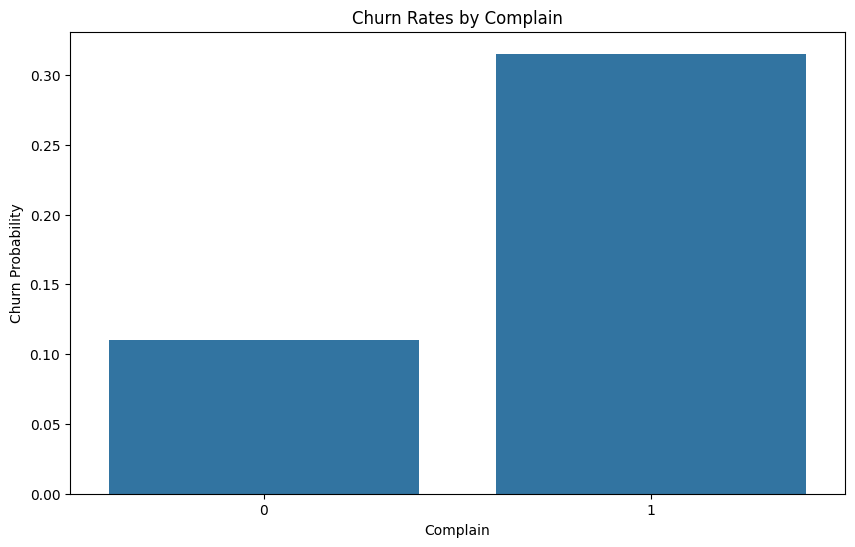


Chi-square Results:
Chi2-stat: 315.88
P-value: 0.0000


In [56]:
plot_chi_square('Complain', 'Churn', dfsn)

In [57]:
def plot_anova(source_col, target_col, df):
    # ANOVA: Total Spend by source_col
    # **Hypothesis**:
    # - H₀: All source_col have equal mean target_col
    # - H₁: At least one source_col differs in mean target_col
    
    # Prepare data groups
    groups = [group[1][source_col] for group in df.groupby(source_col)]
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=target_col, y=source_col, data=df)
    plt.title(f'{source_col} Distribution by {target_col}')
    plt.show()

    # Im using One-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA Results:\nF-statistic: {f_stat:.2f}\nP-value: {p_value:.4f}")

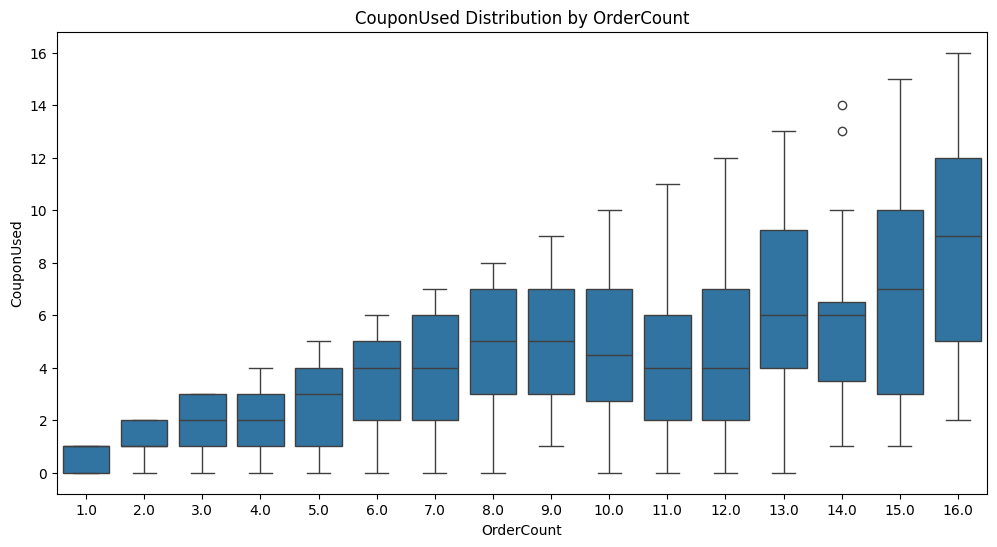

ANOVA Results:
F-statistic: inf
P-value: 0.0000


In [58]:
plot_anova('CouponUsed', 'OrderCount',dfsn)

## 5. Regression & Correlation Analysis

#### 5.1 Correlation Analysis

In [59]:
# First encode categorical variables for correlation analysis
categorical_cols = list(set(dfsn.columns) - set(numeric_columns))
dfsn_encoded = dfsn.copy()

print(f'Categorical columns: {categorical_cols}')
for col in categorical_cols:
    le = LabelEncoder()
    dfsn_encoded[col] = le.fit_transform(dfsn_encoded[col])

# Calculate correlations with target
correlations = dfsn_encoded.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelations with target (Churn):")
print(correlations)

Categorical columns: ['MaritalStatus', 'PreferredLoginDevice', 'Gender', 'OrderCat', 'PaymentMode']

Correlations with target (Churn):
Churn                             1.000000
Complain                          0.246966
MaritalStatus                     0.139831
OrderCat                          0.122540
NumberOfDeviceRegistered          0.112618
SatisfactionScore                 0.110816
CityTier                          0.078697
WarehouseToHome                   0.066850
NumberOfAddress                   0.040630
Gender                            0.028208
HourSpendOnApp                    0.019103
PreferredLoginDevice              0.010936
CouponUsed_per_Order             -0.002919
OrderAmountHikeFromlastQuarter   -0.009274
CouponUsed                       -0.009778
OrderCount                       -0.029462
PaymentMode                      -0.035820
CashbackAmount                   -0.148098
DaySinceLastOrder                -0.156071
Tenure                           -0.344895
Name:

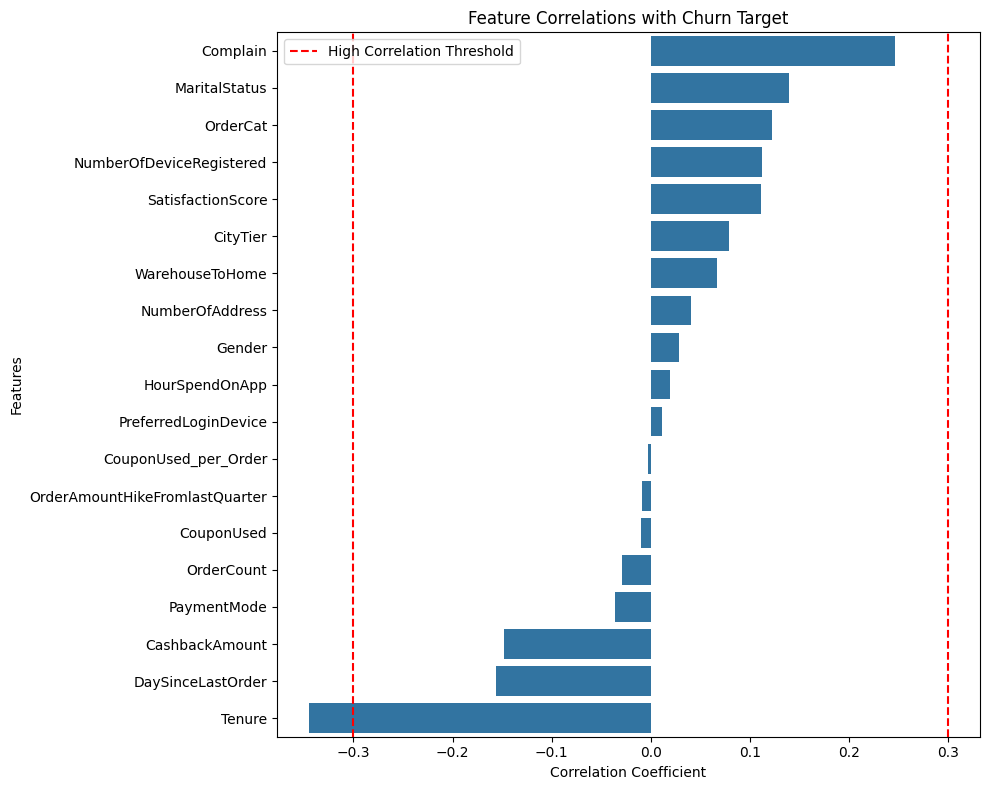

In [60]:
# visualize the correlations
plt.figure(figsize=(10, 8))
correlations_df = pd.DataFrame(correlations[1:])
correlations_df.columns = ['Correlation with Churn']
sns.barplot(data=correlations_df.reset_index(), x='Correlation with Churn', y='index')
plt.title('Feature Correlations with Churn Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0.3, color='r', linestyle='--', label='High Correlation Threshold')
plt.axvline(x=-0.3, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### Feature selection for ML

In [61]:
corr_dict = correlations.to_dict()

# filter our low correlation feature, keep features with corr>=0.05 and corr<=0.7
cols_tokeep=[]
for k in corr_dict:
    if (abs(corr_dict[k])>=0.05) and (abs(corr_dict[k])<=0.7):
        cols_tokeep.append(k)

print(cols_tokeep)

['Complain', 'MaritalStatus', 'OrderCat', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'CityTier', 'WarehouseToHome', 'CashbackAmount', 'DaySinceLastOrder', 'Tenure']


In [62]:
features_touse = cols_tokeep

In [63]:
dfsn_encoded_v = dfsn_encoded.dropna()

In [64]:
dfsn_encoded_v.shape

(3480, 20)

In [65]:
X = dfsn_encoded_v[features_touse]
y = dfsn_encoded_v['Churn']

# Create train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")


Dataset shapes:
X_train: (2784, 10)
X_val: (696, 10)


### Model Training

#### i. Logistic Regression with Cross-validation

In [66]:
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(
        C=0.1, 
        class_weight='balanced',
        max_iter=300,
        random_state=42
    ))
])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_validate(
    lr_pipeline, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {lr_cv_scores['test_accuracy'].mean():.4f} (+/- {lr_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {lr_cv_scores['test_roc_auc'].mean():.4f} (+/- {lr_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {lr_cv_scores['test_average_precision'].mean():.4f} (+/- {lr_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.7608 (+/- 0.0119)
ROC AUC: 0.8491 (+/- 0.0253)
Average Precision: 0.6492 (+/- 0.0452)


#### ii. Random Forest with Cross-Validation

In [67]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=50,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

# Perform cross-validation
rf_cv_scores = cross_validate(
    rf_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {rf_cv_scores['test_accuracy'].mean():.4f} (+/- {rf_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {rf_cv_scores['test_roc_auc'].mean():.4f} (+/- {rf_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {rf_cv_scores['test_average_precision'].mean():.4f} (+/- {rf_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.8344 (+/- 0.0142)
ROC AUC: 0.8969 (+/- 0.0255)
Average Precision: 0.7028 (+/- 0.0425)


#### iii. XGBoost with Cross-Validation

In [68]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    random_state=42,
    eval_metric='logloss'
)

# Perform cross-validation
xgb_cv_scores = cross_validate(
    xgb_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {xgb_cv_scores['test_accuracy'].mean():.4f} (+/- {xgb_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {xgb_cv_scores['test_roc_auc'].mean():.4f} (+/- {xgb_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {xgb_cv_scores['test_average_precision'].mean():.4f} (+/- {xgb_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.9080 (+/- 0.0097)
ROC AUC: 0.9498 (+/- 0.0173)
Average Precision: 0.8137 (+/- 0.0383)


### Model Evaluation

#### i. Logistic Regression Evaluation

In [69]:
# Train and evaluate
lr_pipeline.fit(X_train, y_train)
lr_val_pred = lr_pipeline.predict(X_val)
lr_val_pred_proba = lr_pipeline.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, lr_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, lr_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, lr_val_pred))


Validation Performance:
Accuracy Score: 0.7716
ROC AUC Score: 0.8735

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       580
           1       0.41      0.84      0.55       116

    accuracy                           0.77       696
   macro avg       0.69      0.80      0.70       696
weighted avg       0.87      0.77      0.80       696



#### ii. Random forest Evaluation

In [70]:
# Train and evaluate
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_val)
rf_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, rf_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, rf_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, rf_val_pred))


Validation Performance:
Accuracy Score: 0.8420
ROC AUC Score: 0.9146

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       580
           1       0.52      0.84      0.64       116

    accuracy                           0.84       696
   macro avg       0.74      0.84      0.77       696
weighted avg       0.89      0.84      0.86       696



#### iii. XGBoost Evaluation

In [71]:
# Train and evaluate
xgb_model.fit(X_train, y_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, xgb_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, xgb_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, xgb_val_pred))


Validation Performance:
Accuracy Score: 0.8894
ROC AUC Score: 0.9536

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       580
           1       0.62      0.90      0.73       116

    accuracy                           0.89       696
   macro avg       0.80      0.89      0.83       696
weighted avg       0.92      0.89      0.90       696



### Confusion Matrix and AUC Curve

#### i. Logistic Regression confusion matrix

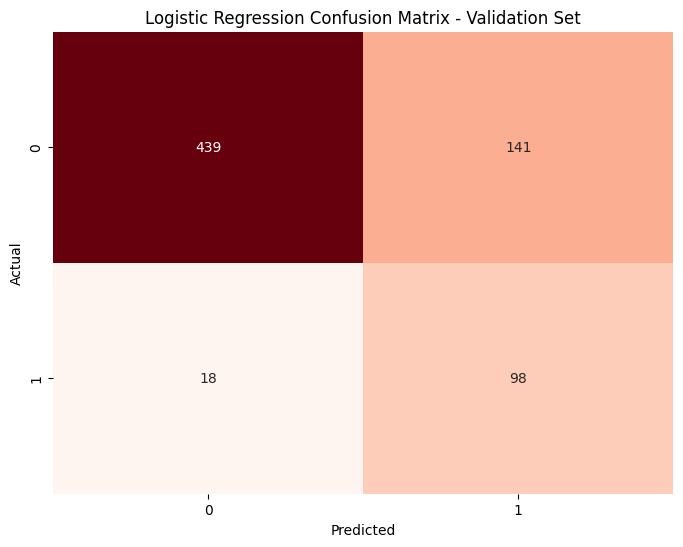

In [72]:
# Logistic Regression confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_val = confusion_matrix(y_val, lr_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Logistic Regression Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

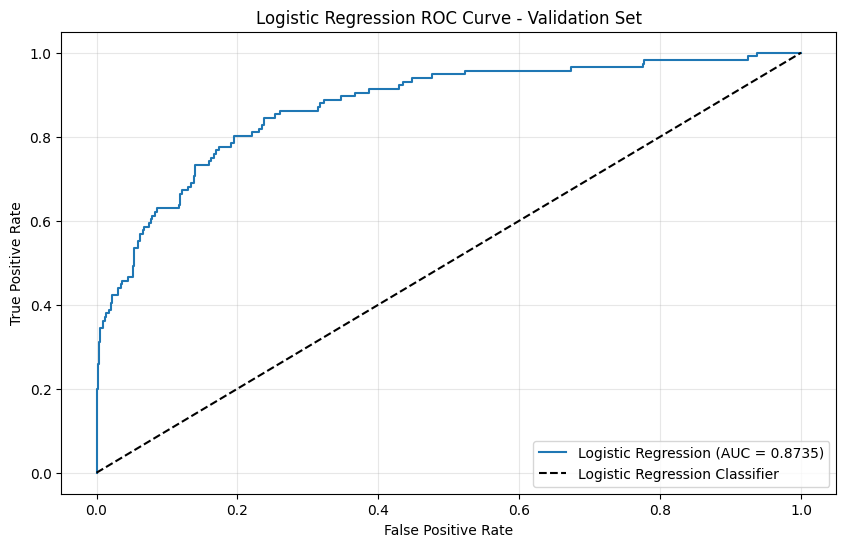

In [73]:
# ROC curve plot for Logistic Regression - Validation set
plt.figure(figsize=(10, 6))
fpr_lr_val, tpr_lr_val, _ = roc_curve(y_val, lr_val_pred_proba)
plt.plot(fpr_lr_val, tpr_lr_val, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, lr_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### ii. Random Forest Evaluation confusion matrix

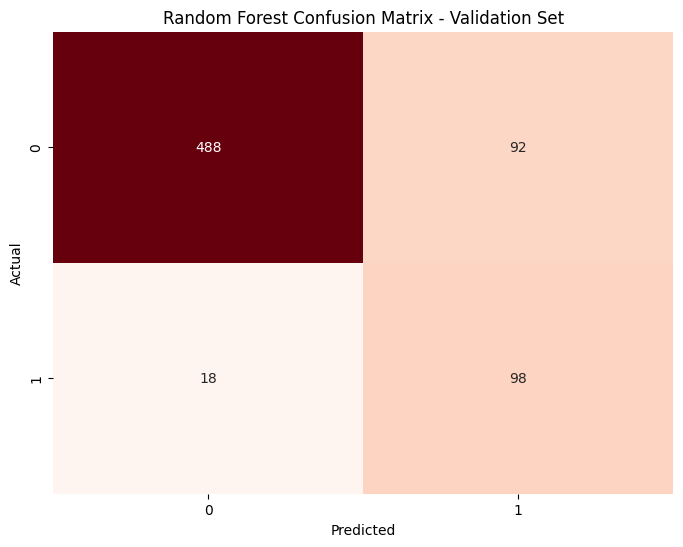

In [74]:
# Random Forest Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_rf_val = confusion_matrix(y_val, rf_val_pred)
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

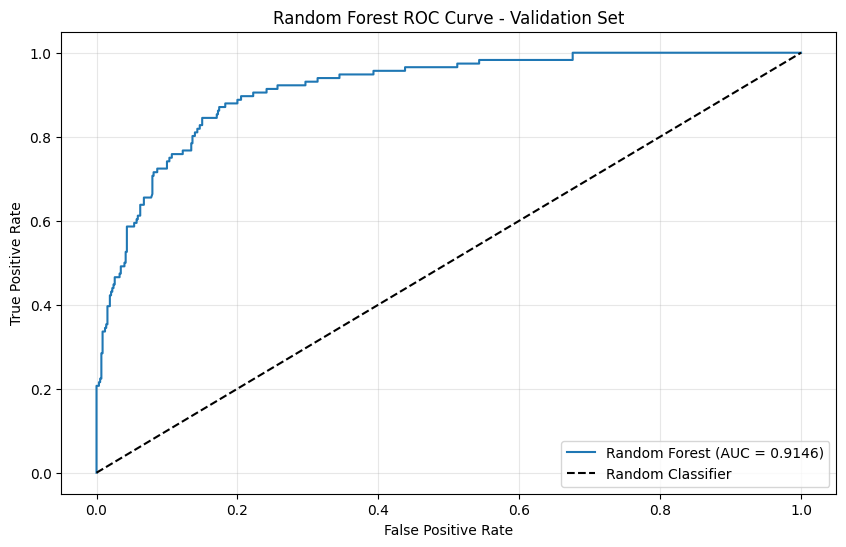

In [75]:
# ROC curve plot for Random Forest - Validation set
plt.figure(figsize=(10, 6))
fpr_rf_val, tpr_rf_val, _ = roc_curve(y_val, rf_val_pred_proba)
plt.plot(fpr_rf_val, tpr_rf_val, label=f'Random Forest (AUC = {roc_auc_score(y_val, rf_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### iii. XGboost Evaluation confusion matrix

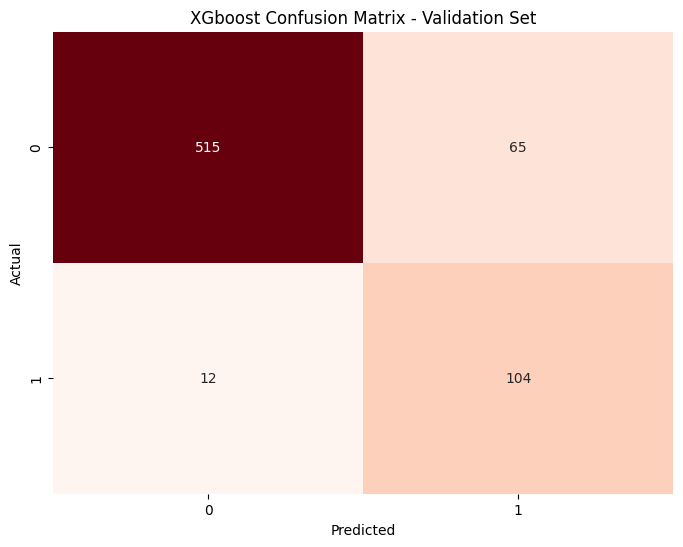

In [76]:
# XGboost Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_xgb_val = confusion_matrix(y_val, xgb_val_pred)
sns.heatmap(cm_xgb_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('XGboost Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

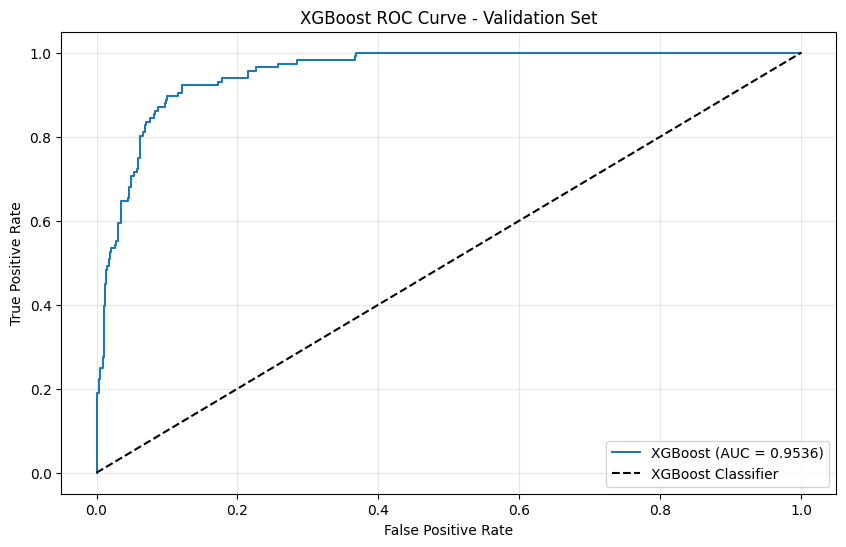

In [77]:
# ROC curve plot for XGBoost - Validation set
plt.figure(figsize=(10, 6))
fpr_xgb_val, tpr_xgb_val, _ = roc_curve(y_val, xgb_val_pred_proba)
plt.plot(fpr_xgb_val, tpr_xgb_val, label=f'XGBoost (AUC = {roc_auc_score(y_val, xgb_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance Analysis

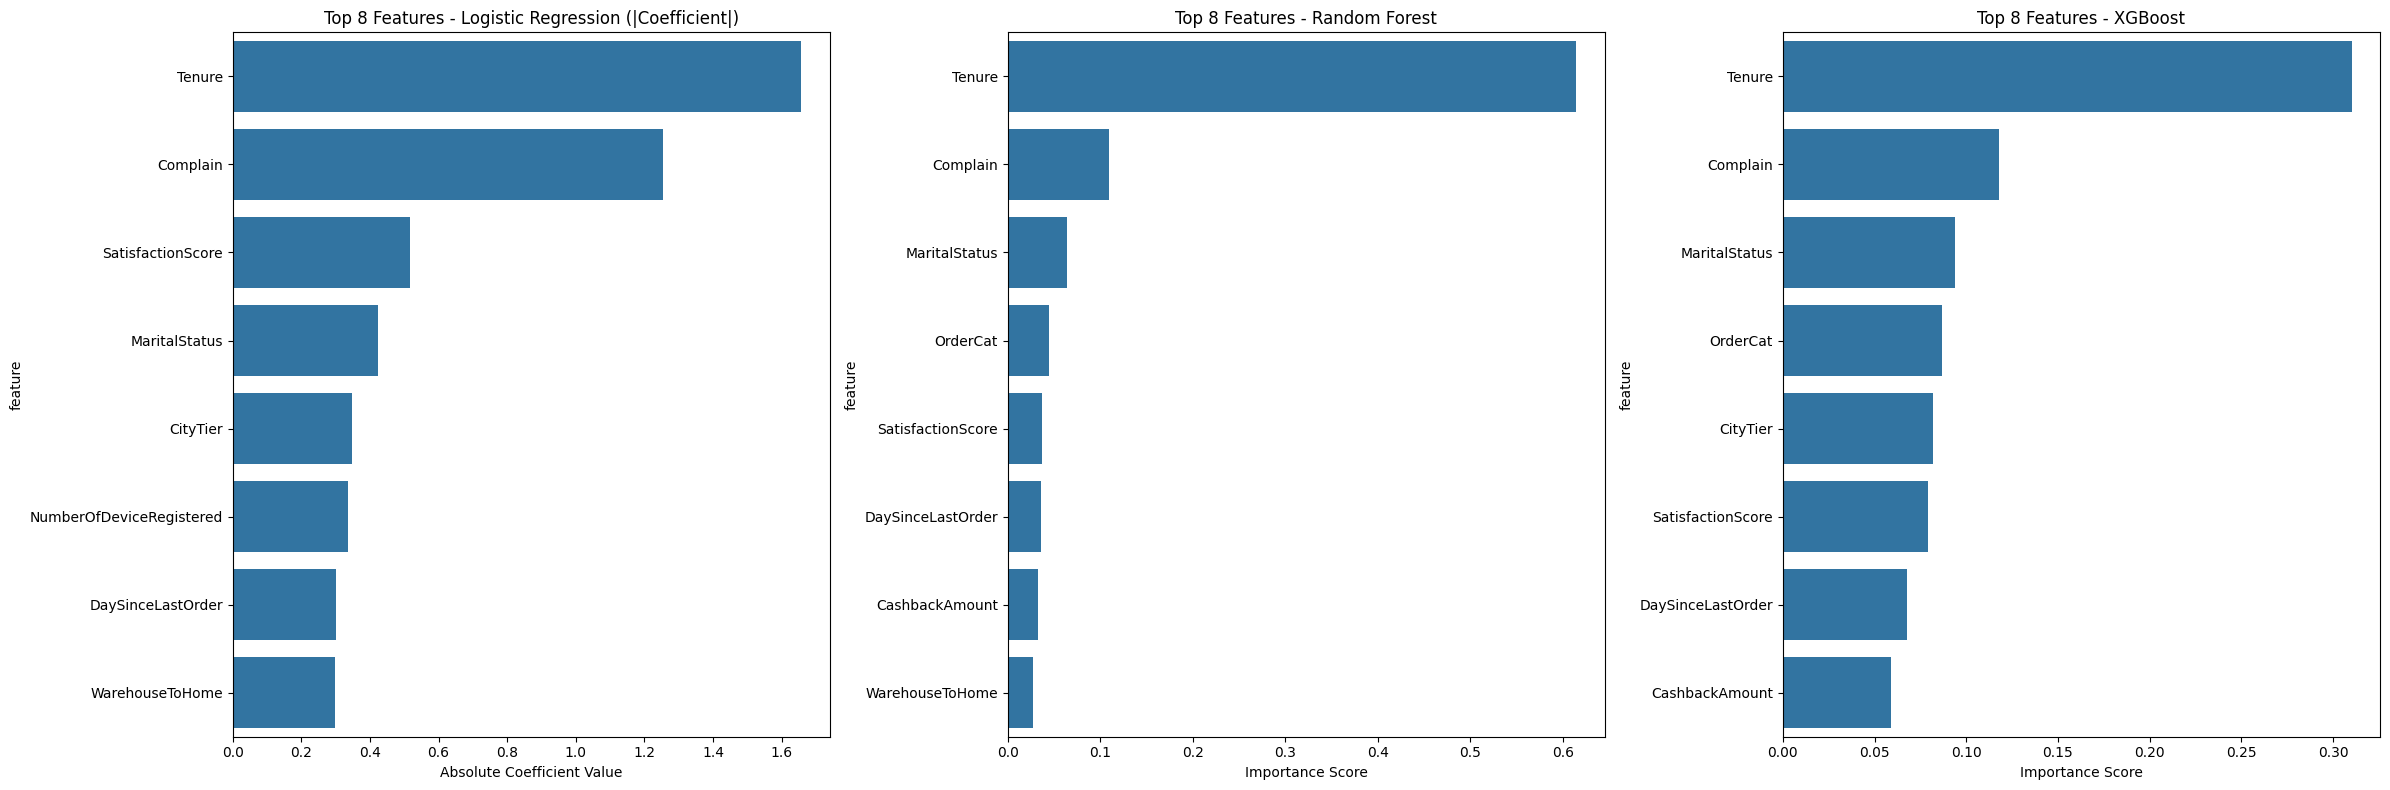

In [78]:
# Get feature importance for all models
feature_importance_rf = pd.DataFrame({
    'feature': features_touse,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance_xgb = pd.DataFrame({
    'feature': features_touse,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# For Logistic Regression, I use absolute coefficients as importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]
feature_importance_lr = pd.DataFrame({
    'feature': features_touse,
    'importance': np.abs(lr_coefficients),
    'coefficient': lr_coefficients
}).sort_values('importance', ascending=False)

# Plot feature importance for all three models
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Logistic Regression
sns.barplot(data=feature_importance_lr.head(8), x='importance', y='feature', ax=axes[0])
axes[0].set_title('Top 8 Features - Logistic Regression (|Coefficient|)')
axes[0].set_xlabel('Absolute Coefficient Value')

# Random Forest
sns.barplot(data=feature_importance_rf.head(8), x='importance', y='feature', ax=axes[1])
axes[1].set_title('Top 8 Features - Random Forest')
axes[1].set_xlabel('Importance Score')

# XGBoost
sns.barplot(data=feature_importance_xgb.head(8), x='importance', y='feature', ax=axes[2])
axes[2].set_title('Top 8 Features - XGBoost')
axes[2].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

In [79]:
# Print top features for all models
print("\nTop Features (Logistic Regression):")
print(feature_importance_lr[['feature', 'importance', 'coefficient']].head(10))

print("\nTop Features (Random Forest):")
print(feature_importance_rf.head(10))

print("\nTop Features (XGBoost):")
print(feature_importance_xgb.head(10))


Top Features (Logistic Regression):
                    feature  importance  coefficient
9                    Tenure    1.657707    -1.657707
0                  Complain    1.253292     1.253292
4         SatisfactionScore    0.517614     0.517614
1             MaritalStatus    0.423584     0.423584
5                  CityTier    0.349281     0.349281
3  NumberOfDeviceRegistered    0.336007     0.336007
8         DaySinceLastOrder    0.300744    -0.300744
6           WarehouseToHome    0.298838     0.298838
7            CashbackAmount    0.248960     0.248960
2                  OrderCat    0.110501     0.110501

Top Features (Random Forest):
                    feature  importance
9                    Tenure    0.614896
0                  Complain    0.109561
1             MaritalStatus    0.063596
2                  OrderCat    0.044853
4         SatisfactionScore    0.036887
8         DaySinceLastOrder    0.036396
7            CashbackAmount    0.032893
6           WarehouseToHome  

# More Tenure Analysis & Related Predict Analysis
because Tenure is such a important feature with covariance 0.4, way bigger than other features

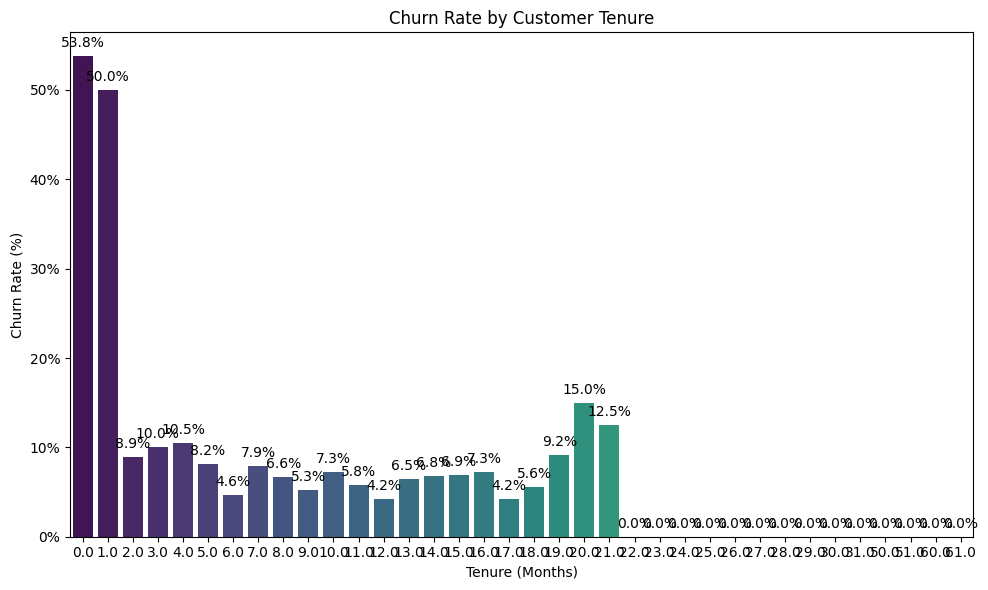

In [80]:
# Create tenure groups for analysis
dfst = dfs.copy()
# dfst['Tenure_Group'] = pd.cut(dfst['Tenure'],
#                           bins=[0, 12, 24, 36, 48, 60],
#                           labels=['0-12', '13-24', '25-36', '37-48', '49-60'])

# Calculate churn rate by tenure group
tenure_churn = dfst.groupby('Tenure')['Churn'].mean().reset_index()
tenure_churn['Churn_Rate'] = tenure_churn['Churn'] * 100

# Bar plot of churn rate by tenure group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tenure', y='Churn_Rate', data=tenure_churn, palette='viridis')
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')

# Add percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

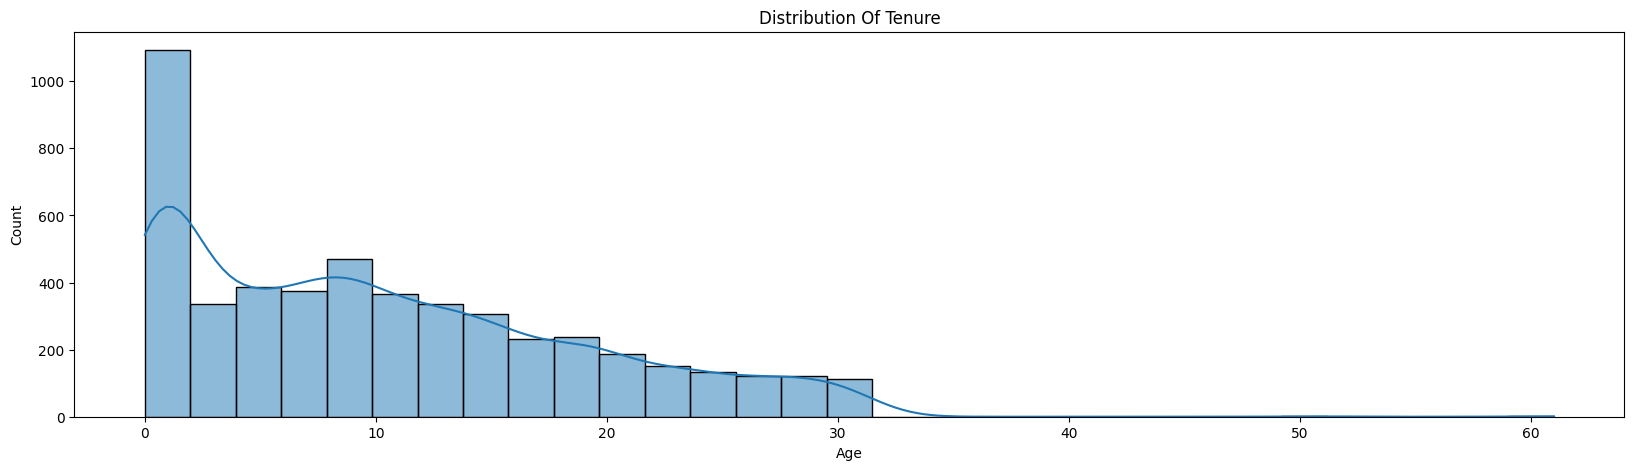

In [81]:
plt.figure(figsize=(20,5))
sns.histplot(dfs['Tenure'], bins=31 ,kde=True)
plt.title('Distribution Of Tenure')
plt.xlabel('Age')
plt.show

##### There are 2 group, with Tenure > 2 and Tenure <= 2. Now we build correlation matrix for each group.

In [82]:
dfsn_t1 = dfsn[dfsn['Tenure']<2]
dfsn_t2 = dfsn[(dfsn['Tenure']>1) & (dfsn['Tenure']<=21)]
print(f"The size of dataset with Tenure<2 is {dfsn_t1.shape},\n The size of dataset with Tenure>=2 is {dfsn_t2.shape}")

The size of dataset with Tenure<2 is (1093, 20),
 The size of dataset with Tenure>=2 is (3232, 20)


In [83]:
print(dfsn_t1.dropna().shape,
dfsn_t2.dropna().shape)

(861, 20) (2349, 20)


In [84]:
dfsn_encoded.shape

(5203, 20)

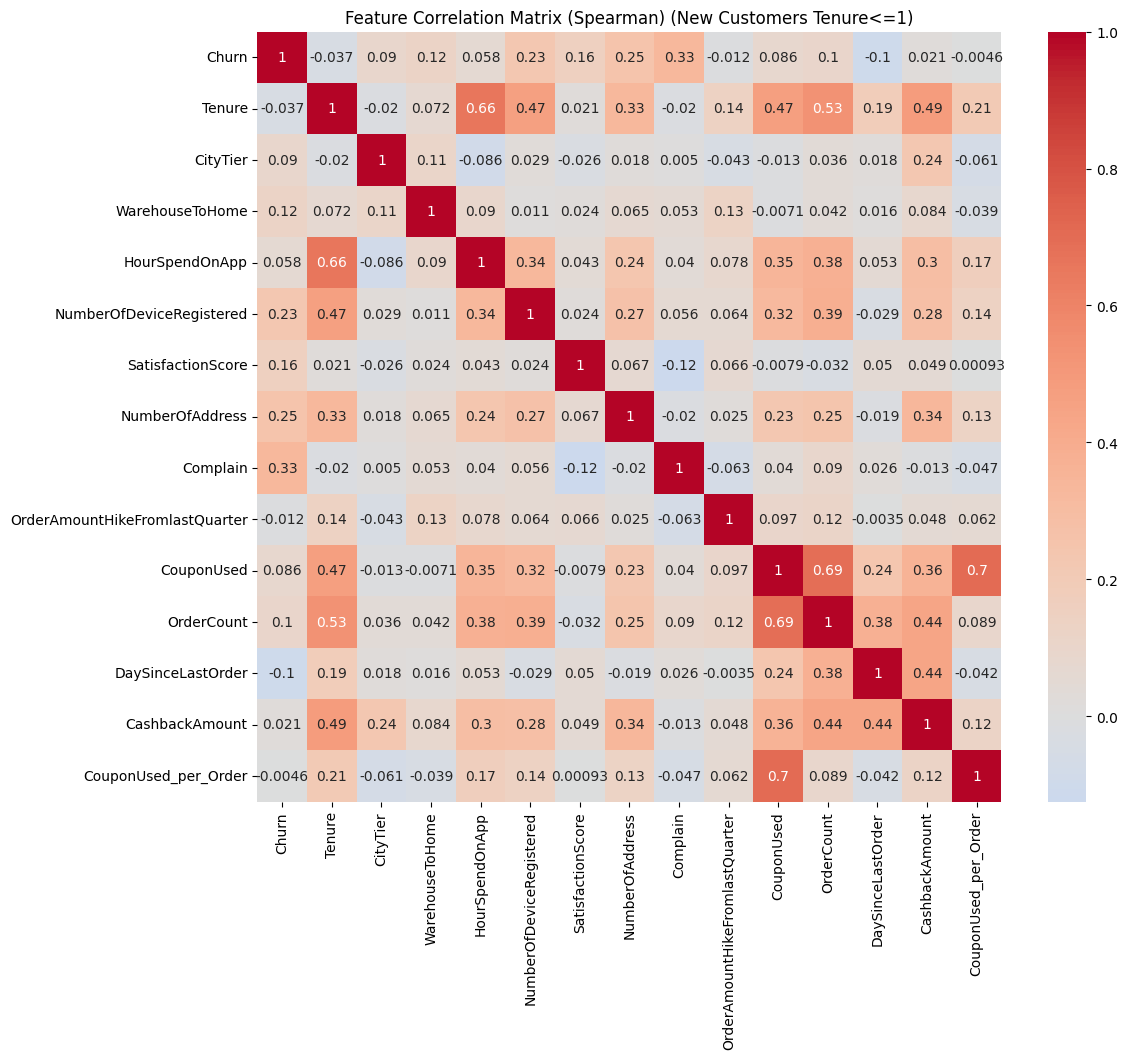

In [85]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn_t1[numeric_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman) (New Customers Tenure<=1)')
plt.show()

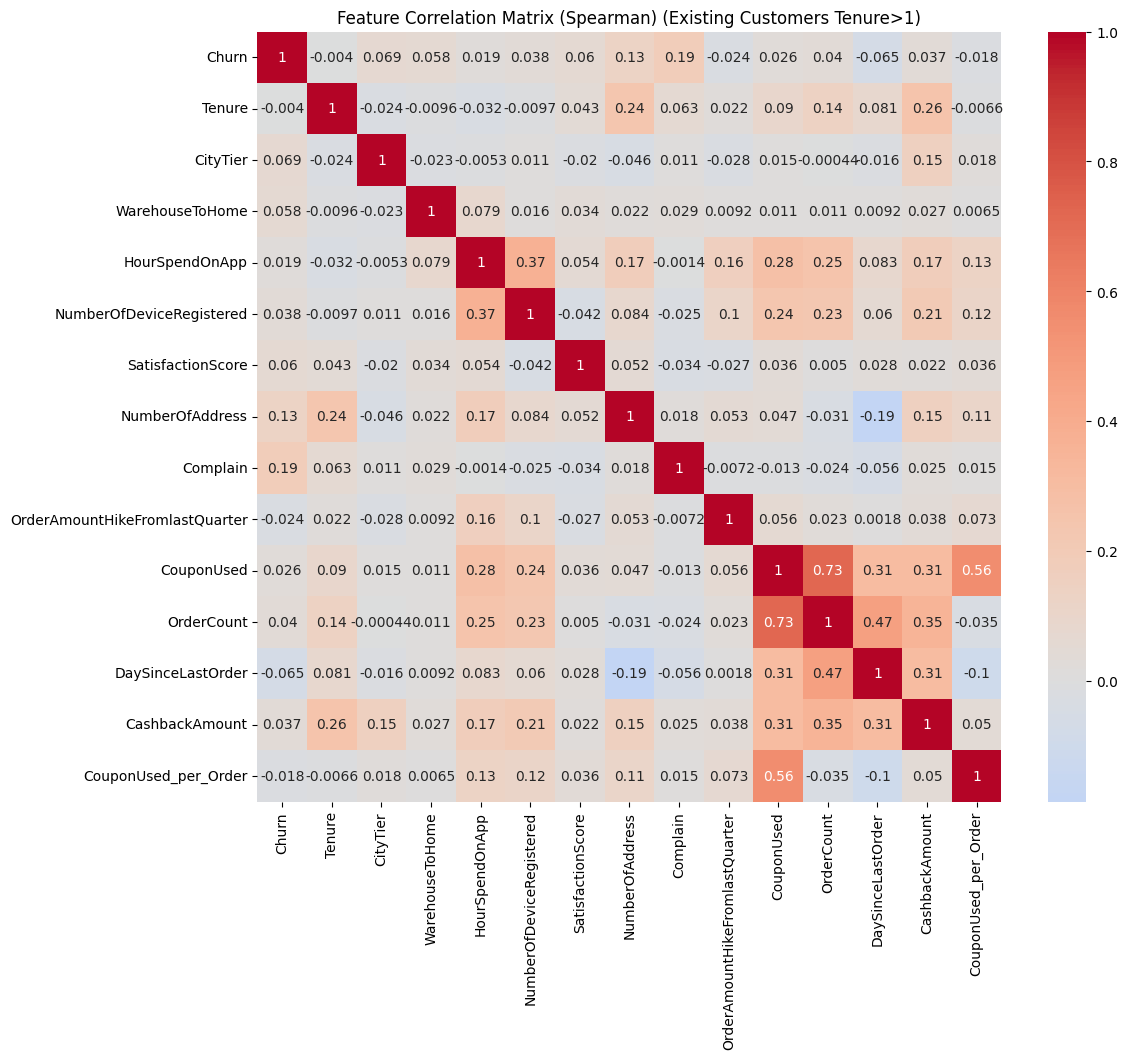

In [86]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn_t2[numeric_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman) (Existing Customers Tenure>1)')
plt.show()

##### The two correlation matrix is very different from each other and from the one for the whole dataset

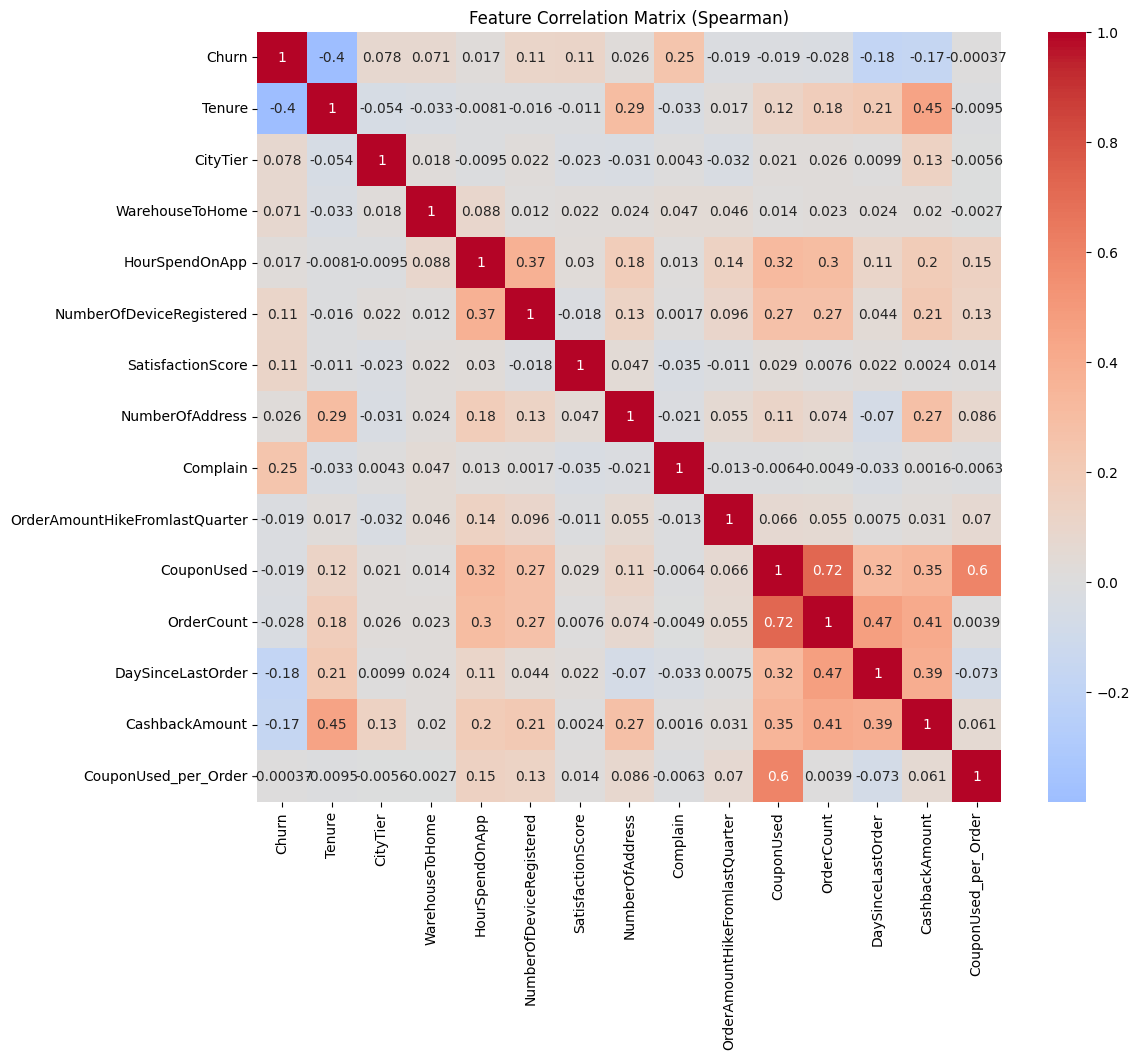

In [87]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfsn[numeric_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

# Predictive Analysis separately for Tenure<=1 set and Tenure>1 set

### 6. Predictive Analysis for Tenure <= 1

#### 6.1 Correlation Analysis

In [88]:
# First encode categorical variables for correlation analysis
categorical_cols = list(set(dfsn_t1.columns) - set(numeric_columns))
dfsn_t1_encoded = dfsn_t1.copy()

print(f'Categorical columns: {categorical_cols}')
for col in categorical_cols:
    le = LabelEncoder()
    dfsn_t1_encoded[col] = le.fit_transform(dfsn_t1_encoded[col])

# Calculate correlations with target
correlations = dfsn_t1_encoded.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelations with target (Churn):")
print(correlations)

Categorical columns: ['MaritalStatus', 'PreferredLoginDevice', 'Gender', 'OrderCat', 'PaymentMode']

Correlations with target (Churn):
Churn                             1.000000
Complain                          0.331733
NumberOfDeviceRegistered          0.241579
NumberOfAddress                   0.236713
SatisfactionScore                 0.157732
MaritalStatus                     0.157424
OrderCount                        0.141543
CouponUsed                        0.108666
WarehouseToHome                   0.107561
CityTier                          0.089299
HourSpendOnApp                    0.057373
CashbackAmount                    0.050496
PaymentMode                       0.006376
CouponUsed_per_Order              0.003209
DaySinceLastOrder                -0.007714
OrderAmountHikeFromlastQuarter   -0.007875
OrderCat                         -0.022568
Tenure                           -0.037233
Gender                           -0.042589
PreferredLoginDevice             -0.100786
Name:

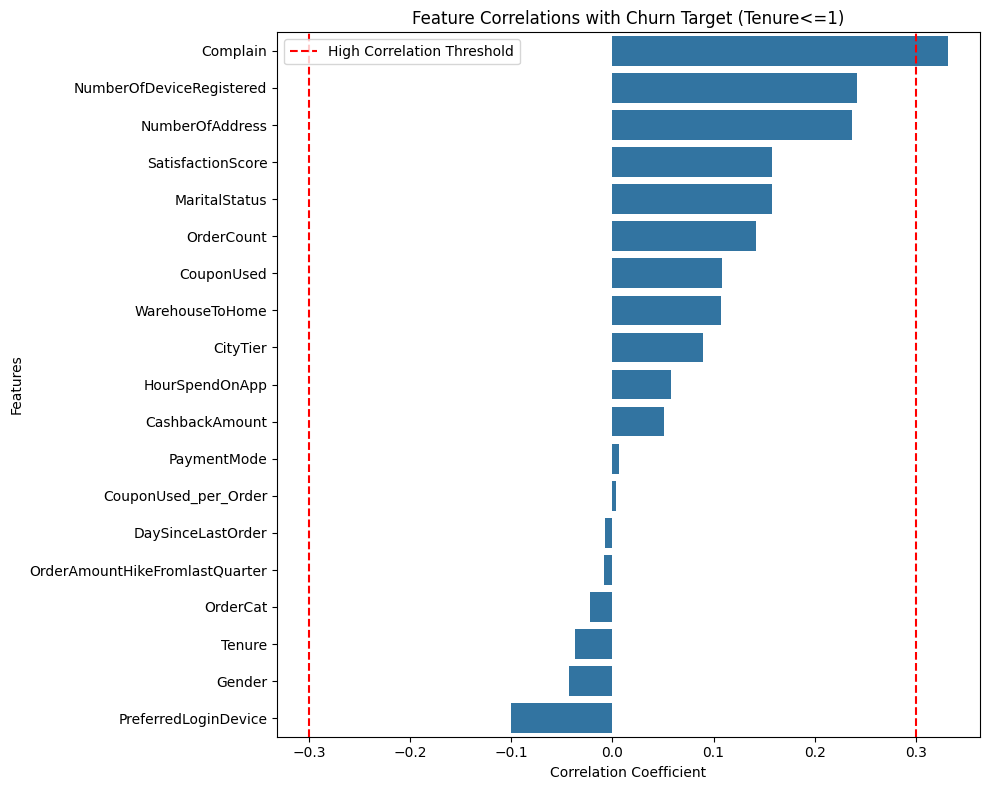

In [89]:
# visualize the correlations
plt.figure(figsize=(10, 8))
correlations_df = pd.DataFrame(correlations[1:])
correlations_df.columns = ['Correlation with Churn']
sns.barplot(data=correlations_df.reset_index(), x='Correlation with Churn', y='index')
plt.title('Feature Correlations with Churn Target (Tenure<=1)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0.3, color='r', linestyle='--', label='High Correlation Threshold')
plt.axvline(x=-0.3, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### 6.2 Feature selection for Tenure <= 1

In [90]:
corr_dict = correlations.to_dict()

# filter our low correlation feature, keep features with corr>=0.05 and corr<=0.7
cols_tokeep=[]
for k in corr_dict:
    if (abs(corr_dict[k])>=0.05) and (abs(corr_dict[k])<=0.7):
        cols_tokeep.append(k)

print(cols_tokeep)

['Complain', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'SatisfactionScore', 'MaritalStatus', 'OrderCount', 'CouponUsed', 'WarehouseToHome', 'CityTier', 'HourSpendOnApp', 'CashbackAmount', 'PreferredLoginDevice']


In [91]:
features_touse = cols_tokeep

In [92]:
dfsn_t1_encoded_v = dfsn_t1_encoded.dropna()

In [93]:
dfsn_t1_encoded_v.shape

(861, 20)

In [94]:
X = dfsn_t1_encoded_v[features_touse]
y = dfsn_t1_encoded_v['Churn']

# Create train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")


Dataset shapes:
X_train: (688, 12)
X_val: (173, 12)


### 6.3 Model Training

#### 6.3.i. Logistic Regression with Cross-validation

In [95]:
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(
        C=0.1, 
        class_weight='balanced',
        max_iter=300,
        random_state=42
    ))
])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_validate(
    lr_pipeline, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {lr_cv_scores['test_accuracy'].mean():.4f} (+/- {lr_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {lr_cv_scores['test_roc_auc'].mean():.4f} (+/- {lr_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {lr_cv_scores['test_average_precision'].mean():.4f} (+/- {lr_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.7398 (+/- 0.0357)
ROC AUC: 0.8173 (+/- 0.0312)
Average Precision: 0.8203 (+/- 0.0399)


#### 6.3.ii. Random Forest with Cross-Validation

In [96]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=50,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

# Perform cross-validation
rf_cv_scores = cross_validate(
    rf_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {rf_cv_scores['test_accuracy'].mean():.4f} (+/- {rf_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {rf_cv_scores['test_roc_auc'].mean():.4f} (+/- {rf_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {rf_cv_scores['test_average_precision'].mean():.4f} (+/- {rf_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.7399 (+/- 0.0373)
ROC AUC: 0.8226 (+/- 0.0347)
Average Precision: 0.8362 (+/- 0.0285)


#### 6.3.iii. XGBoost with Cross-Validation

In [97]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    random_state=42,
    eval_metric='logloss'
)

# Perform cross-validation
xgb_cv_scores = cross_validate(
    xgb_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {xgb_cv_scores['test_accuracy'].mean():.4f} (+/- {xgb_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {xgb_cv_scores['test_roc_auc'].mean():.4f} (+/- {xgb_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {xgb_cv_scores['test_average_precision'].mean():.4f} (+/- {xgb_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.8343 (+/- 0.0248)
ROC AUC: 0.9103 (+/- 0.0184)
Average Precision: 0.9164 (+/- 0.0204)


### 6.4 Model Evaluation

#### 6.4.i. Logistic Regression Evaluation

In [98]:
# Train and evaluate
lr_pipeline.fit(X_train, y_train)
lr_val_pred = lr_pipeline.predict(X_val)
lr_val_pred_proba = lr_pipeline.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, lr_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, lr_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, lr_val_pred))


Validation Performance:
Accuracy Score: 0.6936
ROC AUC Score: 0.7717

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        85
           1       0.72      0.66      0.69        88

    accuracy                           0.69       173
   macro avg       0.69      0.69      0.69       173
weighted avg       0.70      0.69      0.69       173



#### 6.4.ii. Random forest Evaluation

In [99]:
# Train and evaluate
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_val)
rf_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, rf_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, rf_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, rf_val_pred))


Validation Performance:
Accuracy Score: 0.7168
ROC AUC Score: 0.7854

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        85
           1       0.72      0.73      0.72        88

    accuracy                           0.72       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.72      0.72      0.72       173



#### 6.4.iii. XGBoost Evaluation

In [100]:
# Train and evaluate
xgb_model.fit(X_train, y_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, xgb_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, xgb_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, xgb_val_pred))


Validation Performance:
Accuracy Score: 0.8497
ROC AUC Score: 0.9032

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        85
           1       0.84      0.88      0.86        88

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173



### 6.5 Confusion Matrix and AUC Curve

#### 6.5.i. Logistic Regression confusion matrix

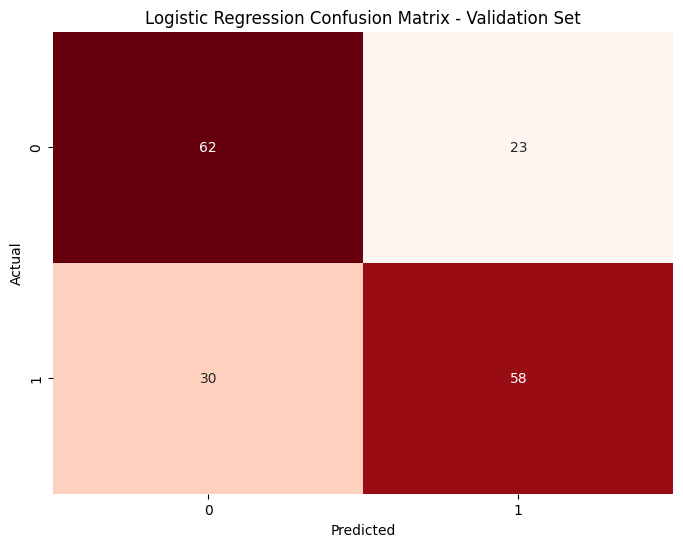

In [101]:
# Logistic Regression confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_val = confusion_matrix(y_val, lr_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Logistic Regression Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

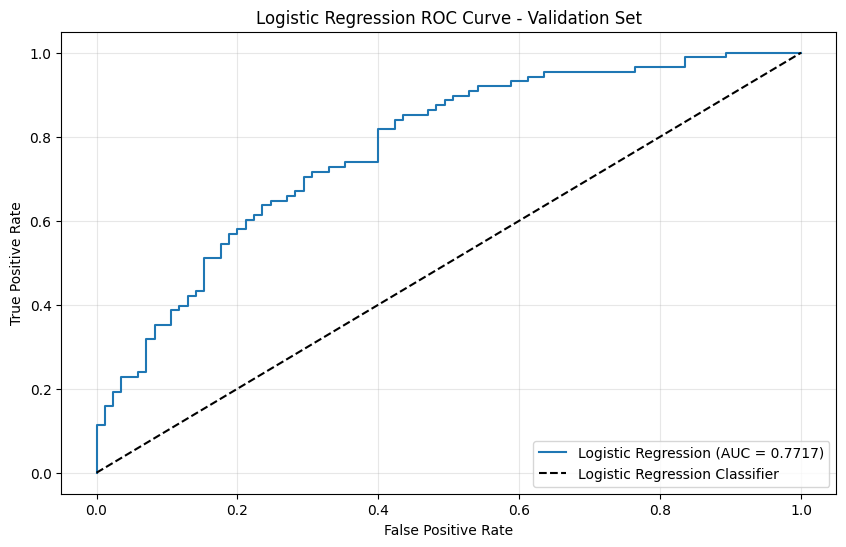

In [102]:
# ROC curve plot for Logistic Regression - Validation set
plt.figure(figsize=(10, 6))
fpr_lr_val, tpr_lr_val, _ = roc_curve(y_val, lr_val_pred_proba)
plt.plot(fpr_lr_val, tpr_lr_val, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, lr_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### 6.5.ii. Random Forest Evaluation confusion matrix

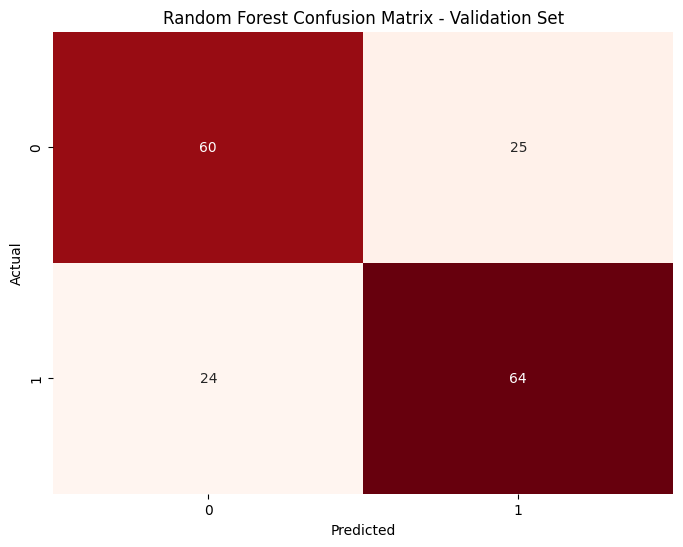

In [103]:
# Random Forest Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_rf_val = confusion_matrix(y_val, rf_val_pred)
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

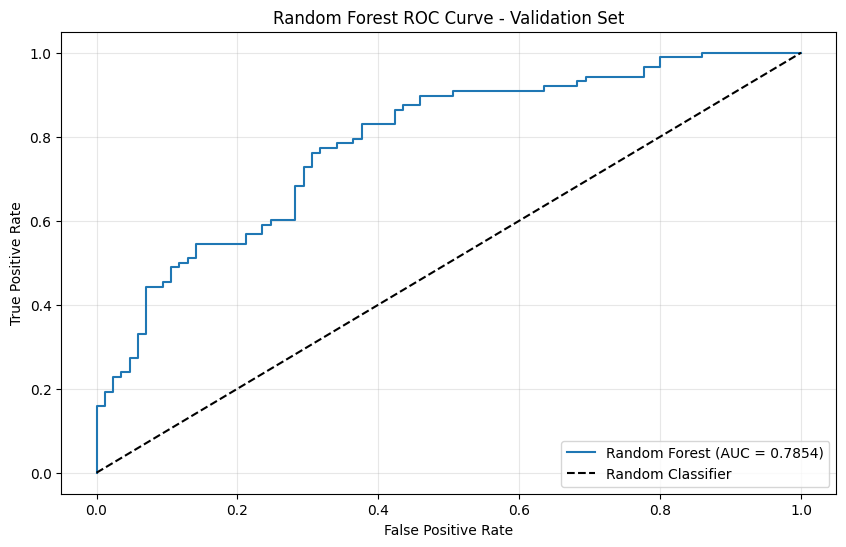

In [104]:
# ROC curve plot for Random Forest - Validation set
plt.figure(figsize=(10, 6))
fpr_rf_val, tpr_rf_val, _ = roc_curve(y_val, rf_val_pred_proba)
plt.plot(fpr_rf_val, tpr_rf_val, label=f'Random Forest (AUC = {roc_auc_score(y_val, rf_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### 6.5.iii. XGboost Evaluation confusion matrix

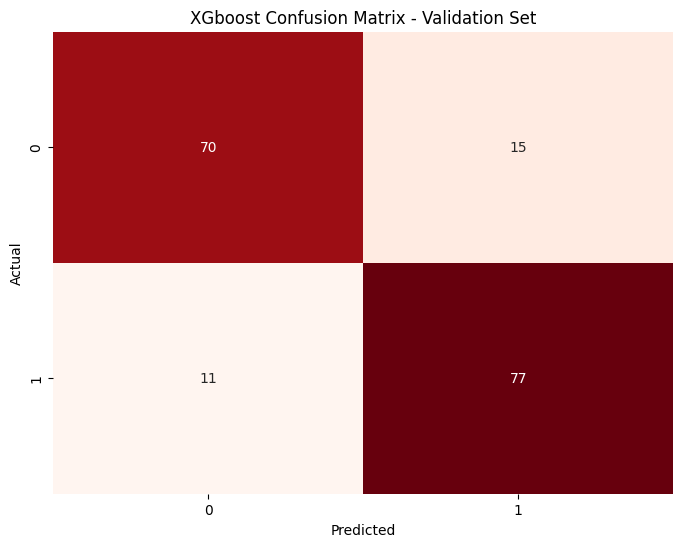

In [105]:
# XGboost Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_xgb_val = confusion_matrix(y_val, xgb_val_pred)
sns.heatmap(cm_xgb_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('XGboost Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

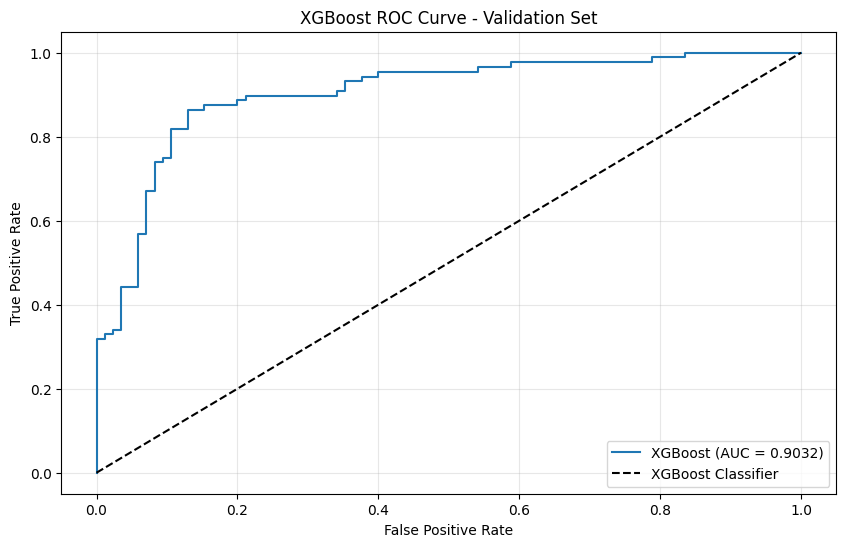

In [106]:
# ROC curve plot for XGBoost - Validation set
plt.figure(figsize=(10, 6))
fpr_xgb_val, tpr_xgb_val, _ = roc_curve(y_val, xgb_val_pred_proba)
plt.plot(fpr_xgb_val, tpr_xgb_val, label=f'XGBoost (AUC = {roc_auc_score(y_val, xgb_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

### 6.6 Feature Importance Analysis

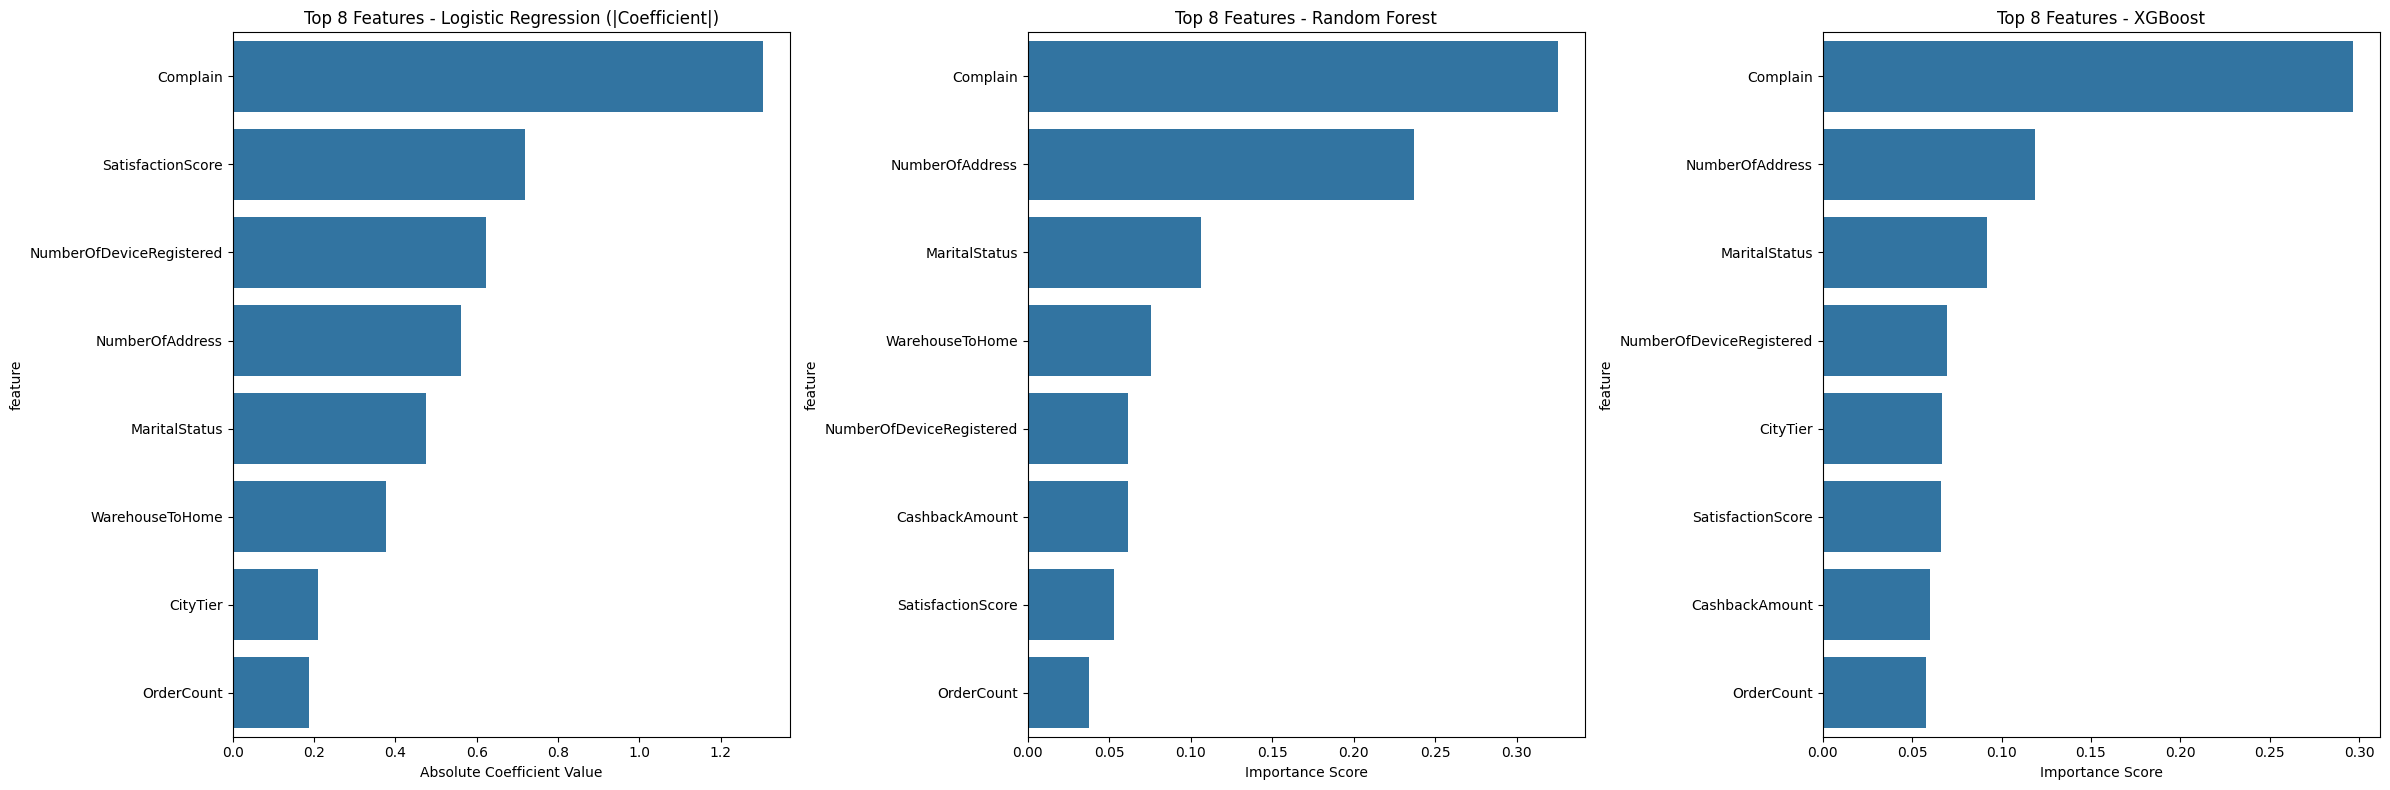

In [107]:
# Get feature importance for all models
feature_importance_rf = pd.DataFrame({
    'feature': features_touse,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance_xgb = pd.DataFrame({
    'feature': features_touse,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# For Logistic Regression, I use absolute coefficients as importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]
feature_importance_lr = pd.DataFrame({
    'feature': features_touse,
    'importance': np.abs(lr_coefficients),
    'coefficient': lr_coefficients
}).sort_values('importance', ascending=False)

# Plot feature importance for all three models
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Logistic Regression
sns.barplot(data=feature_importance_lr.head(8), x='importance', y='feature', ax=axes[0])
axes[0].set_title('Top 8 Features - Logistic Regression (|Coefficient|)')
axes[0].set_xlabel('Absolute Coefficient Value')

# Random Forest
sns.barplot(data=feature_importance_rf.head(8), x='importance', y='feature', ax=axes[1])
axes[1].set_title('Top 8 Features - Random Forest')
axes[1].set_xlabel('Importance Score')

# XGBoost
sns.barplot(data=feature_importance_xgb.head(8), x='importance', y='feature', ax=axes[2])
axes[2].set_title('Top 8 Features - XGBoost')
axes[2].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

In [108]:
# Print top features for all models
print("\nTop Features (Logistic Regression):")
print(feature_importance_lr[['feature', 'importance', 'coefficient']].head(10))

print("\nTop Features (Random Forest):")
print(feature_importance_rf.head(10))

print("\nTop Features (XGBoost):")
print(feature_importance_xgb.head(10))


Top Features (Logistic Regression):
                     feature  importance  coefficient
0                   Complain    1.305158     1.305158
3          SatisfactionScore    0.719827     0.719827
1   NumberOfDeviceRegistered    0.622084     0.622084
2            NumberOfAddress    0.561391     0.561391
4              MaritalStatus    0.476096     0.476096
7            WarehouseToHome    0.375969     0.375969
8                   CityTier    0.209143     0.209143
5                 OrderCount    0.188218     0.188218
11      PreferredLoginDevice    0.177452    -0.177452
6                 CouponUsed    0.056981    -0.056981

Top Features (Random Forest):
                     feature  importance
0                   Complain    0.325692
2            NumberOfAddress    0.237062
4              MaritalStatus    0.106199
7            WarehouseToHome    0.075461
1   NumberOfDeviceRegistered    0.061645
10            CashbackAmount    0.061521
3          SatisfactionScore    0.053092
5         

### 7. Predictive Analysis for Tenure > 1

#### 7.1 Correlation Analysis

In [109]:
# First encode categorical variables for correlation analysis
categorical_cols = list(set(dfsn_t2.columns) - set(numeric_columns))
dfsn_t2_encoded = dfsn_t2.copy()

print(f'Categorical columns: {categorical_cols}')
for col in categorical_cols:
    le = LabelEncoder()
    dfsn_t2_encoded[col] = le.fit_transform(dfsn_t2_encoded[col])

# Calculate correlations with target
correlations = dfsn_t2_encoded.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelations with target (Churn):")
print(correlations)

Categorical columns: ['MaritalStatus', 'PreferredLoginDevice', 'Gender', 'OrderCat', 'PaymentMode']

Correlations with target (Churn):
Churn                             1.000000
Complain                          0.188469
NumberOfAddress                   0.132927
CityTier                          0.069738
WarehouseToHome                   0.067376
SatisfactionScore                 0.060533
CouponUsed                        0.058168
OrderCount                        0.055592
CashbackAmount                    0.049969
NumberOfDeviceRegistered          0.042650
Gender                            0.038409
MaritalStatus                     0.037289
HourSpendOnApp                    0.021297
PaymentMode                       0.017287
OrderCat                          0.006449
Tenure                            0.002886
PreferredLoginDevice             -0.012540
CouponUsed_per_Order             -0.018435
OrderAmountHikeFromlastQuarter   -0.021866
DaySinceLastOrder                -0.061815
Name:

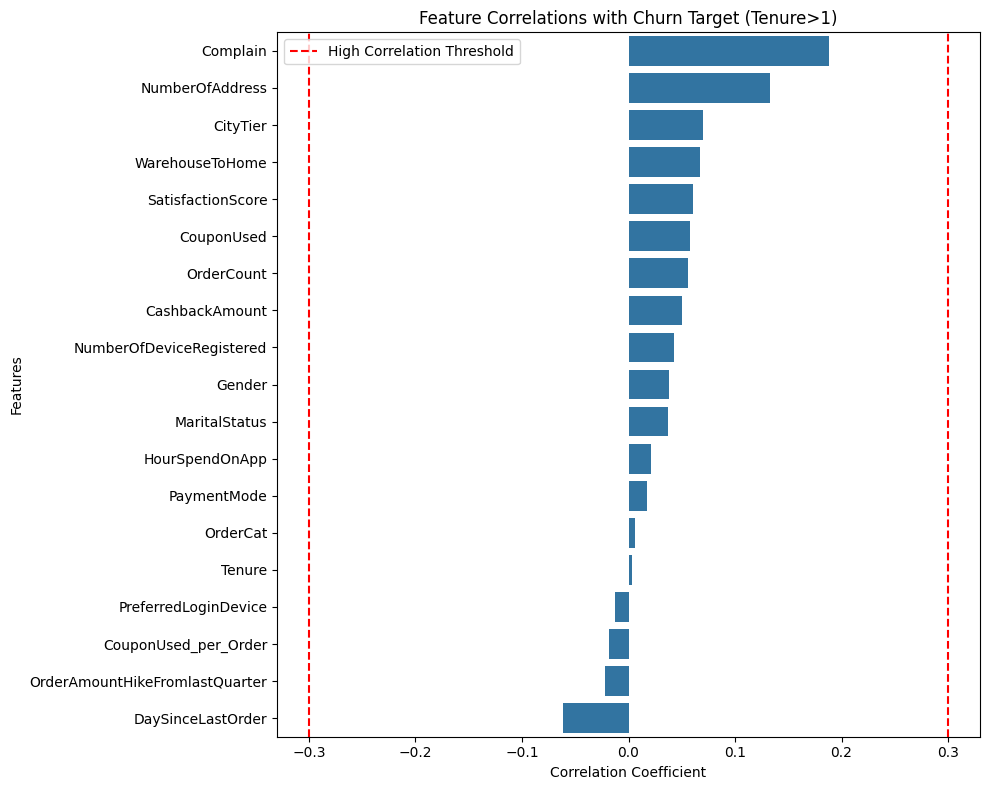

In [110]:
# visualize the correlations
plt.figure(figsize=(10, 8))
correlations_df = pd.DataFrame(correlations[1:])
correlations_df.columns = ['Correlation with Churn']
sns.barplot(data=correlations_df.reset_index(), x='Correlation with Churn', y='index')
plt.title('Feature Correlations with Churn Target (Tenure>1)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0.3, color='r', linestyle='--', label='High Correlation Threshold')
plt.axvline(x=-0.3, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### 7.2 Feature selection for Tenure <= 1

In [111]:
corr_dict = correlations.to_dict()

# filter our low correlation feature, keep features with corr>=0.05 and corr<=0.7
cols_tokeep=[]
for k in corr_dict:
    if (abs(corr_dict[k])>=0.05) and (abs(corr_dict[k])<=0.7):
        cols_tokeep.append(k)

print(cols_tokeep)

['Complain', 'NumberOfAddress', 'CityTier', 'WarehouseToHome', 'SatisfactionScore', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [112]:
features_touse = cols_tokeep

In [113]:
dfsn_t2_encoded_v = dfsn_t2_encoded.dropna()

In [114]:
dfsn_t2_encoded_v.shape

(2349, 20)

In [115]:
X = dfsn_t2_encoded_v[features_touse]
y = dfsn_t2_encoded_v['Churn']

# Create train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")


Dataset shapes:
X_train: (1879, 8)
X_val: (470, 8)


### 7.3 Model Training

#### 7.3.i. Logistic Regression with Cross-validation

In [116]:
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(
        C=0.1, 
        class_weight='balanced',
        max_iter=300,
        random_state=42
    ))
])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_validate(
    lr_pipeline, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {lr_cv_scores['test_accuracy'].mean():.4f} (+/- {lr_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {lr_cv_scores['test_roc_auc'].mean():.4f} (+/- {lr_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {lr_cv_scores['test_average_precision'].mean():.4f} (+/- {lr_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.6839 (+/- 0.0110)
ROC AUC: 0.7193 (+/- 0.0294)
Average Precision: 0.2080 (+/- 0.0268)


#### 7.3.ii. Random Forest with Cross-Validation

In [117]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=50,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

# Perform cross-validation
rf_cv_scores = cross_validate(
    rf_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {rf_cv_scores['test_accuracy'].mean():.4f} (+/- {rf_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {rf_cv_scores['test_roc_auc'].mean():.4f} (+/- {rf_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {rf_cv_scores['test_average_precision'].mean():.4f} (+/- {rf_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.7978 (+/- 0.0146)
ROC AUC: 0.7612 (+/- 0.0317)
Average Precision: 0.2933 (+/- 0.0965)


#### 7.3.iii. XGBoost with Cross-Validation

In [118]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    random_state=42,
    eval_metric='logloss'
)

# Perform cross-validation
xgb_cv_scores = cross_validate(
    xgb_model, 
    X_train, 
    y_train, 
    cv=cv,
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\n5-Fold Cross-Validation Results:")
print(f"Accuracy: {xgb_cv_scores['test_accuracy'].mean():.4f} (+/- {xgb_cv_scores['test_accuracy'].std():.4f})")
print(f"ROC AUC: {xgb_cv_scores['test_roc_auc'].mean():.4f} (+/- {xgb_cv_scores['test_roc_auc'].std():.4f})")
print(f"Average Precision: {xgb_cv_scores['test_average_precision'].mean():.4f} (+/- {xgb_cv_scores['test_average_precision'].std():.4f})")


5-Fold Cross-Validation Results:
Accuracy: 0.9005 (+/- 0.0232)
ROC AUC: 0.8756 (+/- 0.0320)
Average Precision: 0.4916 (+/- 0.1038)


### 7.4 Model Evaluation

#### 7.4.i. Logistic Regression Evaluation

In [119]:
# Train and evaluate
lr_pipeline.fit(X_train, y_train)
lr_val_pred = lr_pipeline.predict(X_val)
lr_val_pred_proba = lr_pipeline.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, lr_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, lr_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, lr_val_pred))


Validation Performance:
Accuracy Score: 0.6617
ROC AUC Score: 0.7126

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.66      0.79       441
           1       0.11      0.62      0.18        29

    accuracy                           0.66       470
   macro avg       0.54      0.64      0.49       470
weighted avg       0.91      0.66      0.75       470



#### 7.4.ii. Random forest Evaluation

In [120]:
# Train and evaluate
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_val)
rf_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, rf_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, rf_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, rf_val_pred))


Validation Performance:
Accuracy Score: 0.7979
ROC AUC Score: 0.7584

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       441
           1       0.18      0.62      0.27        29

    accuracy                           0.80       470
   macro avg       0.57      0.72      0.58       470
weighted avg       0.92      0.80      0.85       470



#### 7.4.iii. XGBoost Evaluation

In [121]:
# Train and evaluate
xgb_model.fit(X_train, y_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

print("\nValidation Performance:")
print(f"Accuracy Score: {accuracy_score(y_val, xgb_val_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, xgb_val_pred_proba):.4f}")
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, xgb_val_pred))


Validation Performance:
Accuracy Score: 0.9064
ROC AUC Score: 0.9166

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       441
           1       0.38      0.79      0.51        29

    accuracy                           0.91       470
   macro avg       0.68      0.85      0.73       470
weighted avg       0.95      0.91      0.92       470



### 7.5 Confusion Matrix and AUC Curve

#### 7.5.i. Logistic Regression confusion matrix

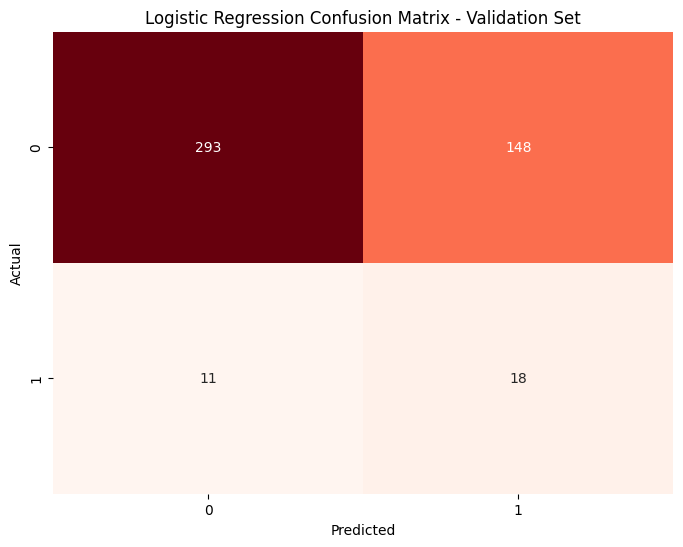

In [122]:
# Logistic Regression confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_val = confusion_matrix(y_val, lr_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Logistic Regression Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

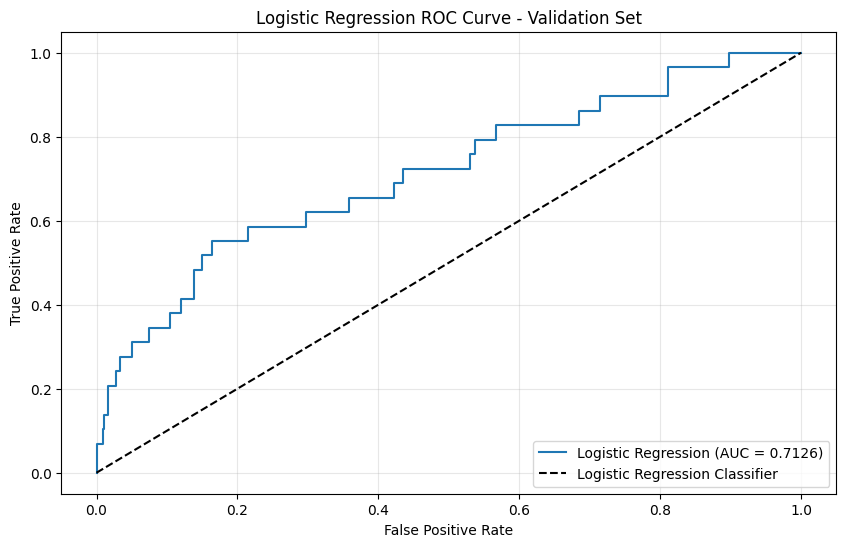

In [123]:
# ROC curve plot for Logistic Regression - Validation set
plt.figure(figsize=(10, 6))
fpr_lr_val, tpr_lr_val, _ = roc_curve(y_val, lr_val_pred_proba)
plt.plot(fpr_lr_val, tpr_lr_val, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, lr_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### 7.5.ii. Random Forest Evaluation confusion matrix

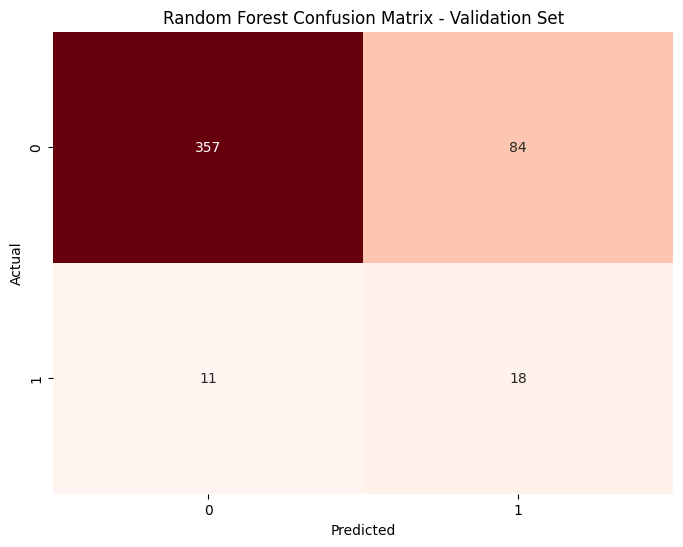

In [124]:
# Random Forest Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_rf_val = confusion_matrix(y_val, rf_val_pred)
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

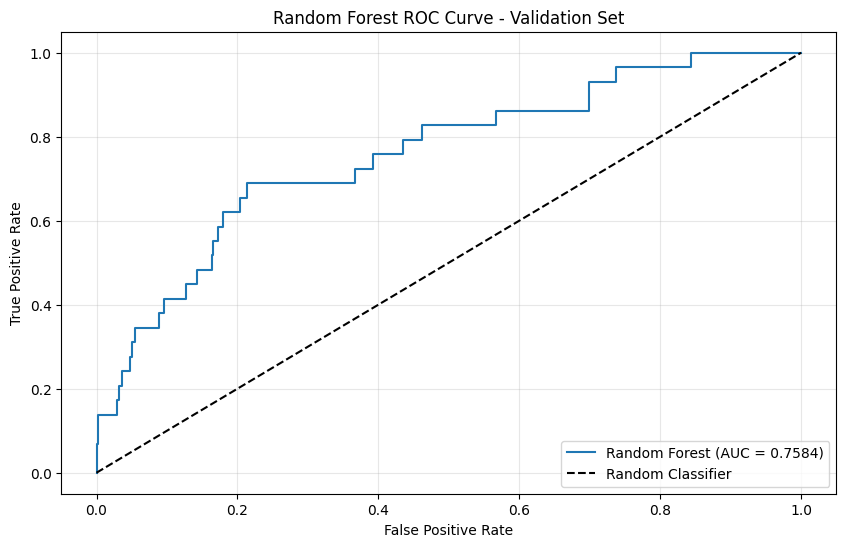

In [125]:
# ROC curve plot for Random Forest - Validation set
plt.figure(figsize=(10, 6))
fpr_rf_val, tpr_rf_val, _ = roc_curve(y_val, rf_val_pred_proba)
plt.plot(fpr_rf_val, tpr_rf_val, label=f'Random Forest (AUC = {roc_auc_score(y_val, rf_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

#### 7.5.iii. XGboost Evaluation confusion matrix

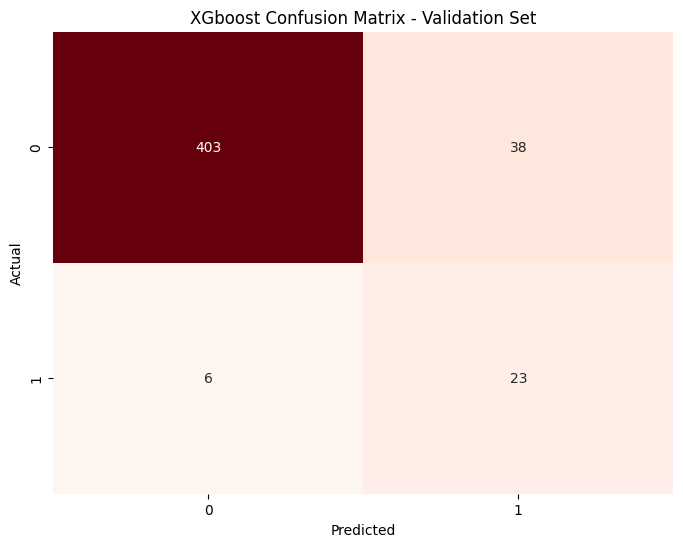

In [126]:
# XGboost Evaluation confusion matrix - Validation set
plt.figure(figsize=(8, 6))
cm_xgb_val = confusion_matrix(y_val, xgb_val_pred)
sns.heatmap(cm_xgb_val, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('XGboost Confusion Matrix - Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

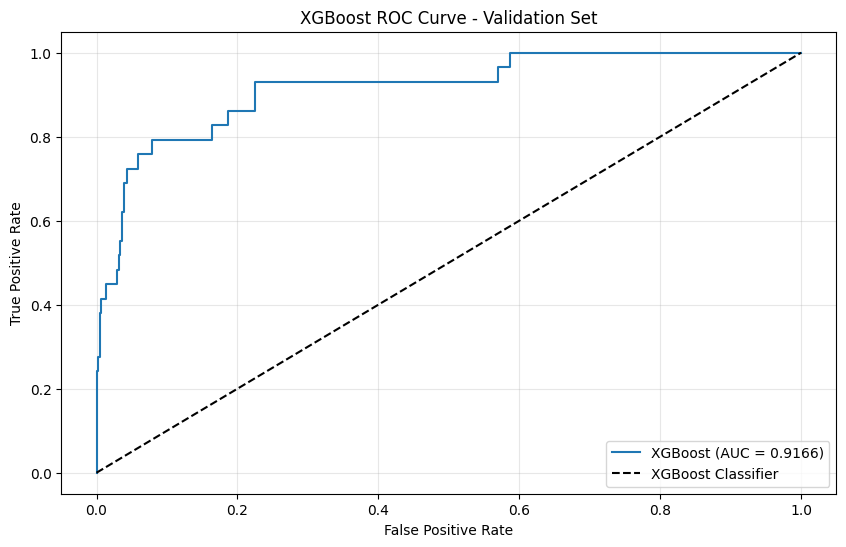

In [127]:
# ROC curve plot for XGBoost - Validation set
plt.figure(figsize=(10, 6))
fpr_xgb_val, tpr_xgb_val, _ = roc_curve(y_val, xgb_val_pred_proba)
plt.plot(fpr_xgb_val, tpr_xgb_val, label=f'XGBoost (AUC = {roc_auc_score(y_val, xgb_val_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

### 7.6 Feature Importance Analysis

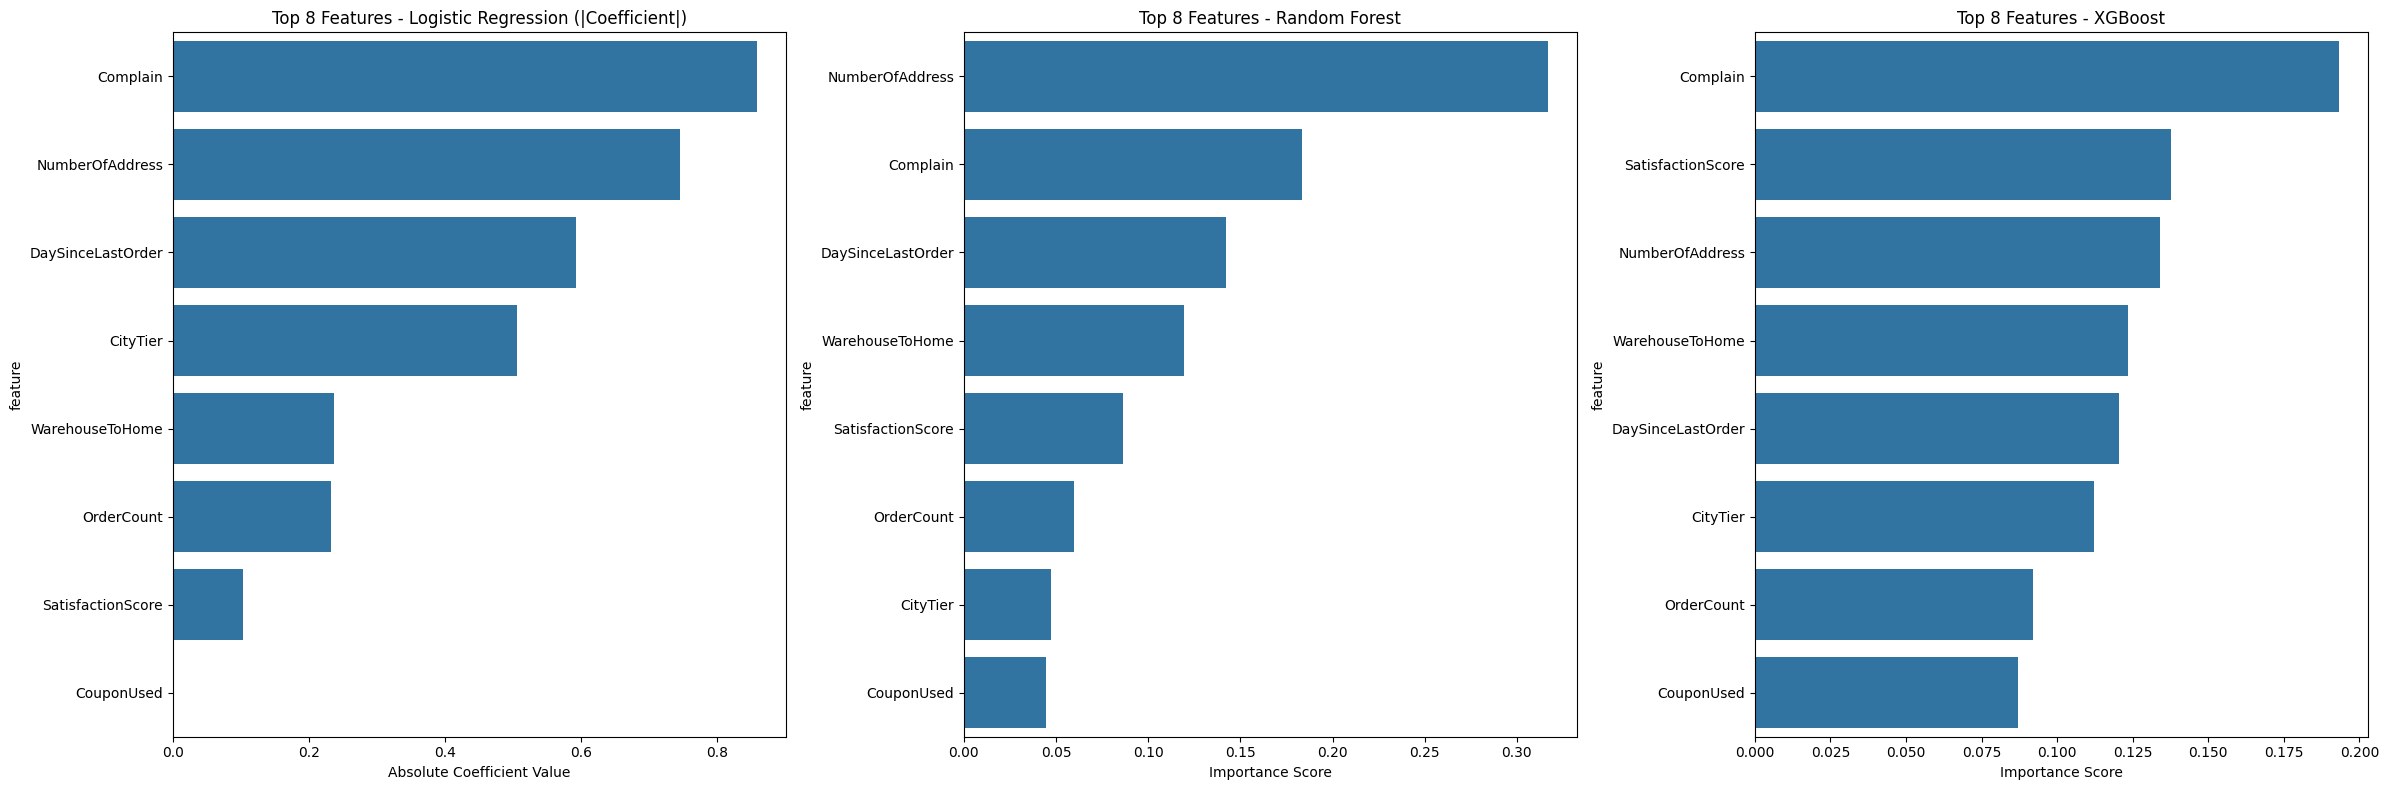

In [128]:
# Get feature importance for all models
feature_importance_rf = pd.DataFrame({
    'feature': features_touse,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance_xgb = pd.DataFrame({
    'feature': features_touse,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# For Logistic Regression, I use absolute coefficients as importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]
feature_importance_lr = pd.DataFrame({
    'feature': features_touse,
    'importance': np.abs(lr_coefficients),
    'coefficient': lr_coefficients
}).sort_values('importance', ascending=False)

# Plot feature importance for all three models
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Logistic Regression
sns.barplot(data=feature_importance_lr.head(8), x='importance', y='feature', ax=axes[0])
axes[0].set_title('Top 8 Features - Logistic Regression (|Coefficient|)')
axes[0].set_xlabel('Absolute Coefficient Value')

# Random Forest
sns.barplot(data=feature_importance_rf.head(8), x='importance', y='feature', ax=axes[1])
axes[1].set_title('Top 8 Features - Random Forest')
axes[1].set_xlabel('Importance Score')

# XGBoost
sns.barplot(data=feature_importance_xgb.head(8), x='importance', y='feature', ax=axes[2])
axes[2].set_title('Top 8 Features - XGBoost')
axes[2].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

In [129]:
# Print top features for all models
print("\nTop Features (Logistic Regression):")
print(feature_importance_lr[['feature', 'importance', 'coefficient']].head(10))

print("\nTop Features (Random Forest):")
print(feature_importance_rf.head(10))

print("\nTop Features (XGBoost):")
print(feature_importance_xgb.head(10))


Top Features (Logistic Regression):
             feature  importance  coefficient
0           Complain    0.857733     0.857733
1    NumberOfAddress    0.744244     0.744244
7  DaySinceLastOrder    0.592777    -0.592777
2           CityTier    0.505399     0.505399
3    WarehouseToHome    0.237180     0.237180
6         OrderCount    0.232599     0.232599
4  SatisfactionScore    0.103177     0.103177
5         CouponUsed    0.001909    -0.001909

Top Features (Random Forest):
             feature  importance
1    NumberOfAddress    0.316786
0           Complain    0.183592
7  DaySinceLastOrder    0.142175
3    WarehouseToHome    0.119599
4  SatisfactionScore    0.086478
6         OrderCount    0.059601
2           CityTier    0.047117
5         CouponUsed    0.044653

Top Features (XGBoost):
             feature  importance
0           Complain    0.193176
4  SatisfactionScore    0.137825
1    NumberOfAddress    0.134005
3    WarehouseToHome    0.123451
7  DaySinceLastOrder    0.12039